In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sklearn
import scipy as sc

In [2]:
df=pd.read_csv("bank-full.csv",delimiter=';')

In [3]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.describe().round(2)

age    balance       day  duration  campaign     pdays  previous
count  45211.00   45211.00  45211.00  45211.00  45211.00  45211.00  45211.00
mean      40.94    1362.27     15.81    258.16      2.76     40.20      0.58
std       10.62    3044.77      8.32    257.53      3.10    100.13      2.30
min       18.00   -8019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00    1428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00  102127.00     31.00   4918.00     63.00    871.00    275.00

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
for i in df.columns:
    print(i)
    print(df[i].isna().value_counts())

age
False    45211
Name: age, dtype: int64
job
False    45211
Name: job, dtype: int64
marital
False    45211
Name: marital, dtype: int64
education
False    45211
Name: education, dtype: int64
default
False    45211
Name: default, dtype: int64
balance
False    45211
Name: balance, dtype: int64
housing
False    45211
Name: housing, dtype: int64
loan
False    45211
Name: loan, dtype: int64
contact
False    45211
Name: contact, dtype: int64
day
False    45211
Name: day, dtype: int64
month
False    45211
Name: month, dtype: int64
duration
False    45211
Name: duration, dtype: int64
campaign
False    45211
Name: campaign, dtype: int64
pdays
False    45211
Name: pdays, dtype: int64
previous
False    45211
Name: previous, dtype: int64
poutcome
False    45211
Name: poutcome, dtype: int64
y
False    45211
Name: y, dtype: int64


In [9]:
plt.rcParams['figure.figsize'] = (20, 16)

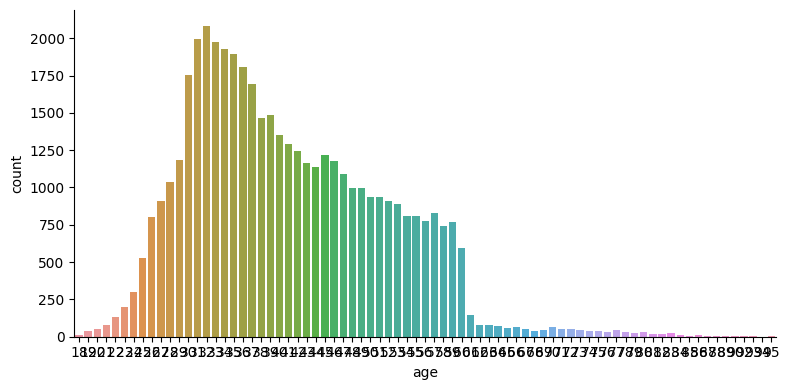

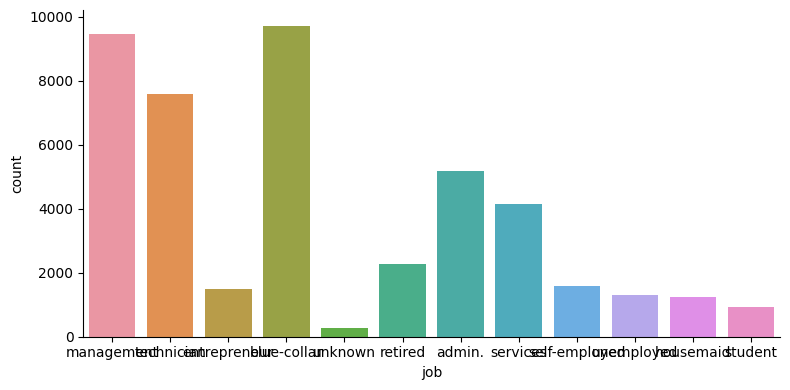

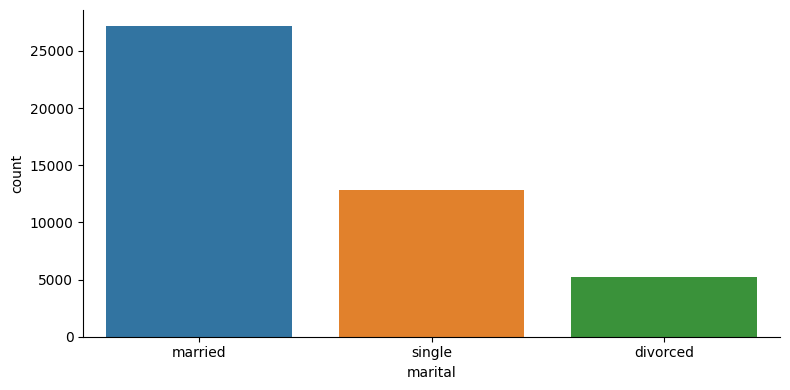

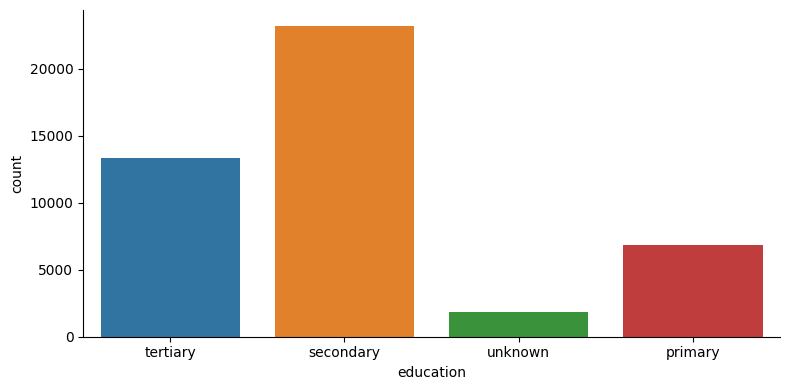

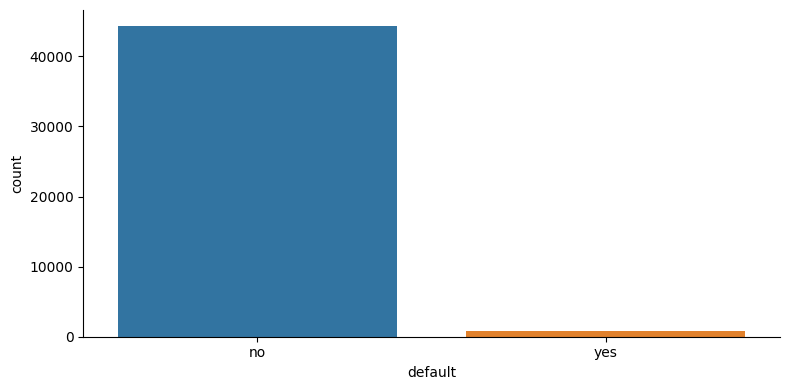

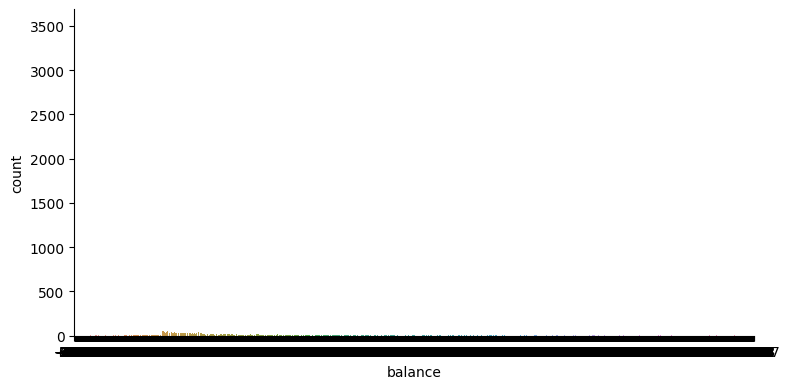

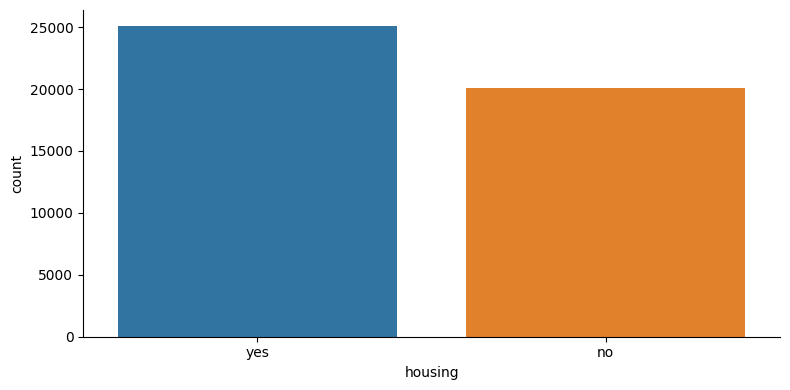

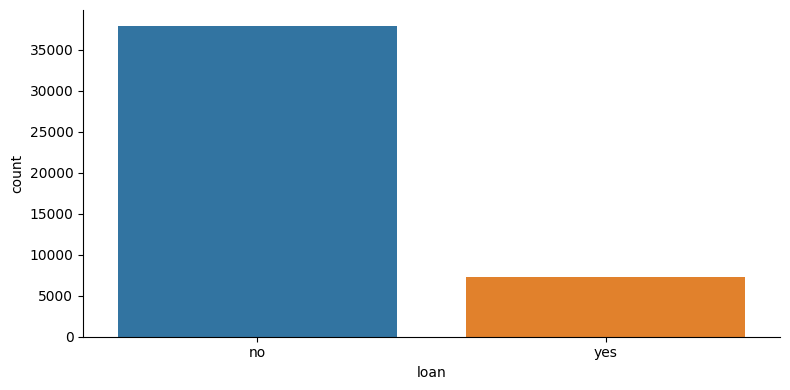

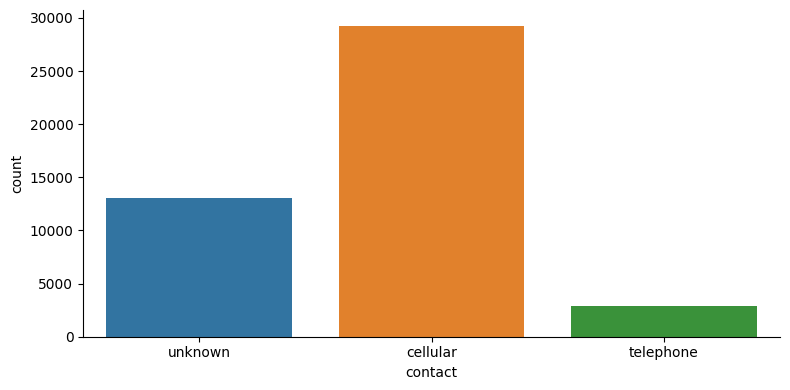

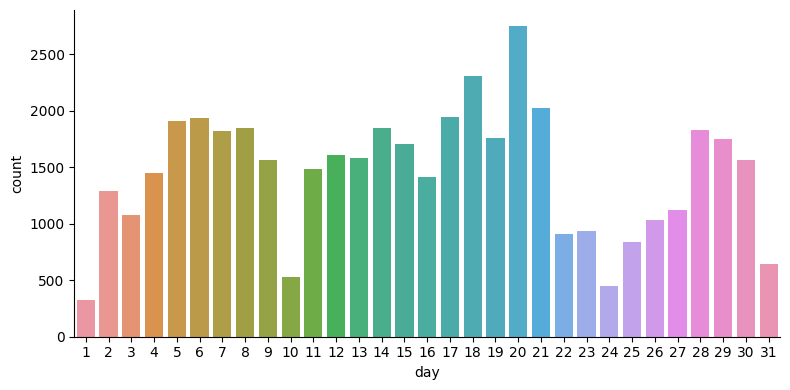

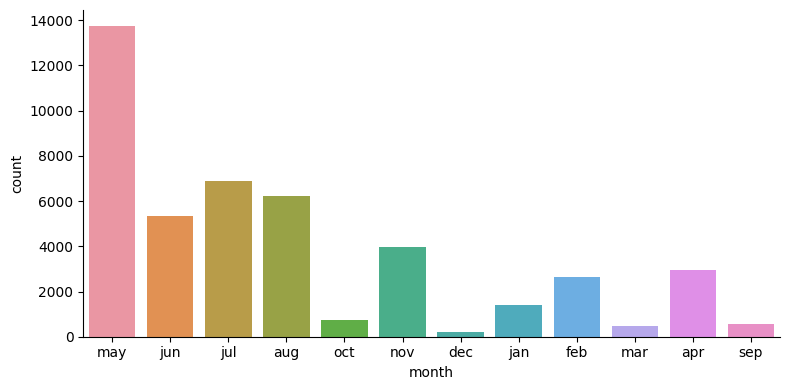

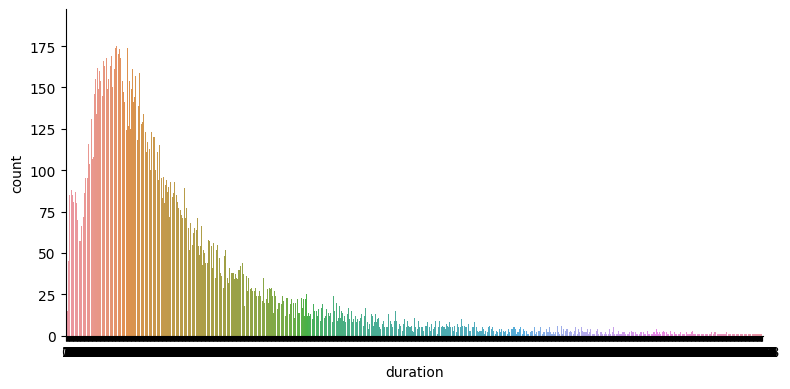

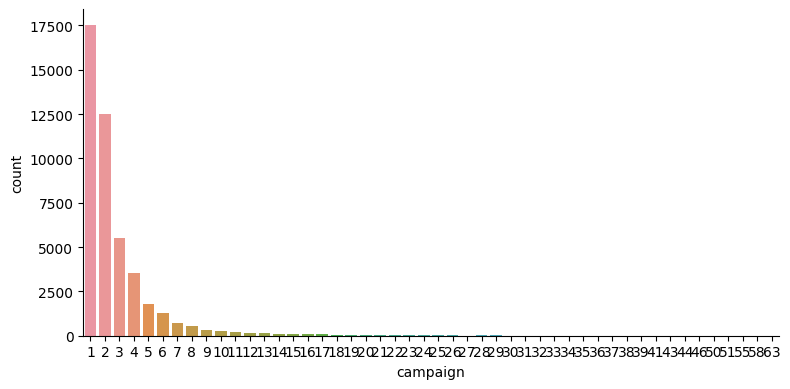

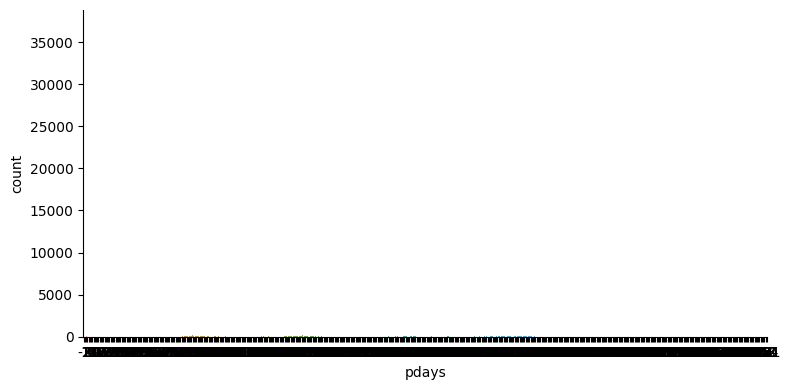

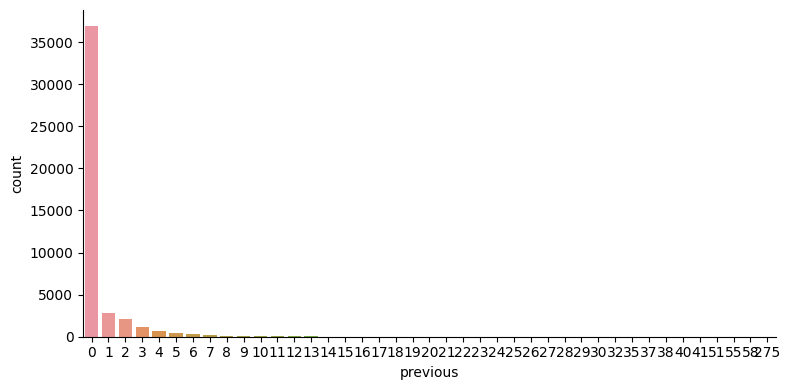

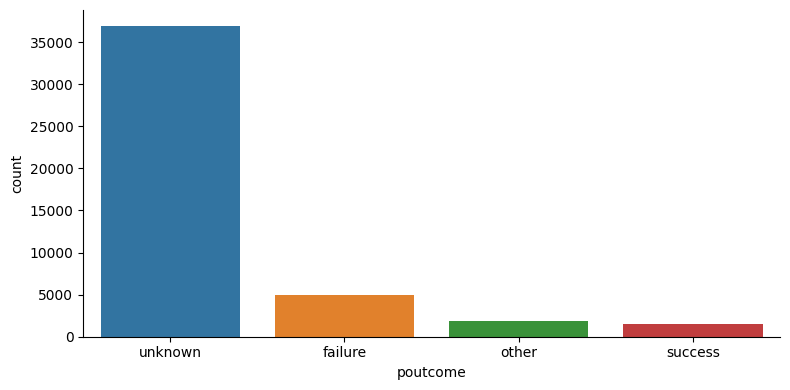

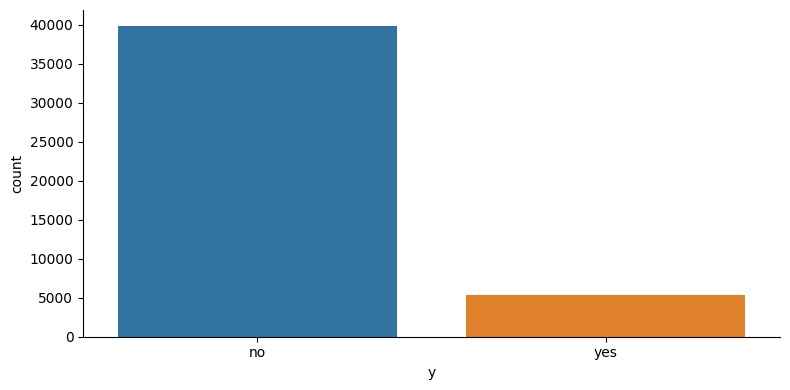

In [10]:
for i in df.columns:
    ax = sns.catplot(data=df, kind='count', x=i, height=4, aspect=2)
    plt.pyplot.show()

In [11]:
#for i in df.columns:
    #a = sns.swarmplot(data=df, x='y', y=i)
    #plt.pyplot.show()

In [3]:
df["y_encode"]=np.where(df['y'] == 'yes', 1, 0)

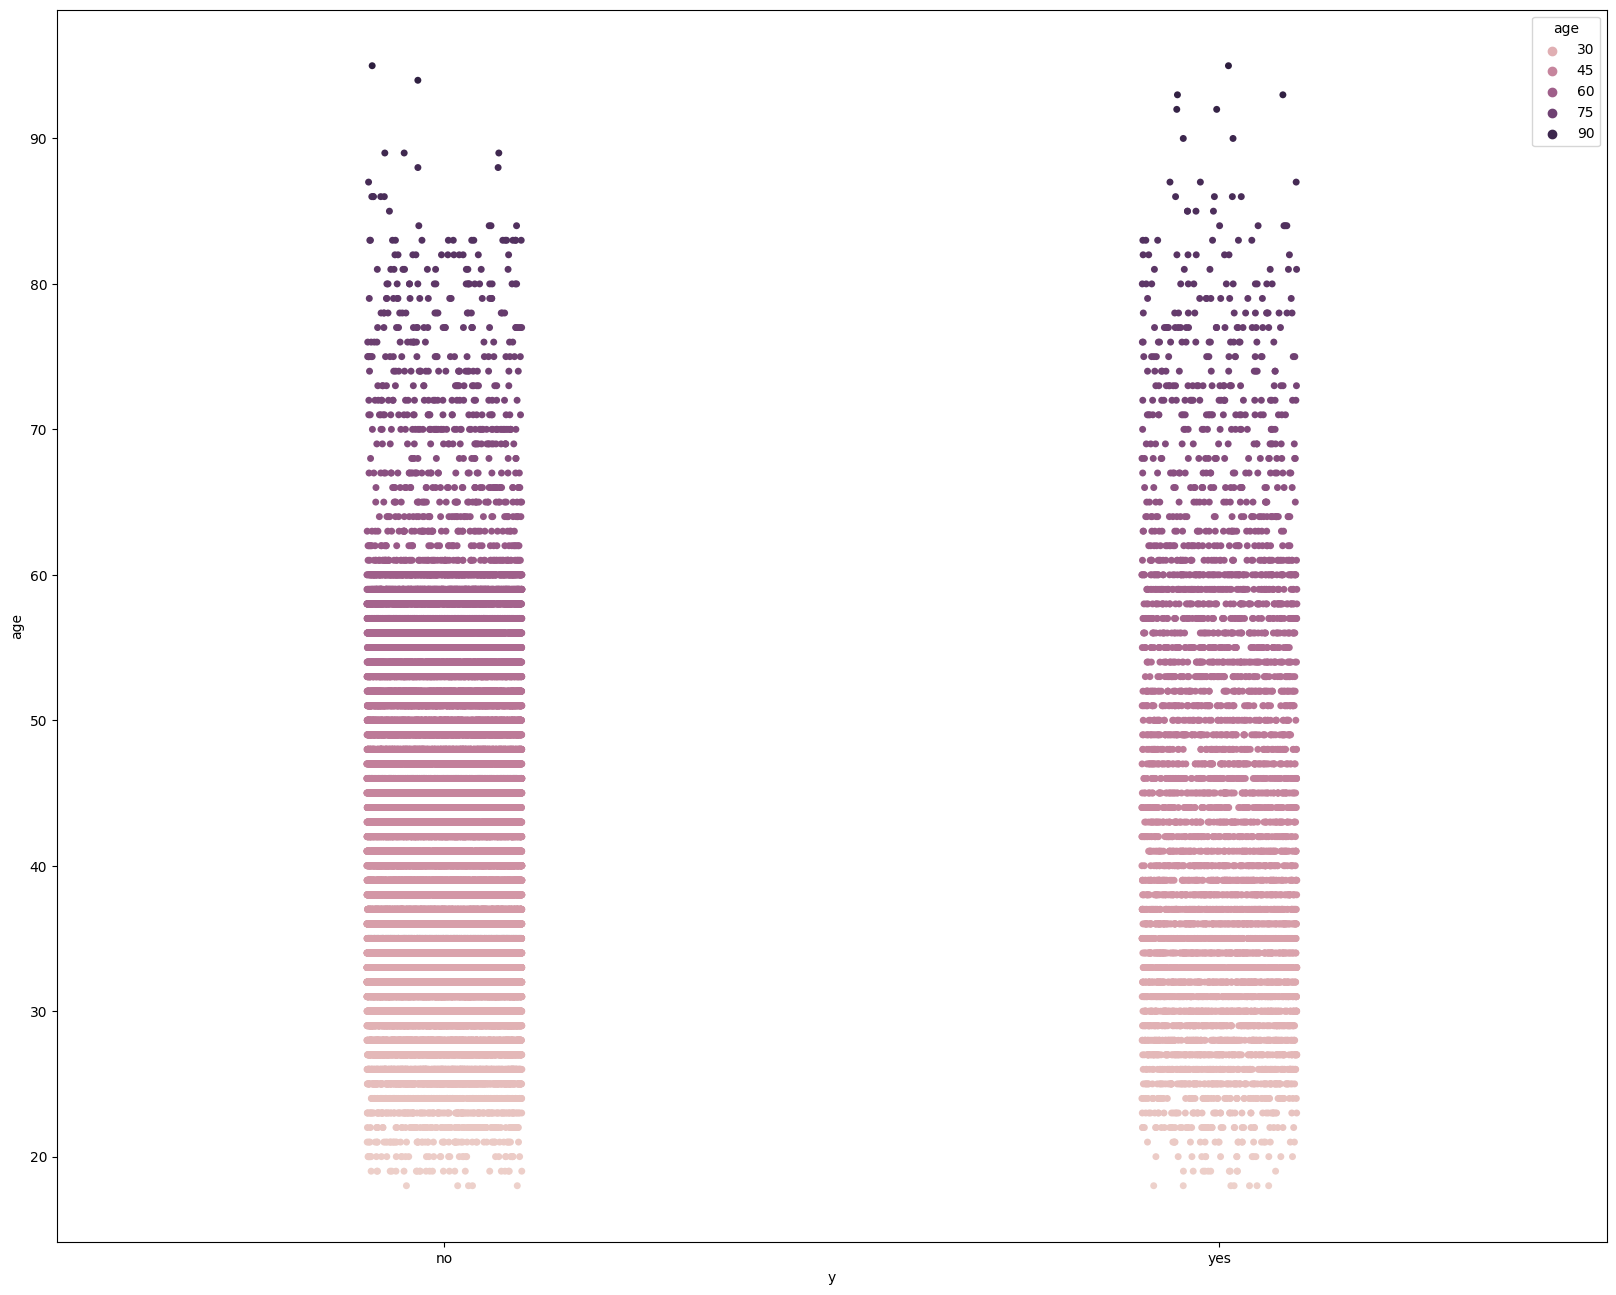

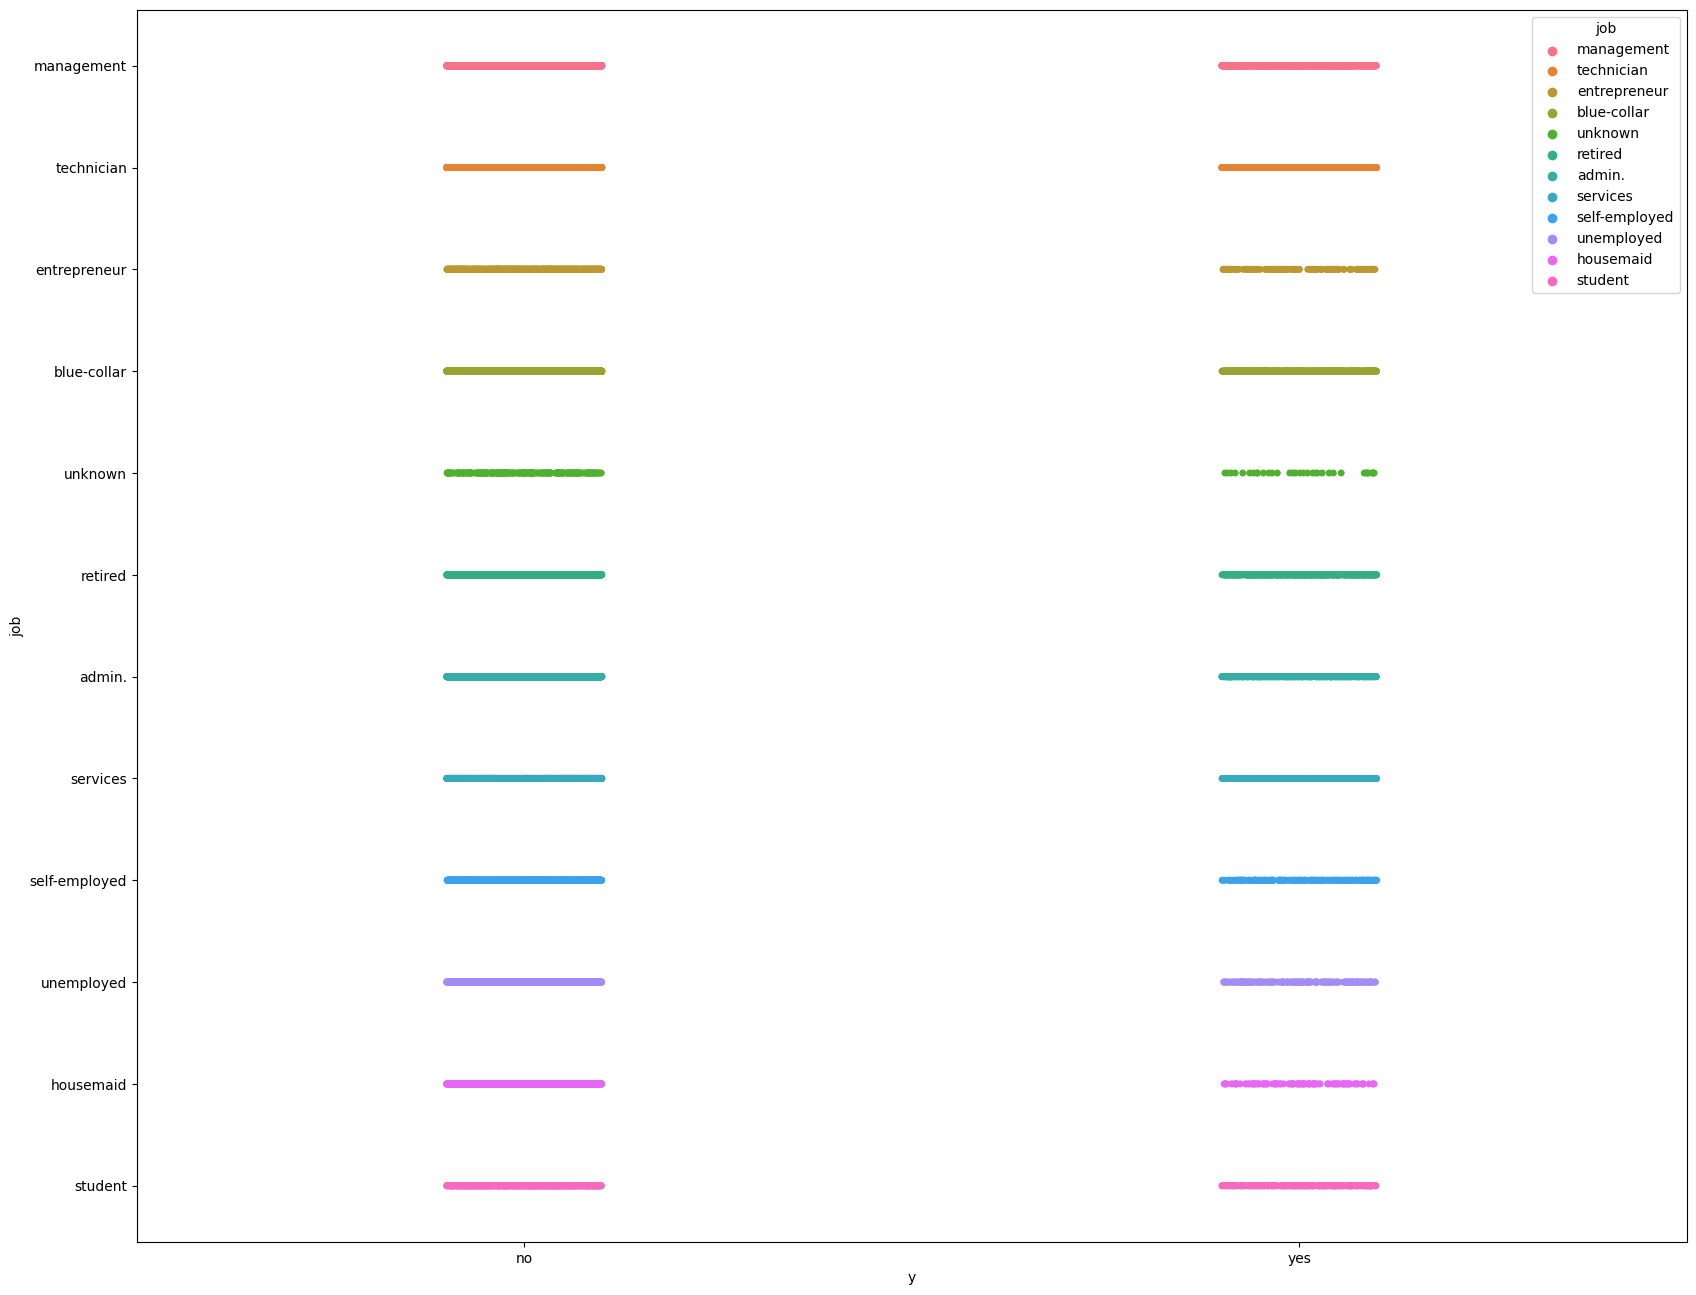

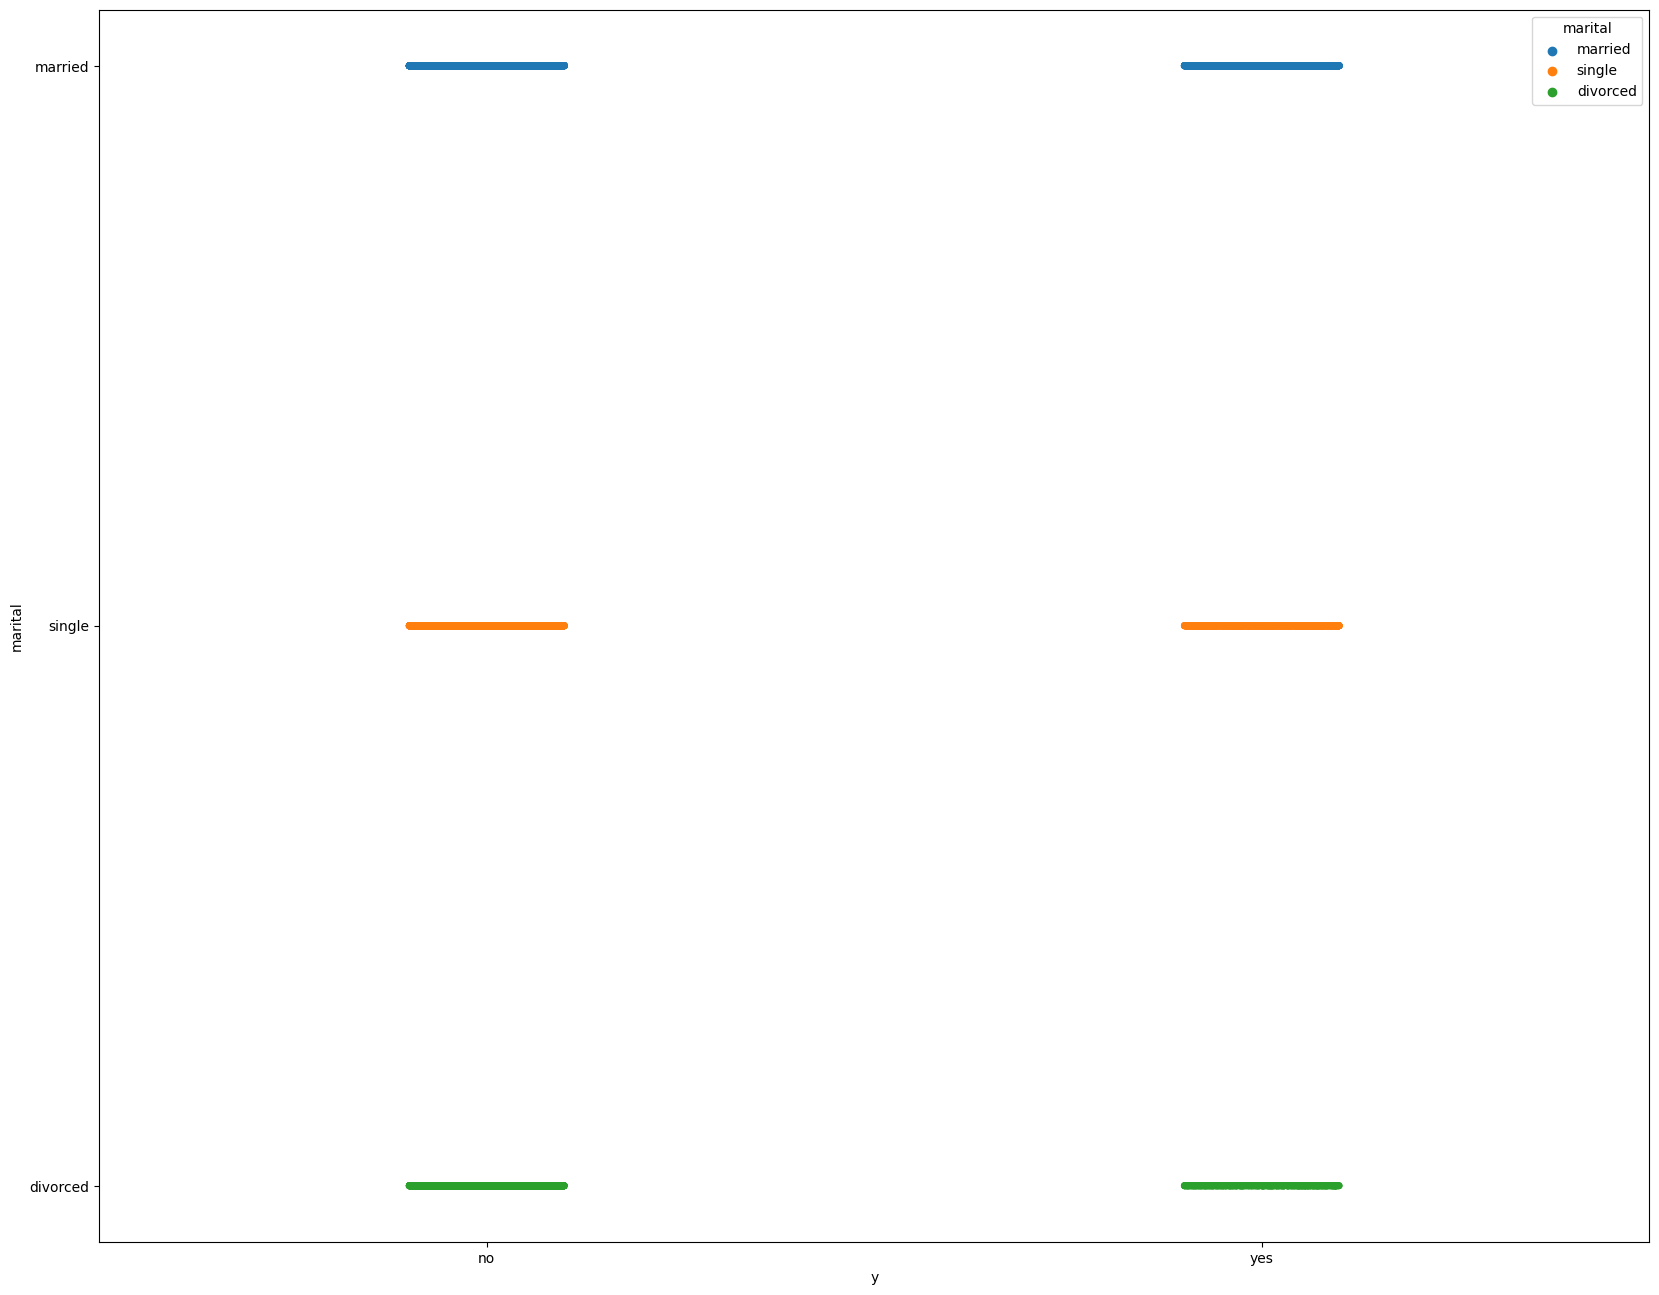

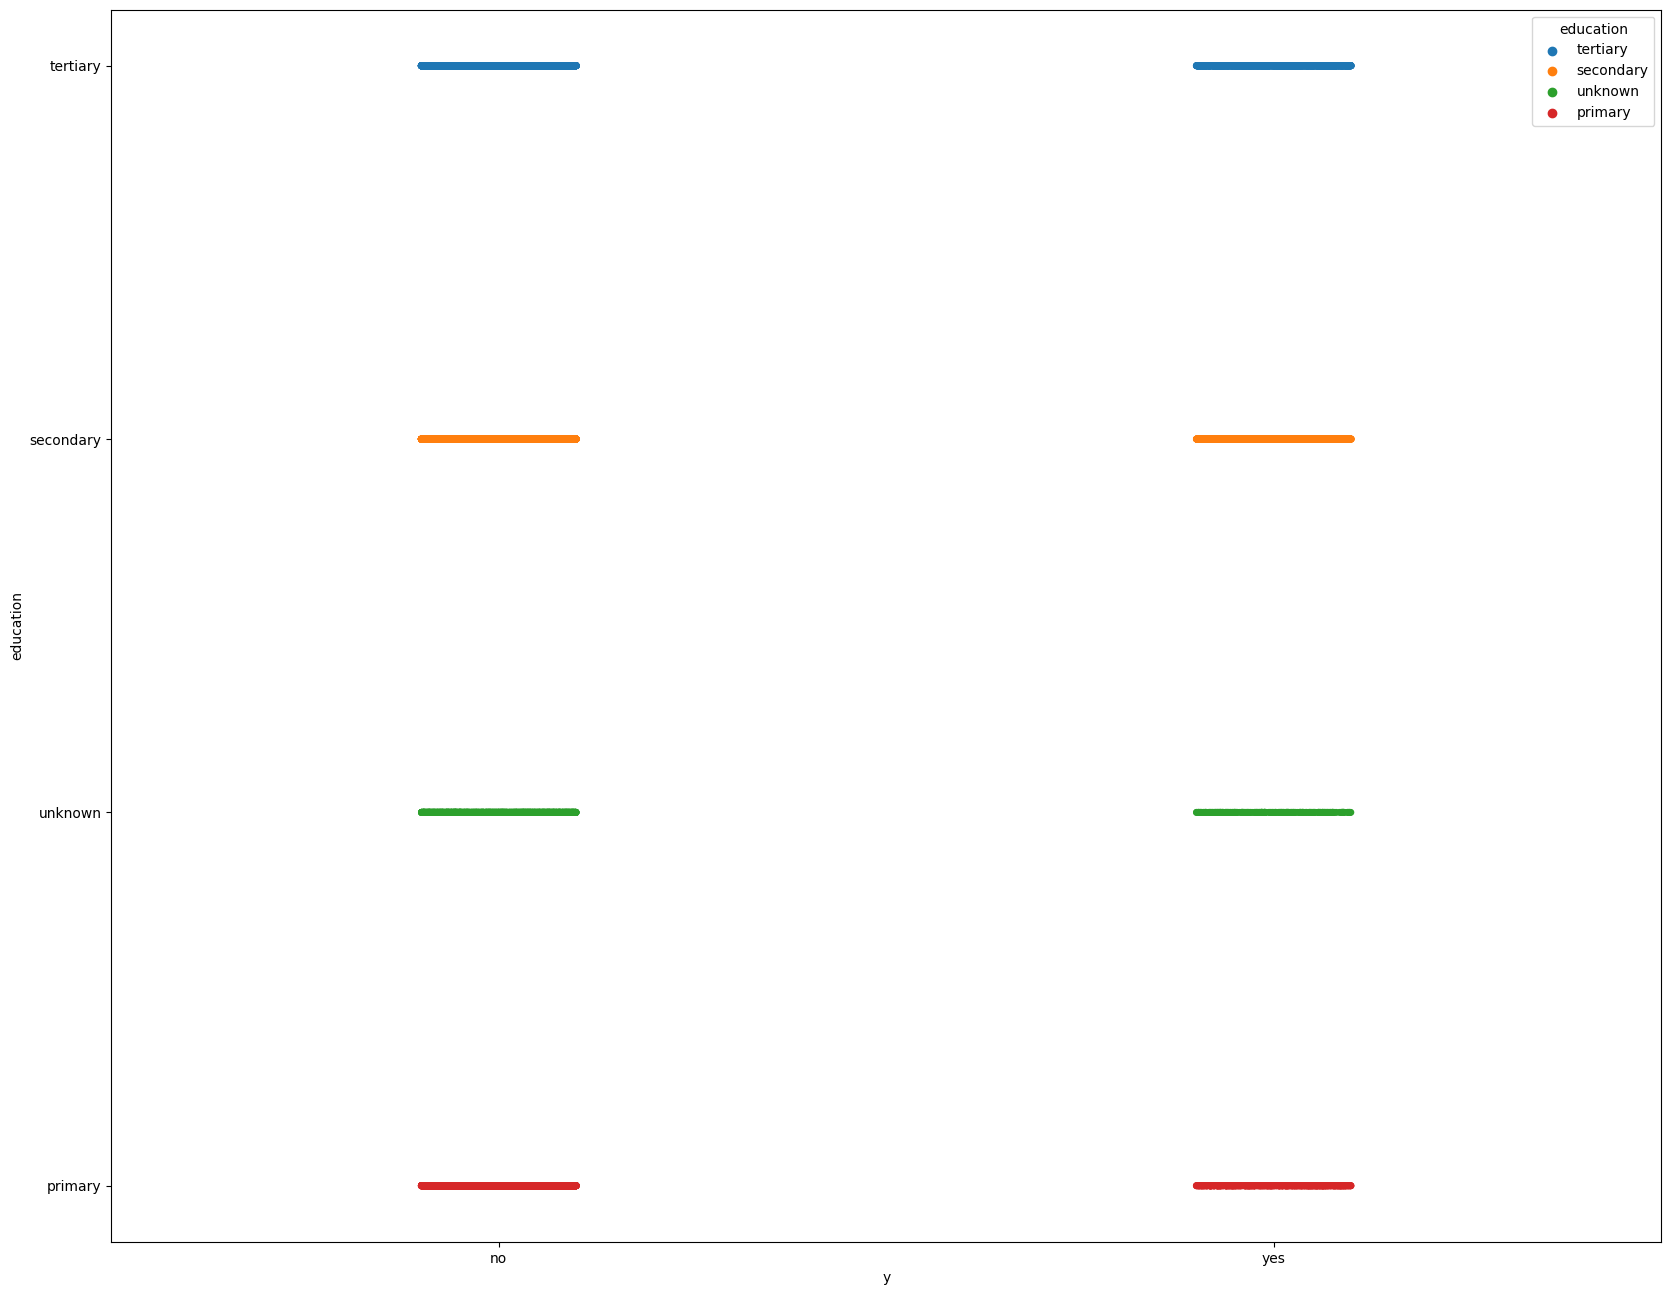

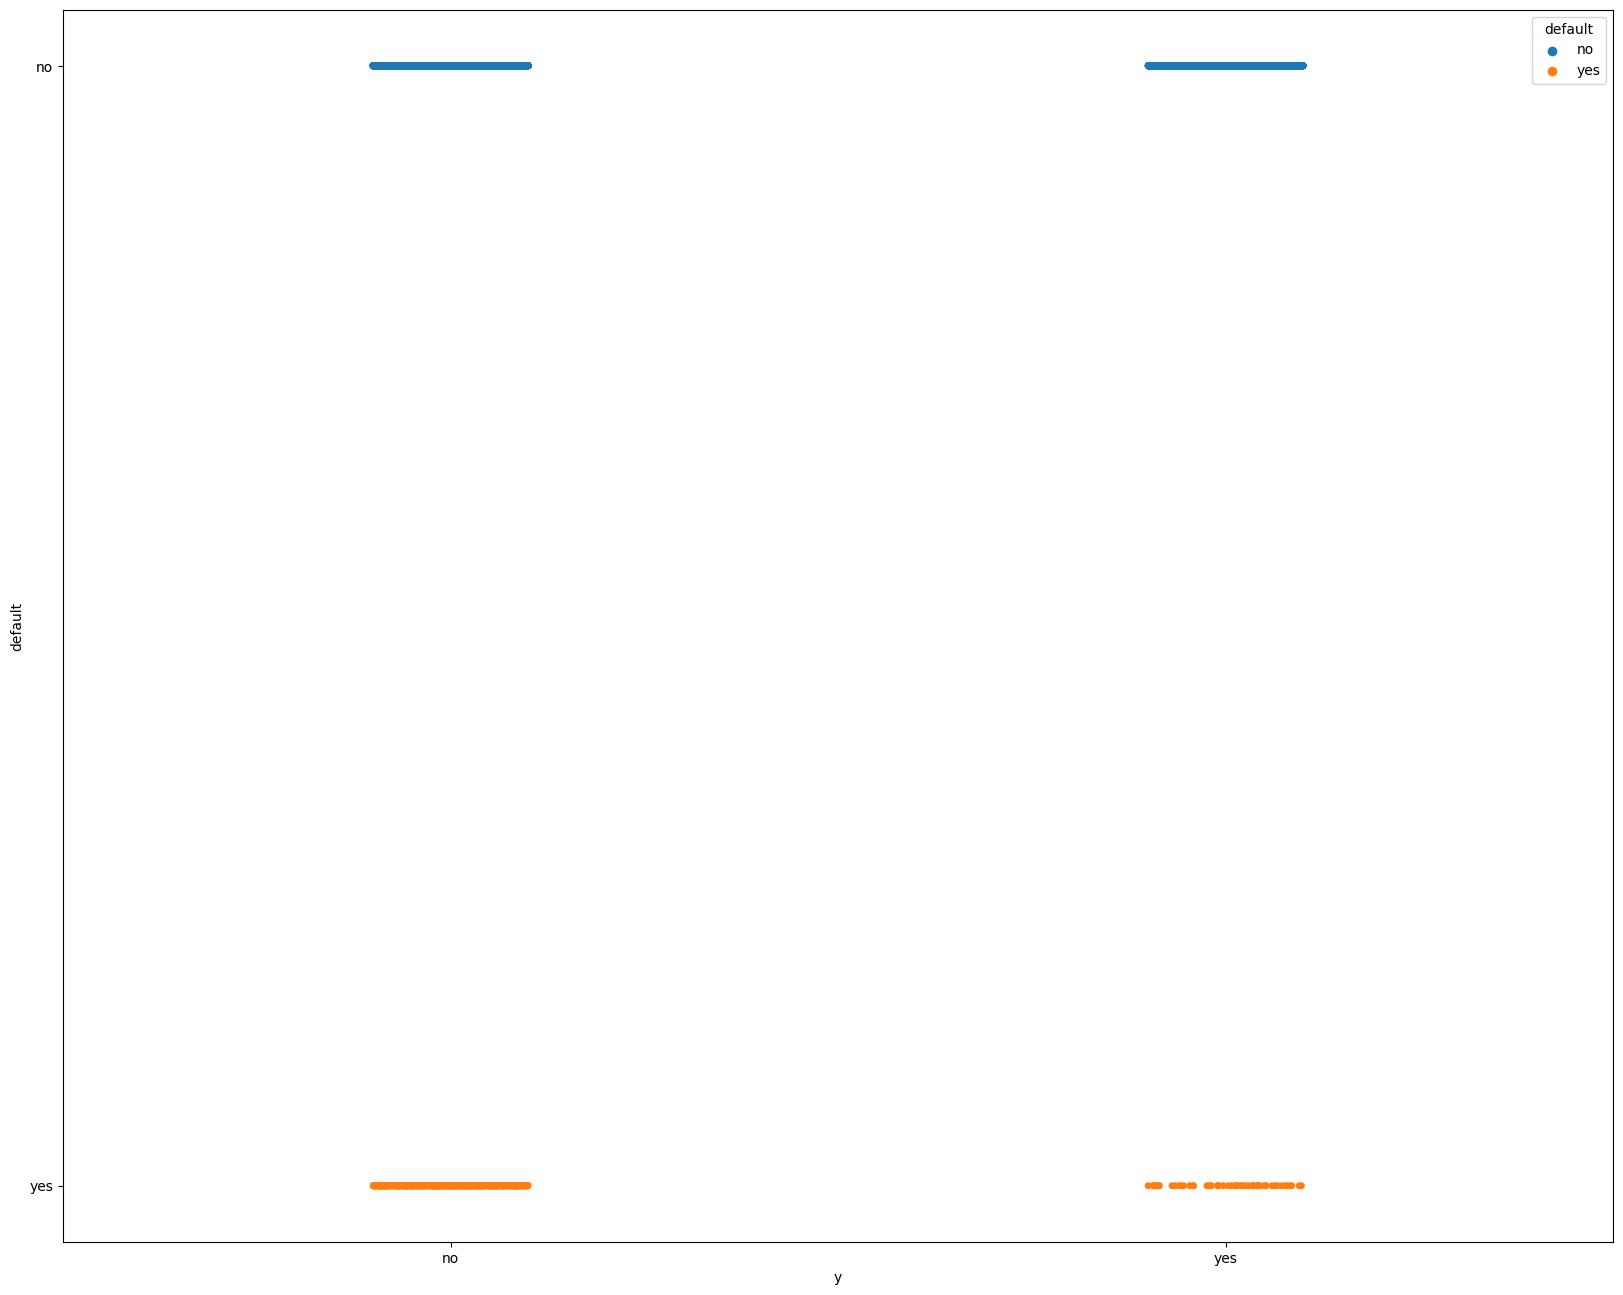

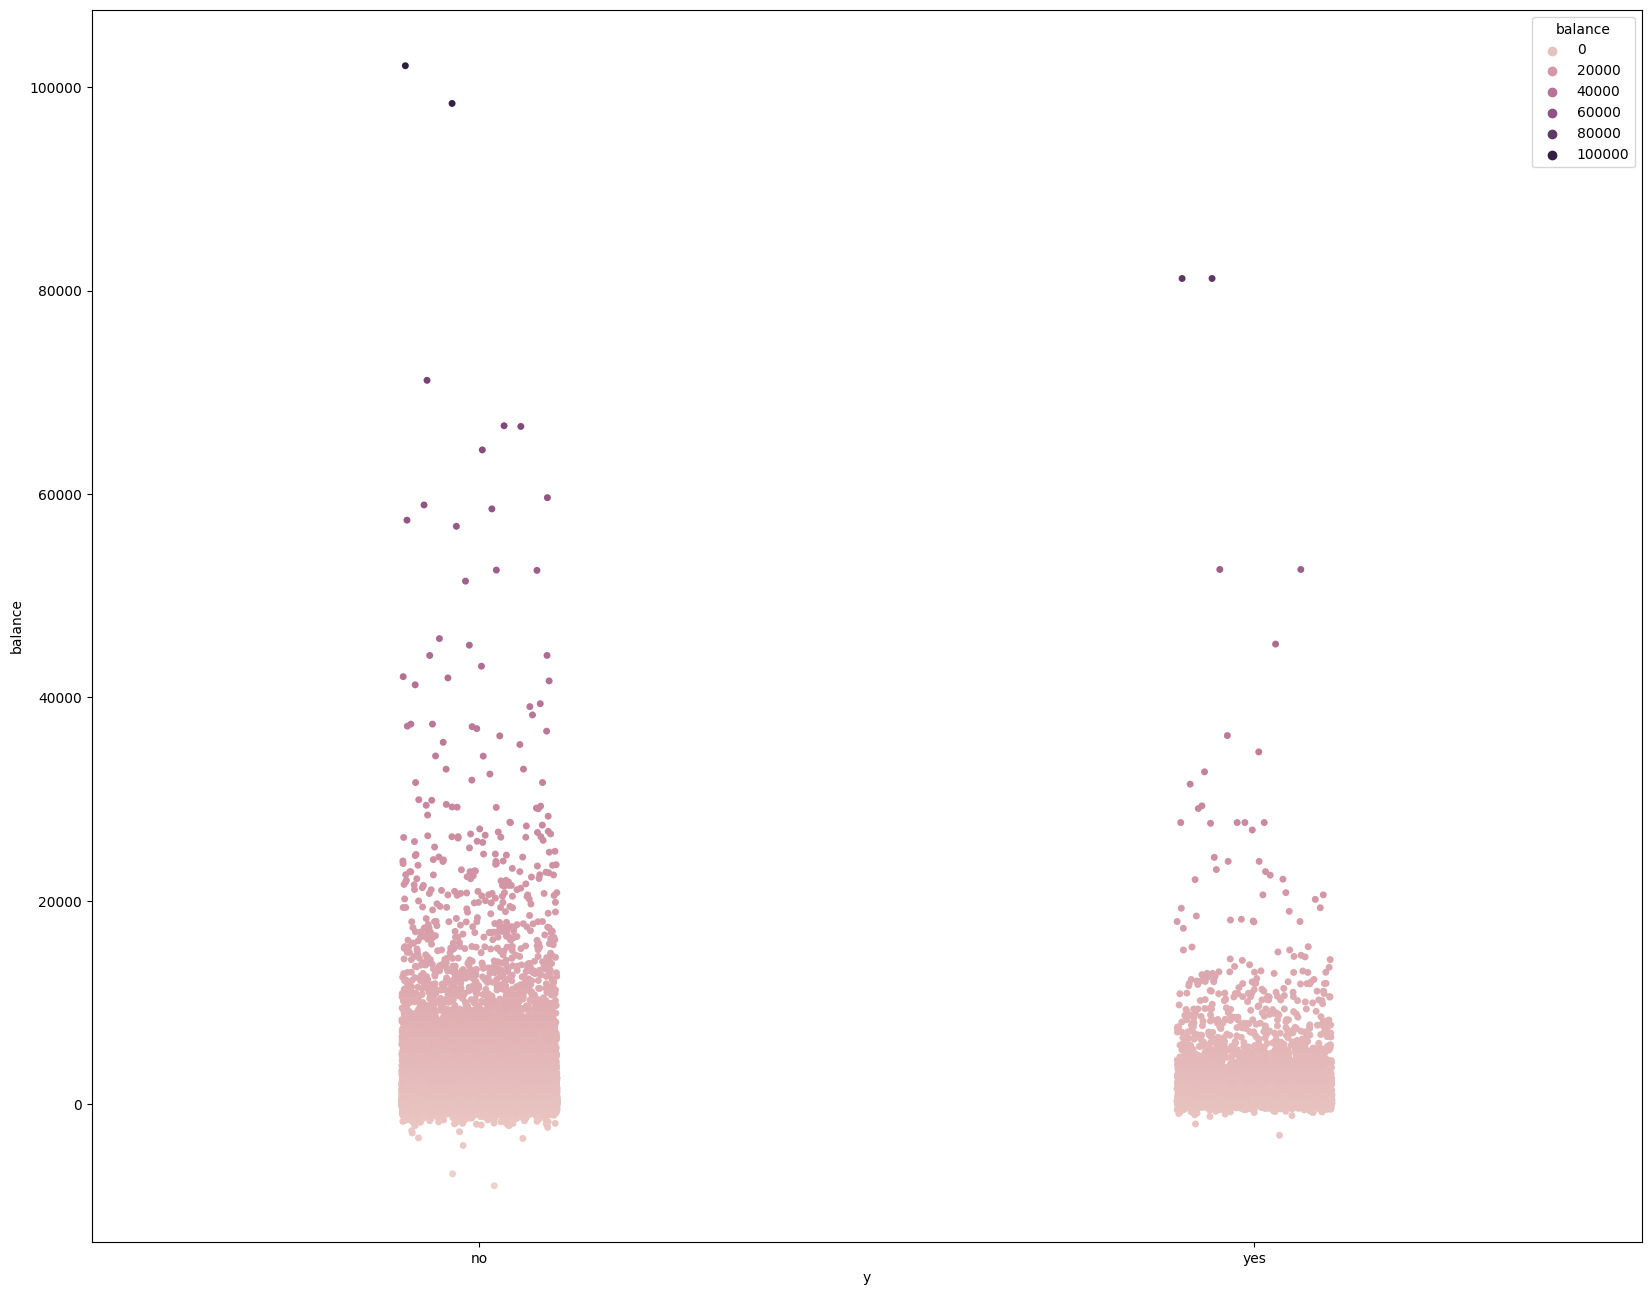

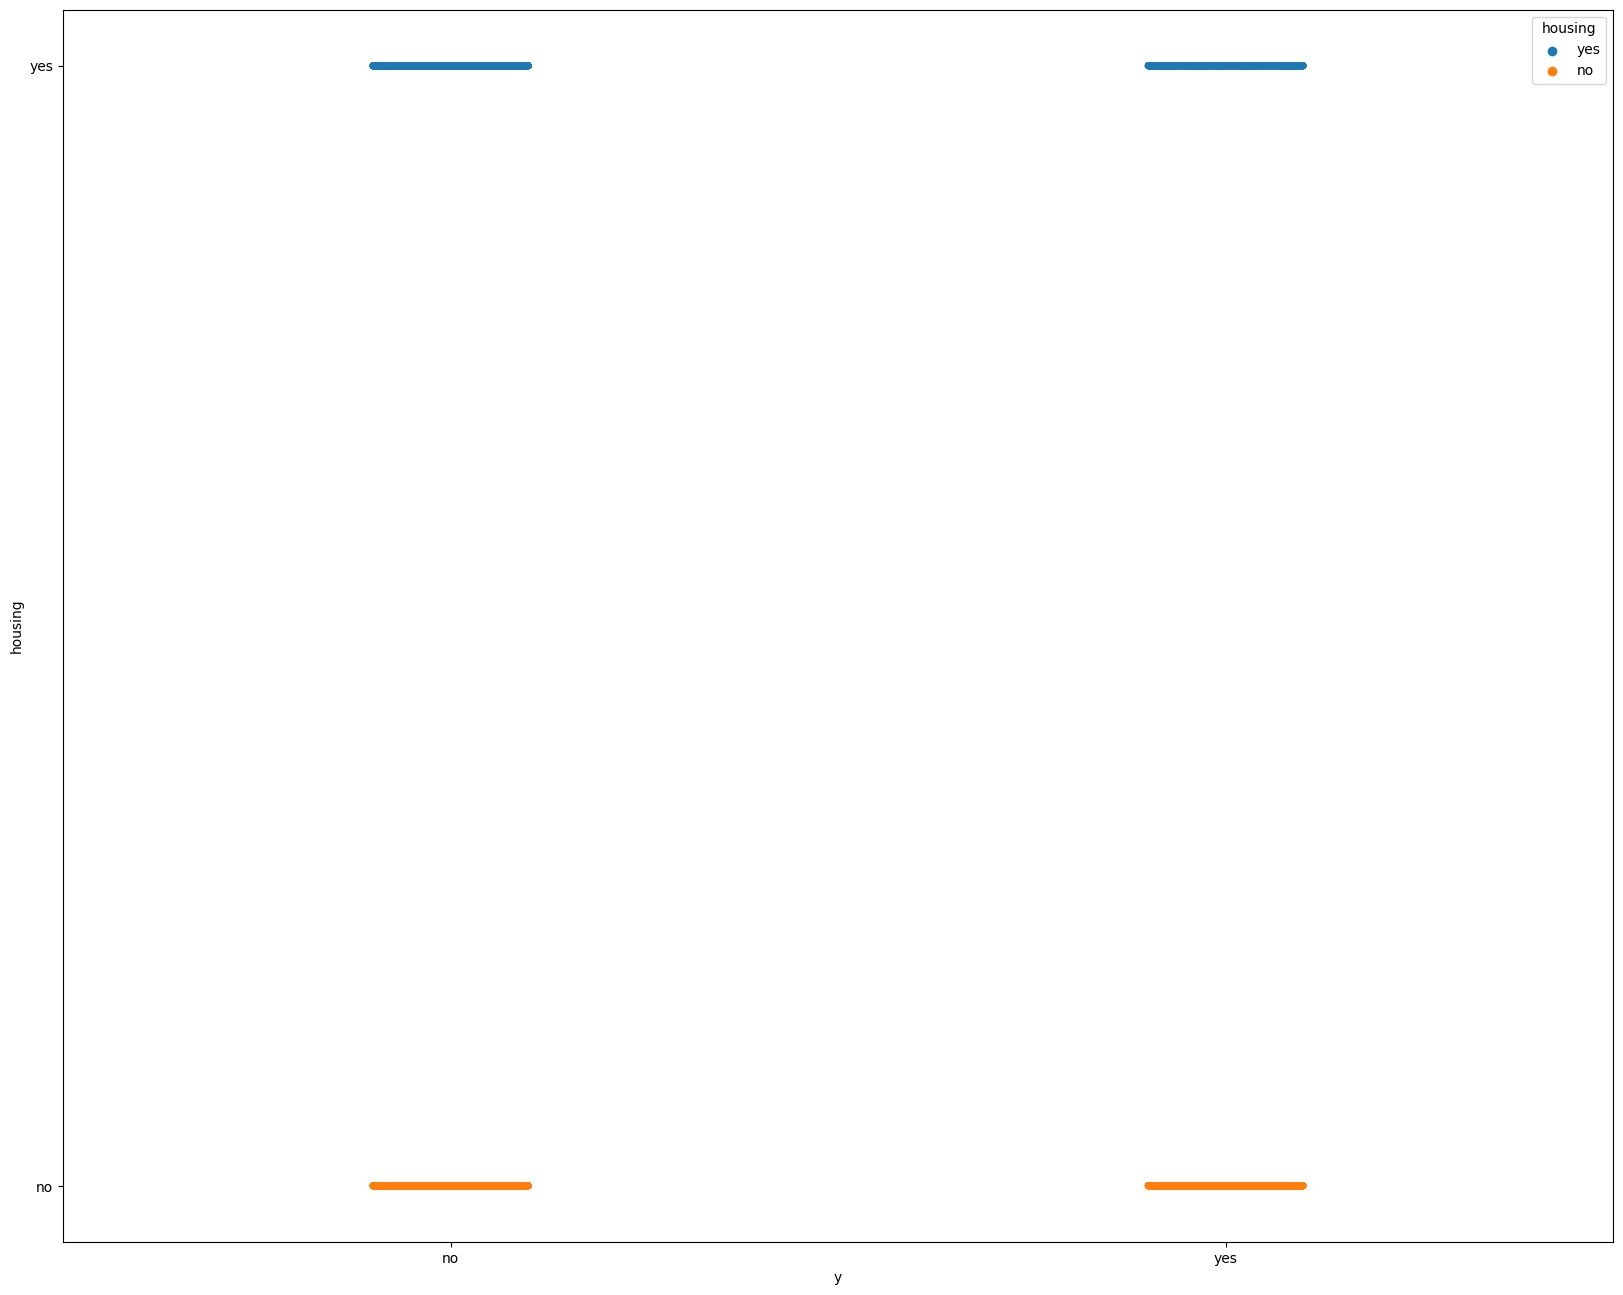

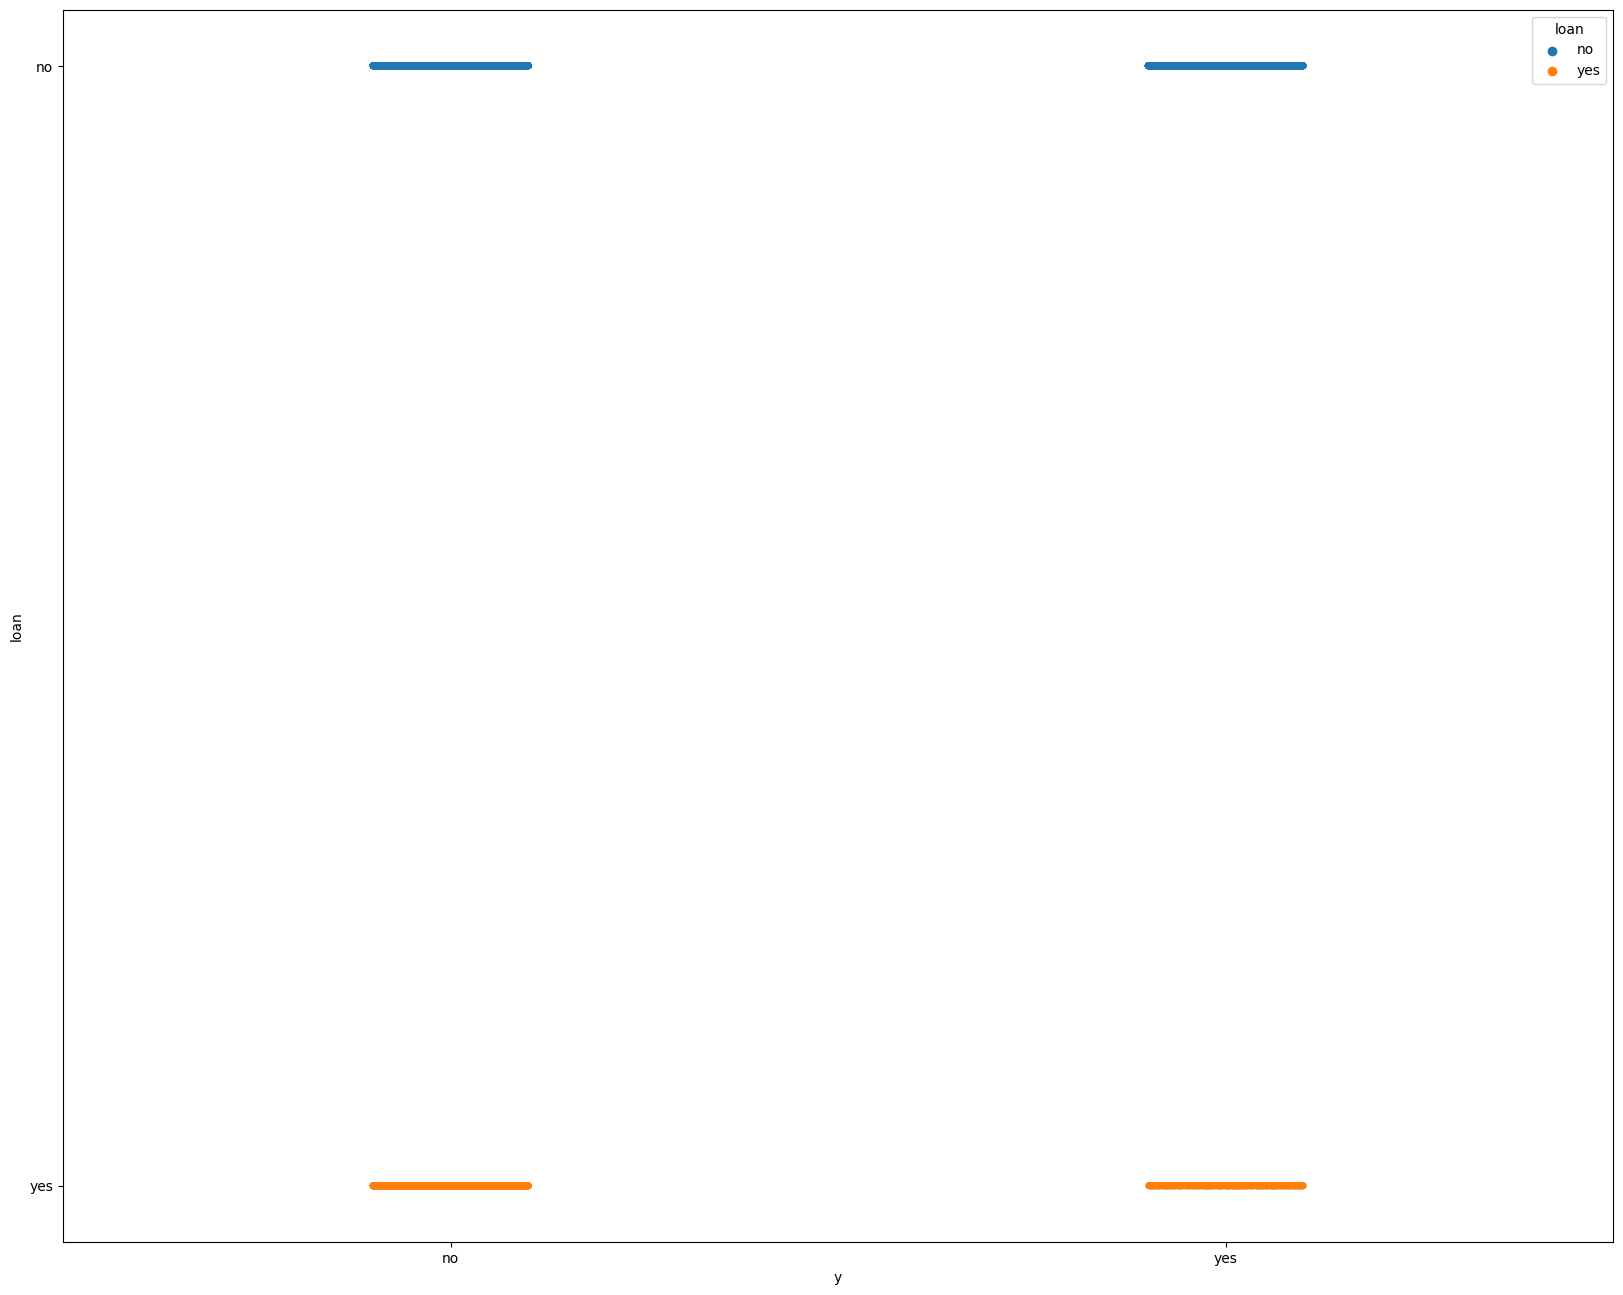

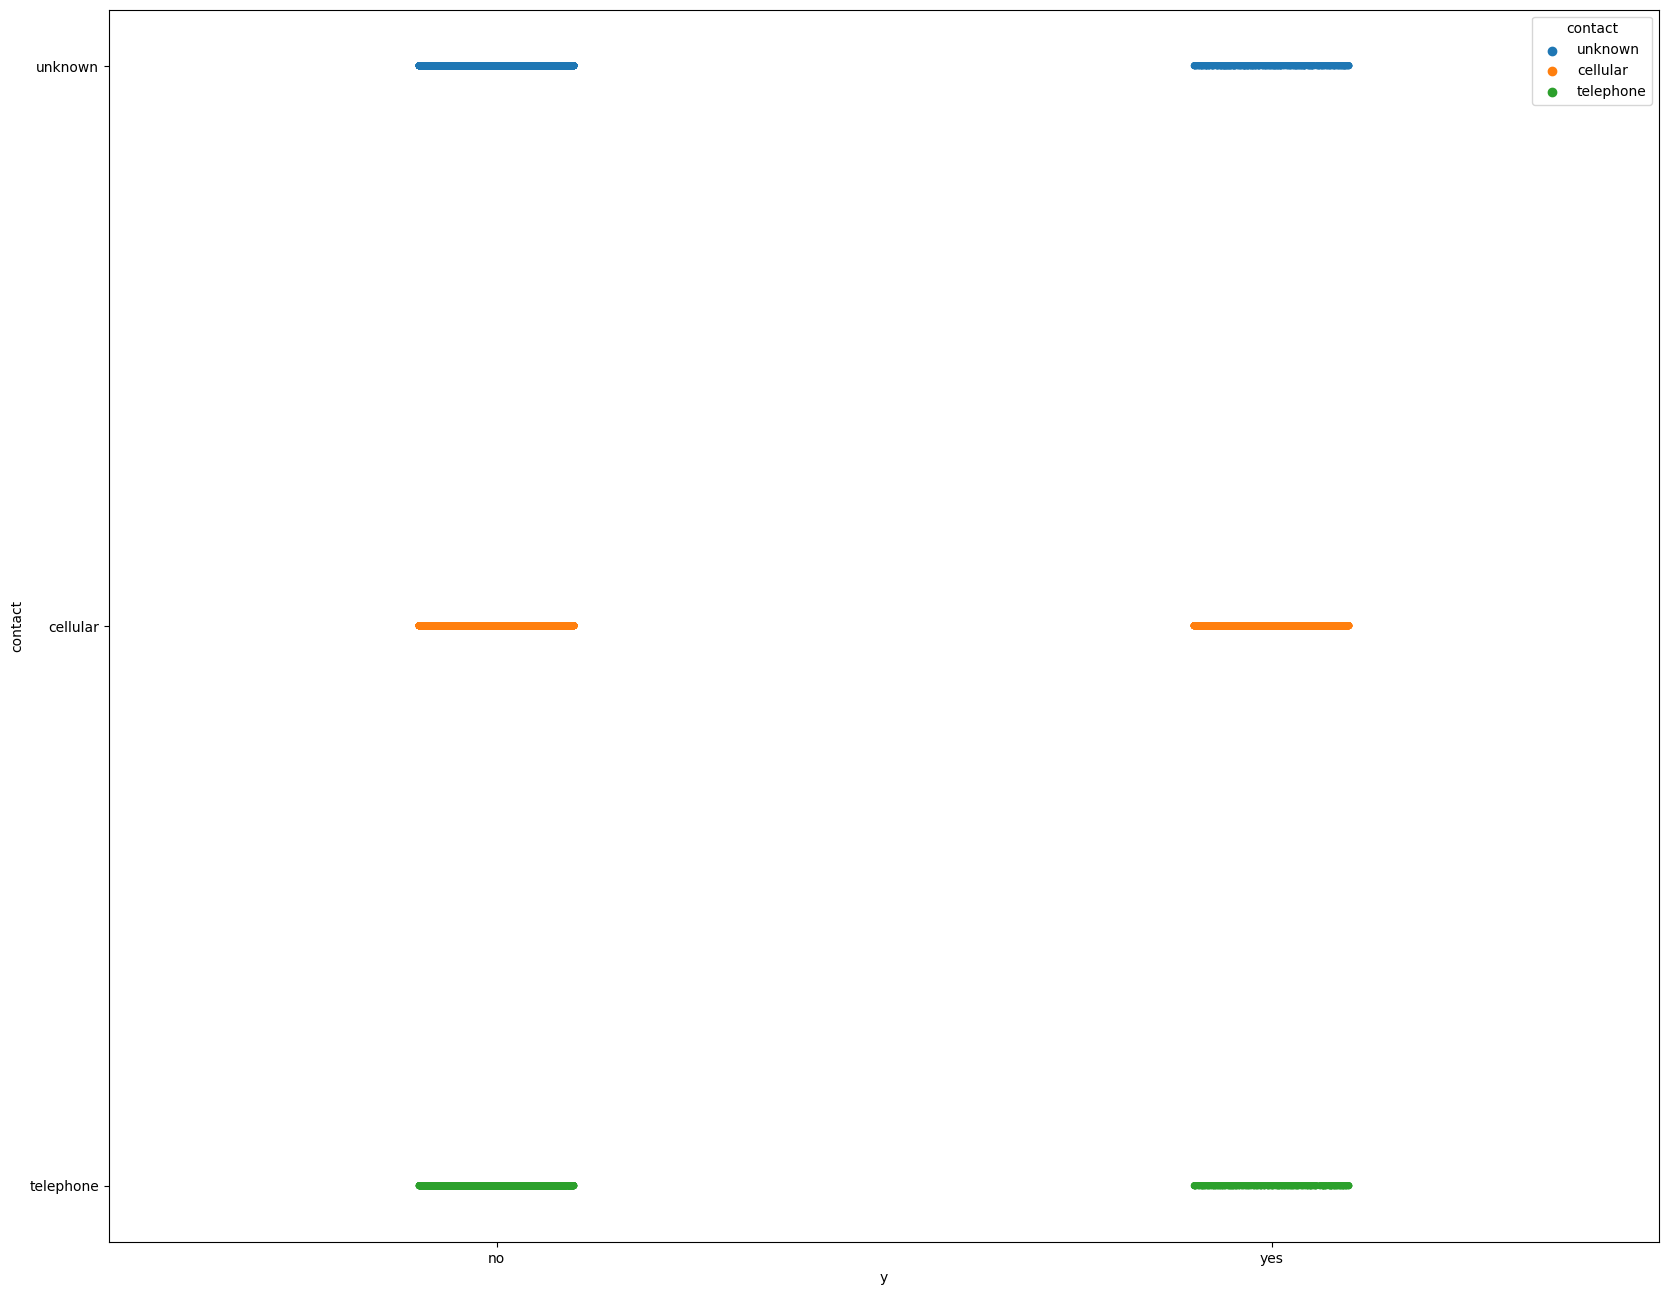

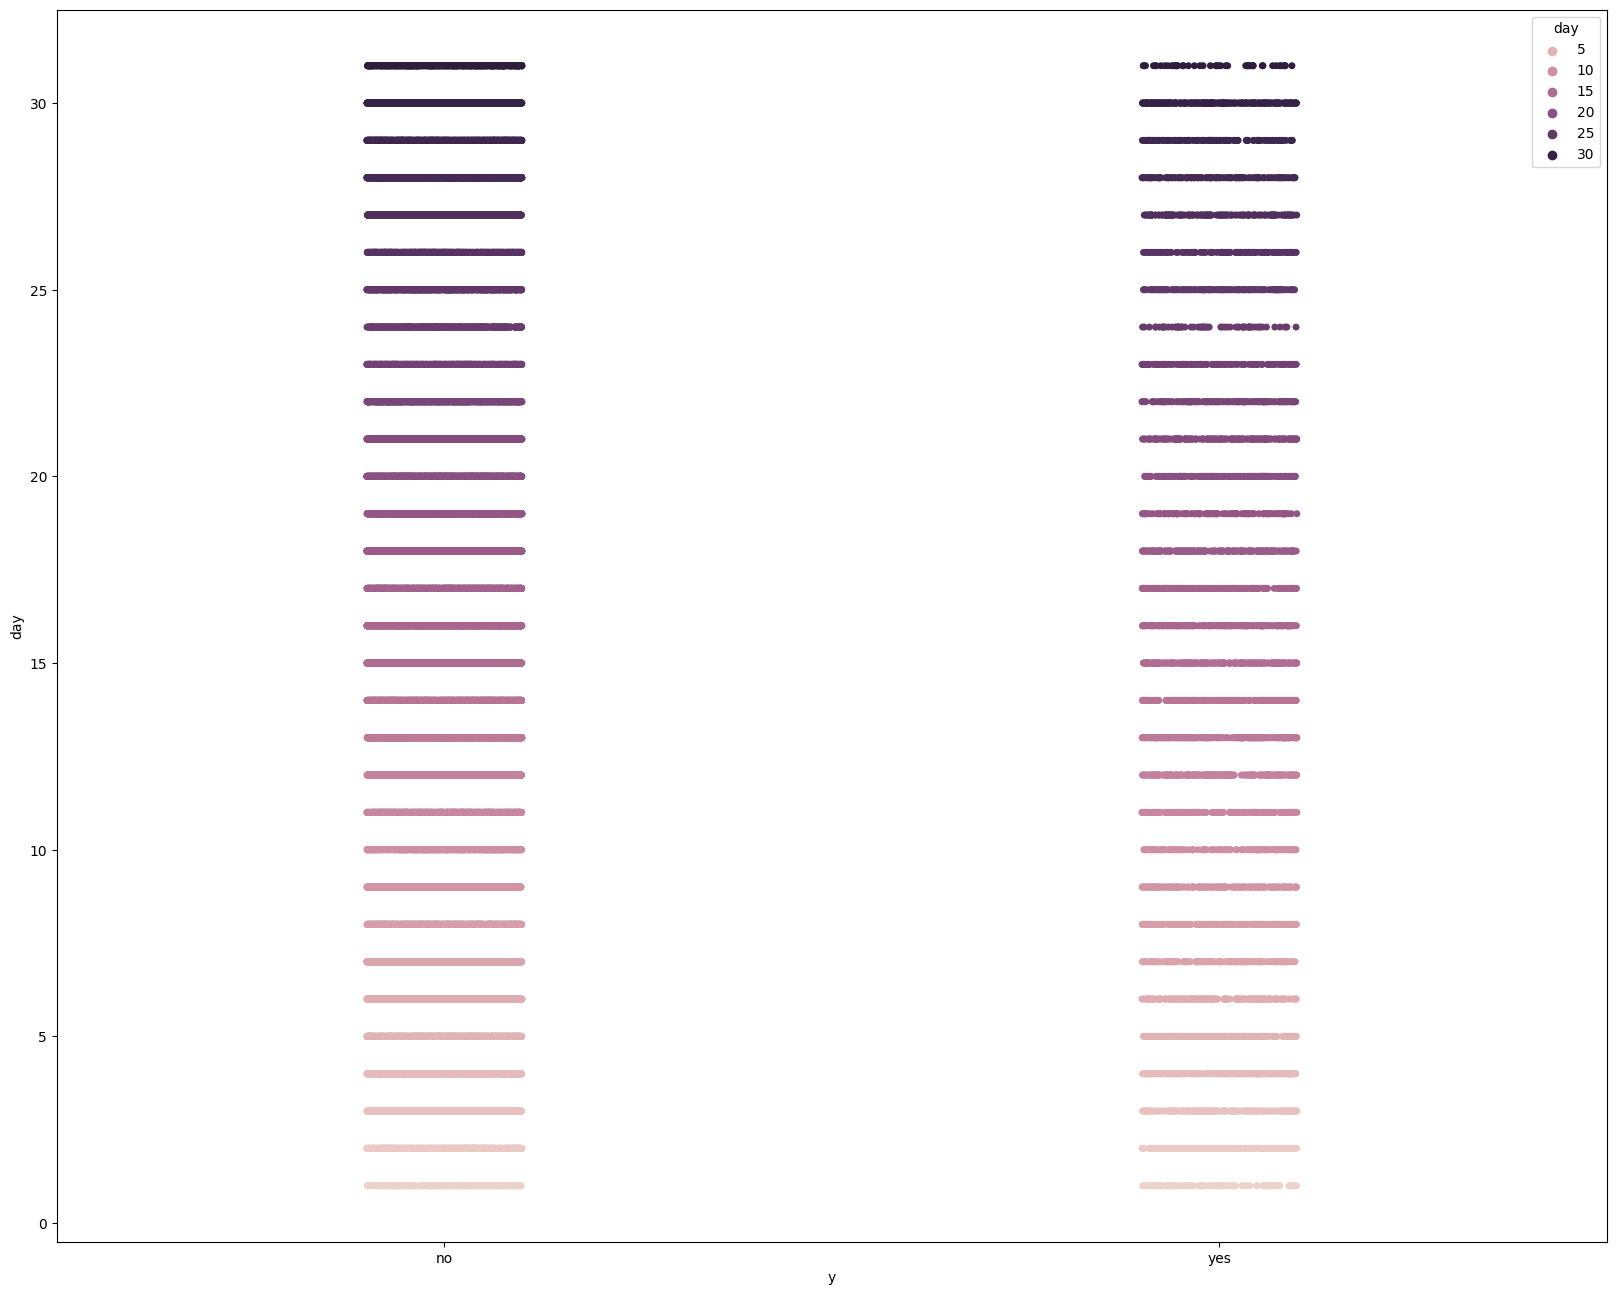

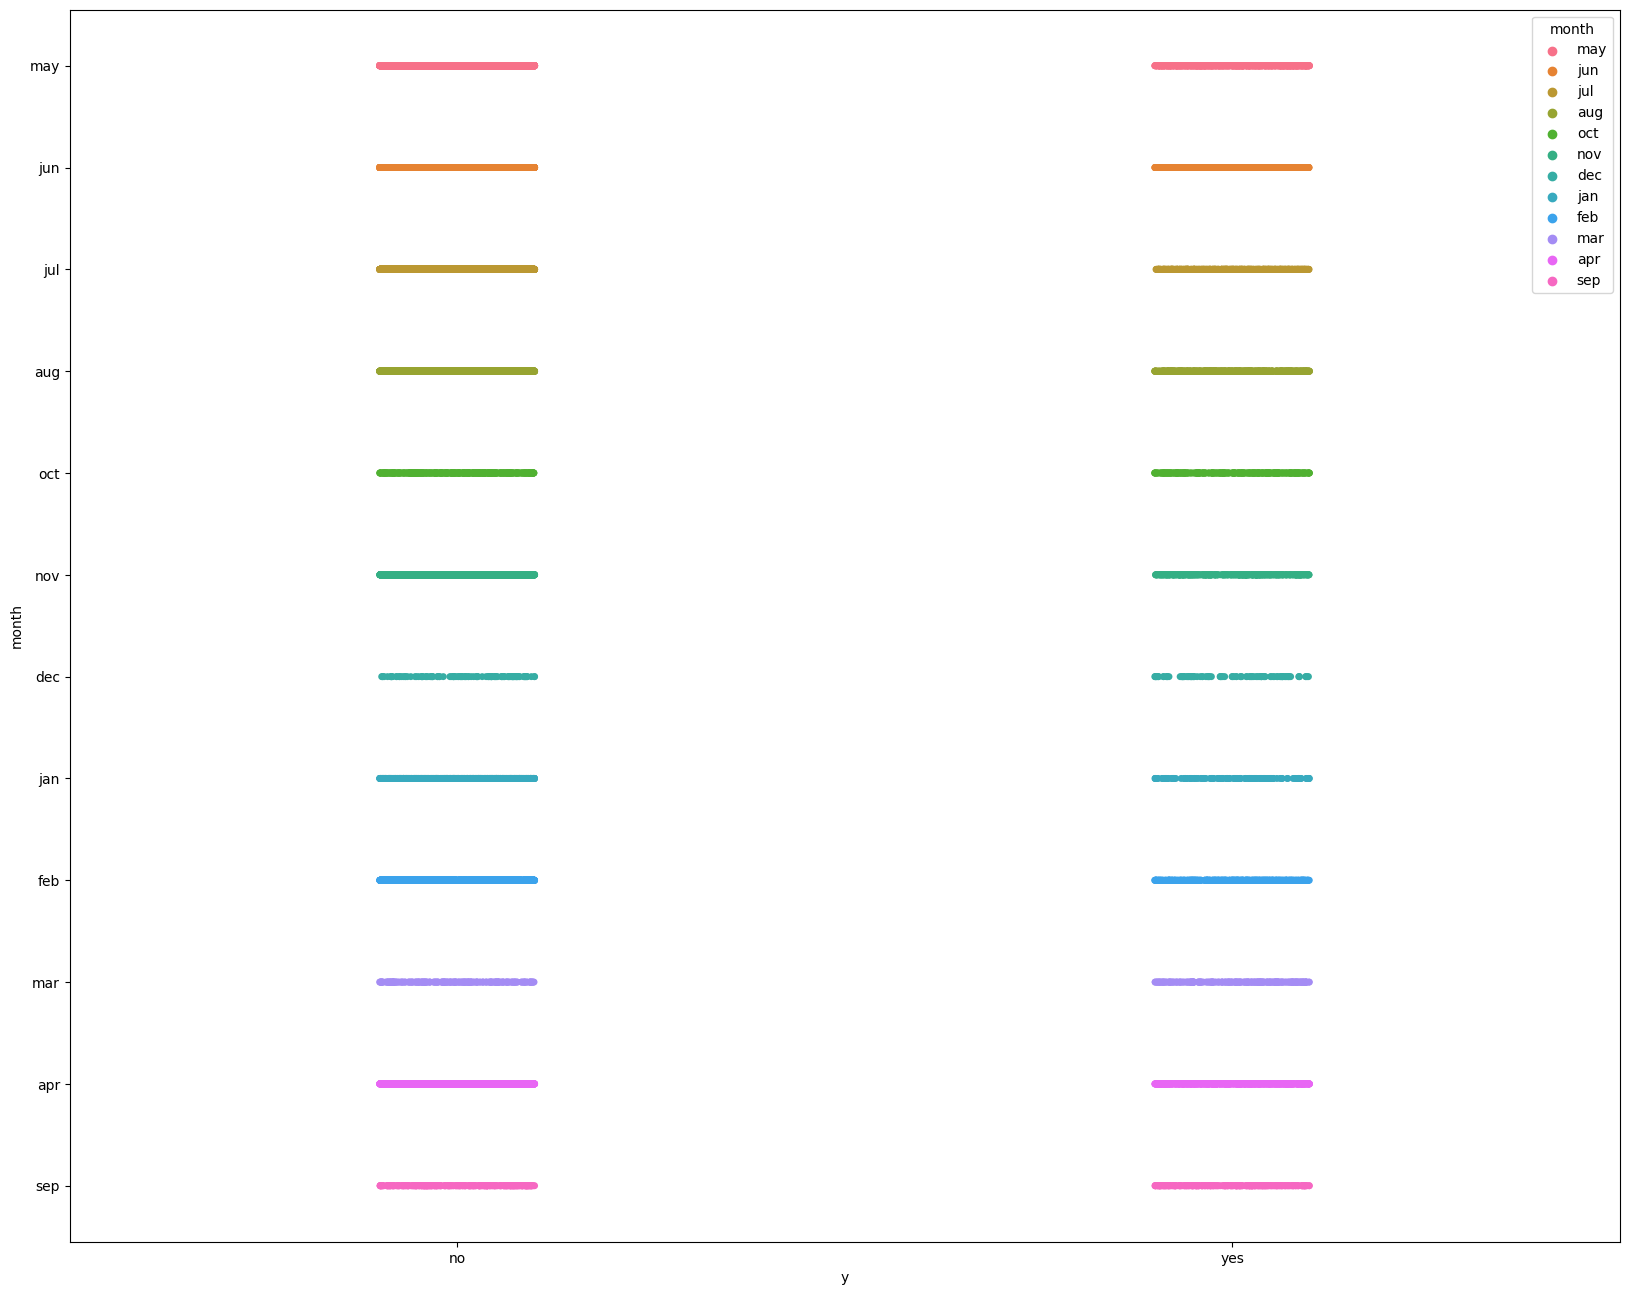

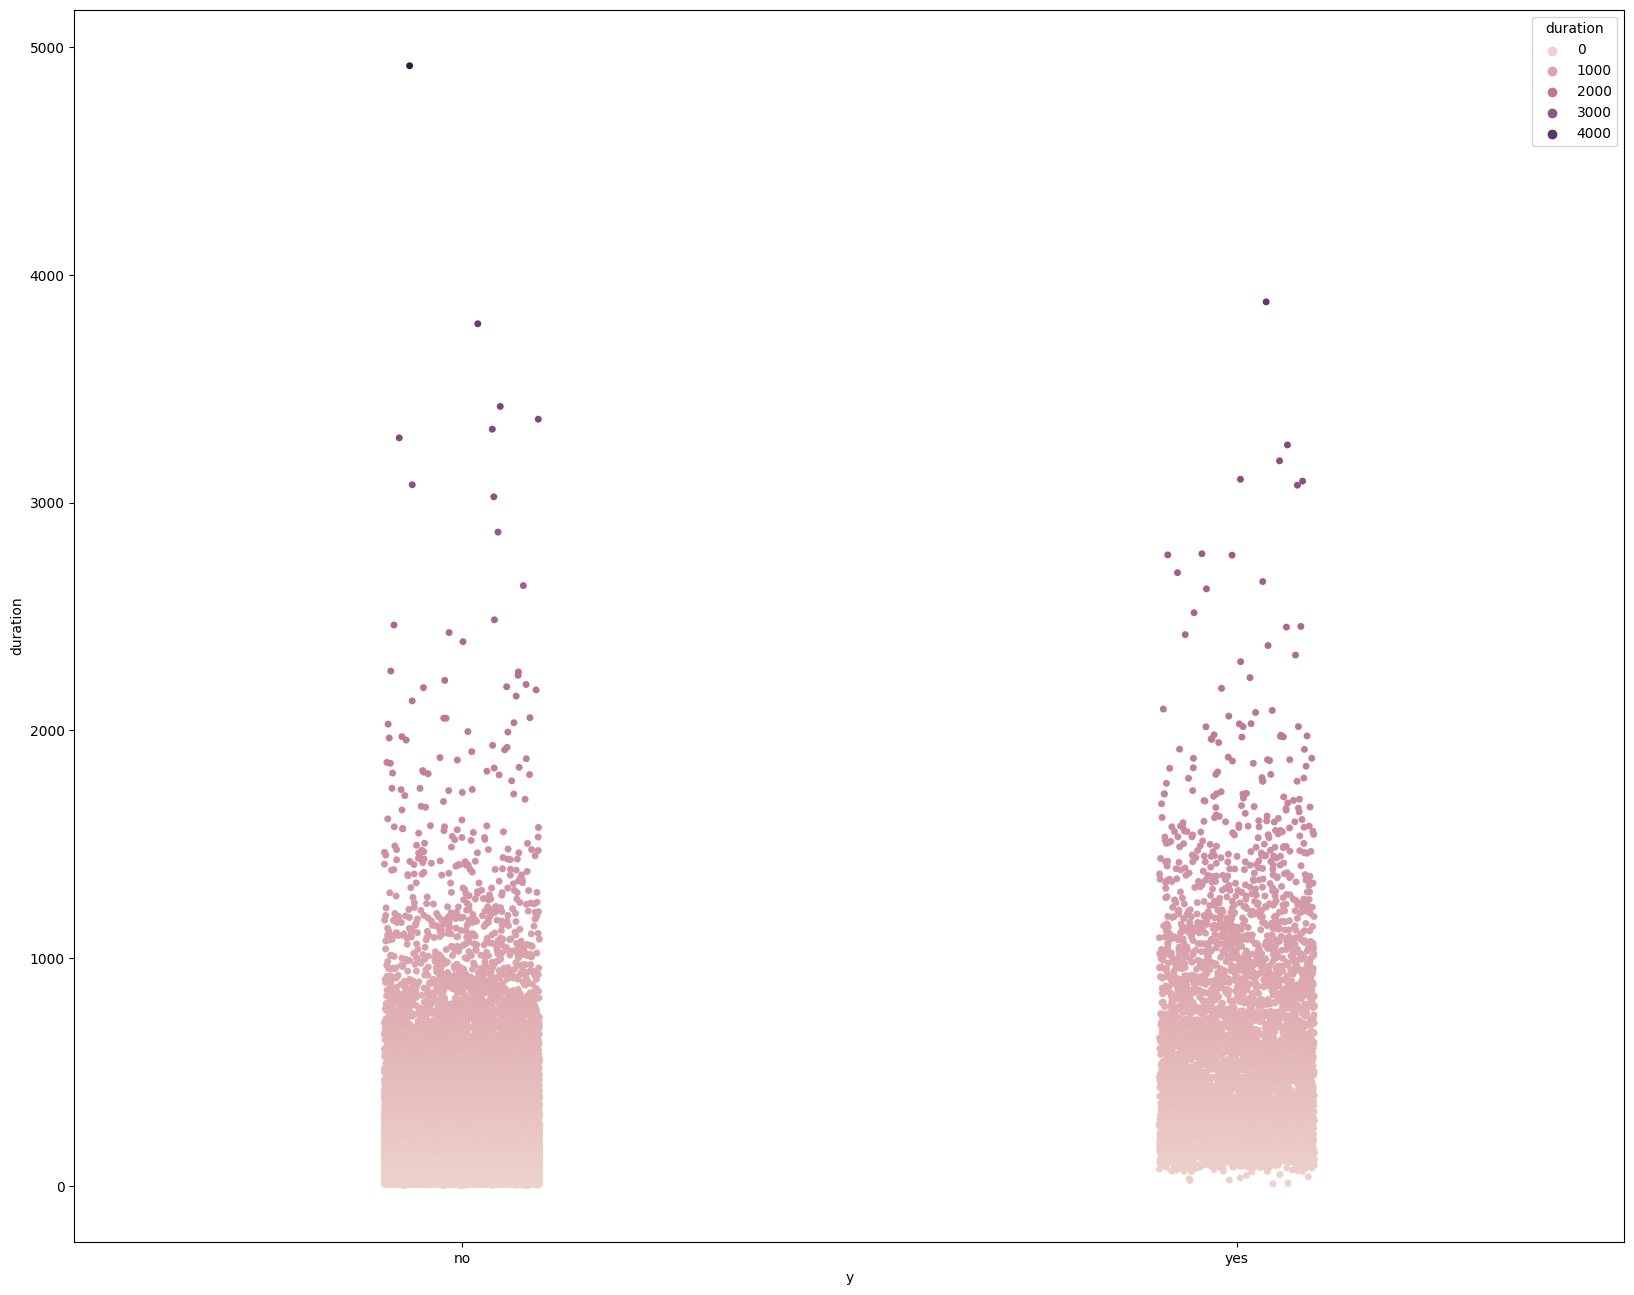

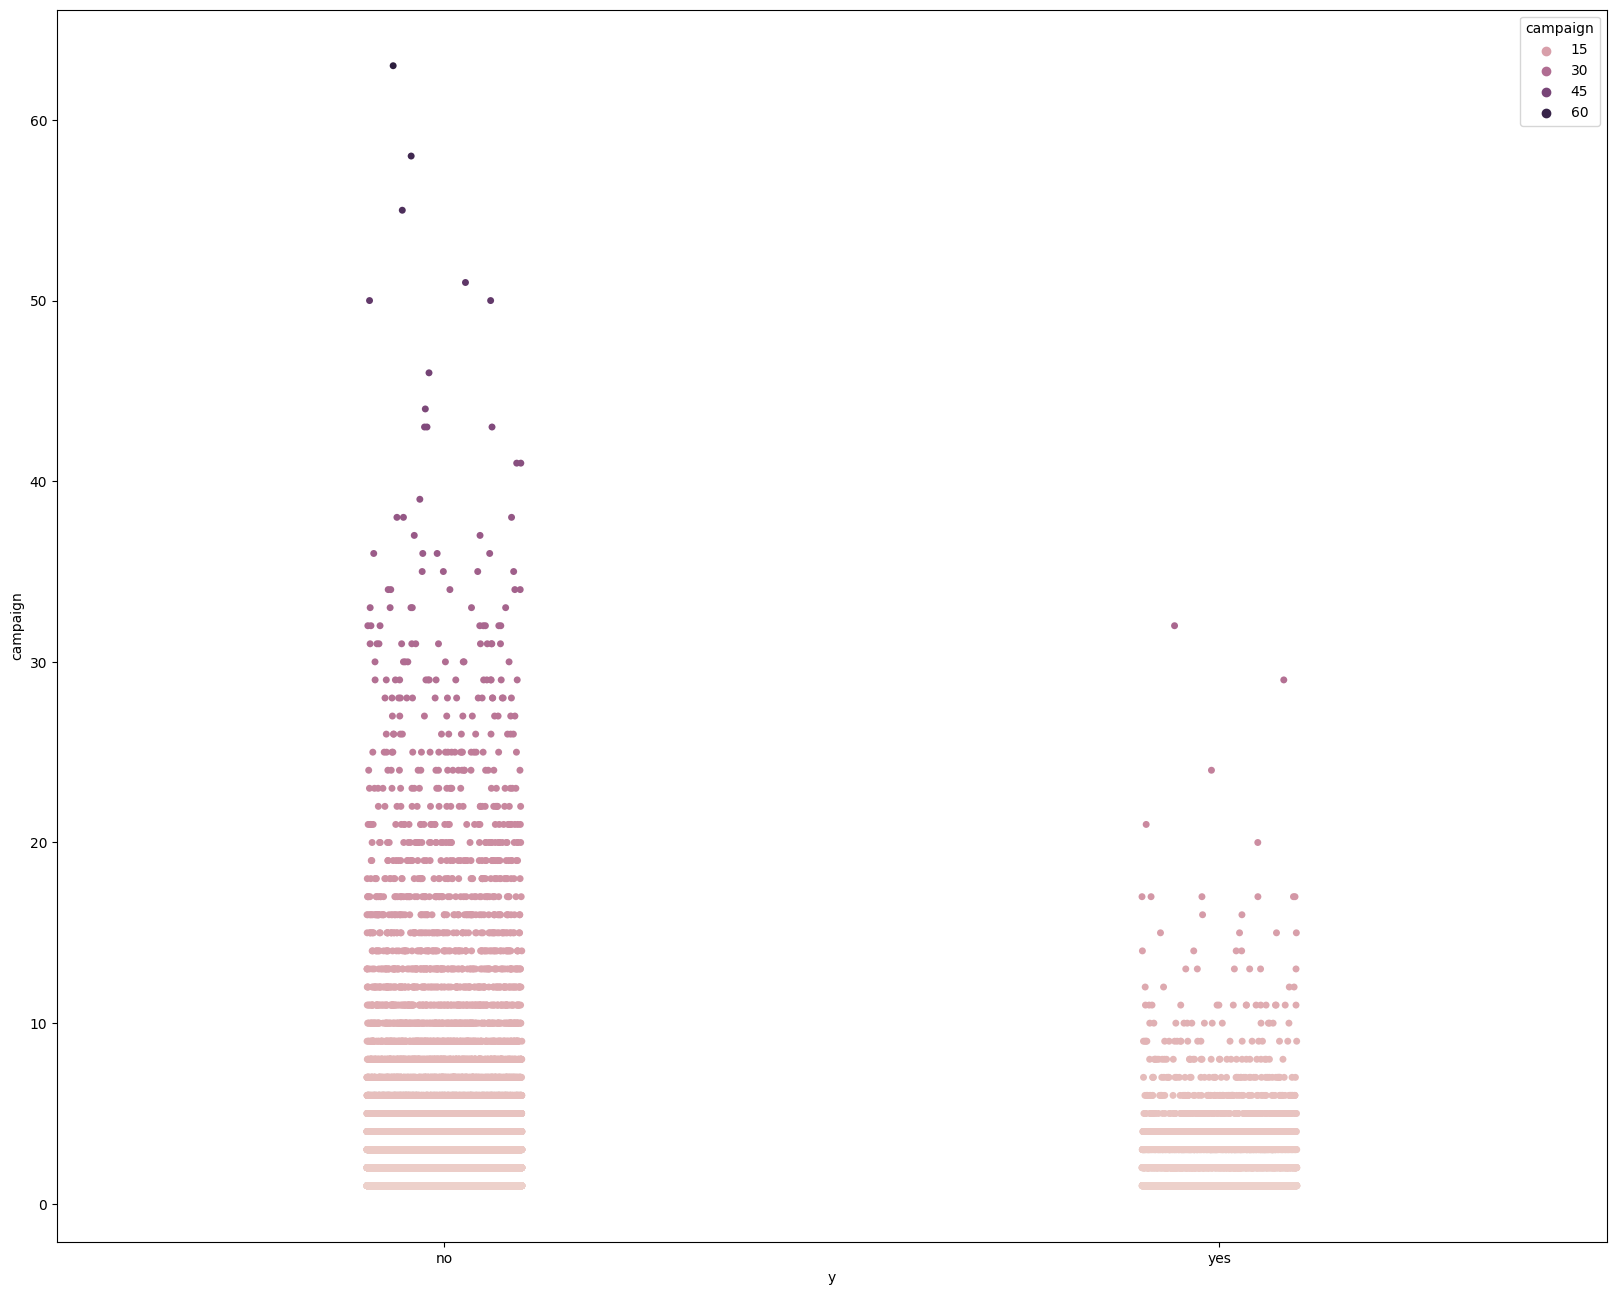

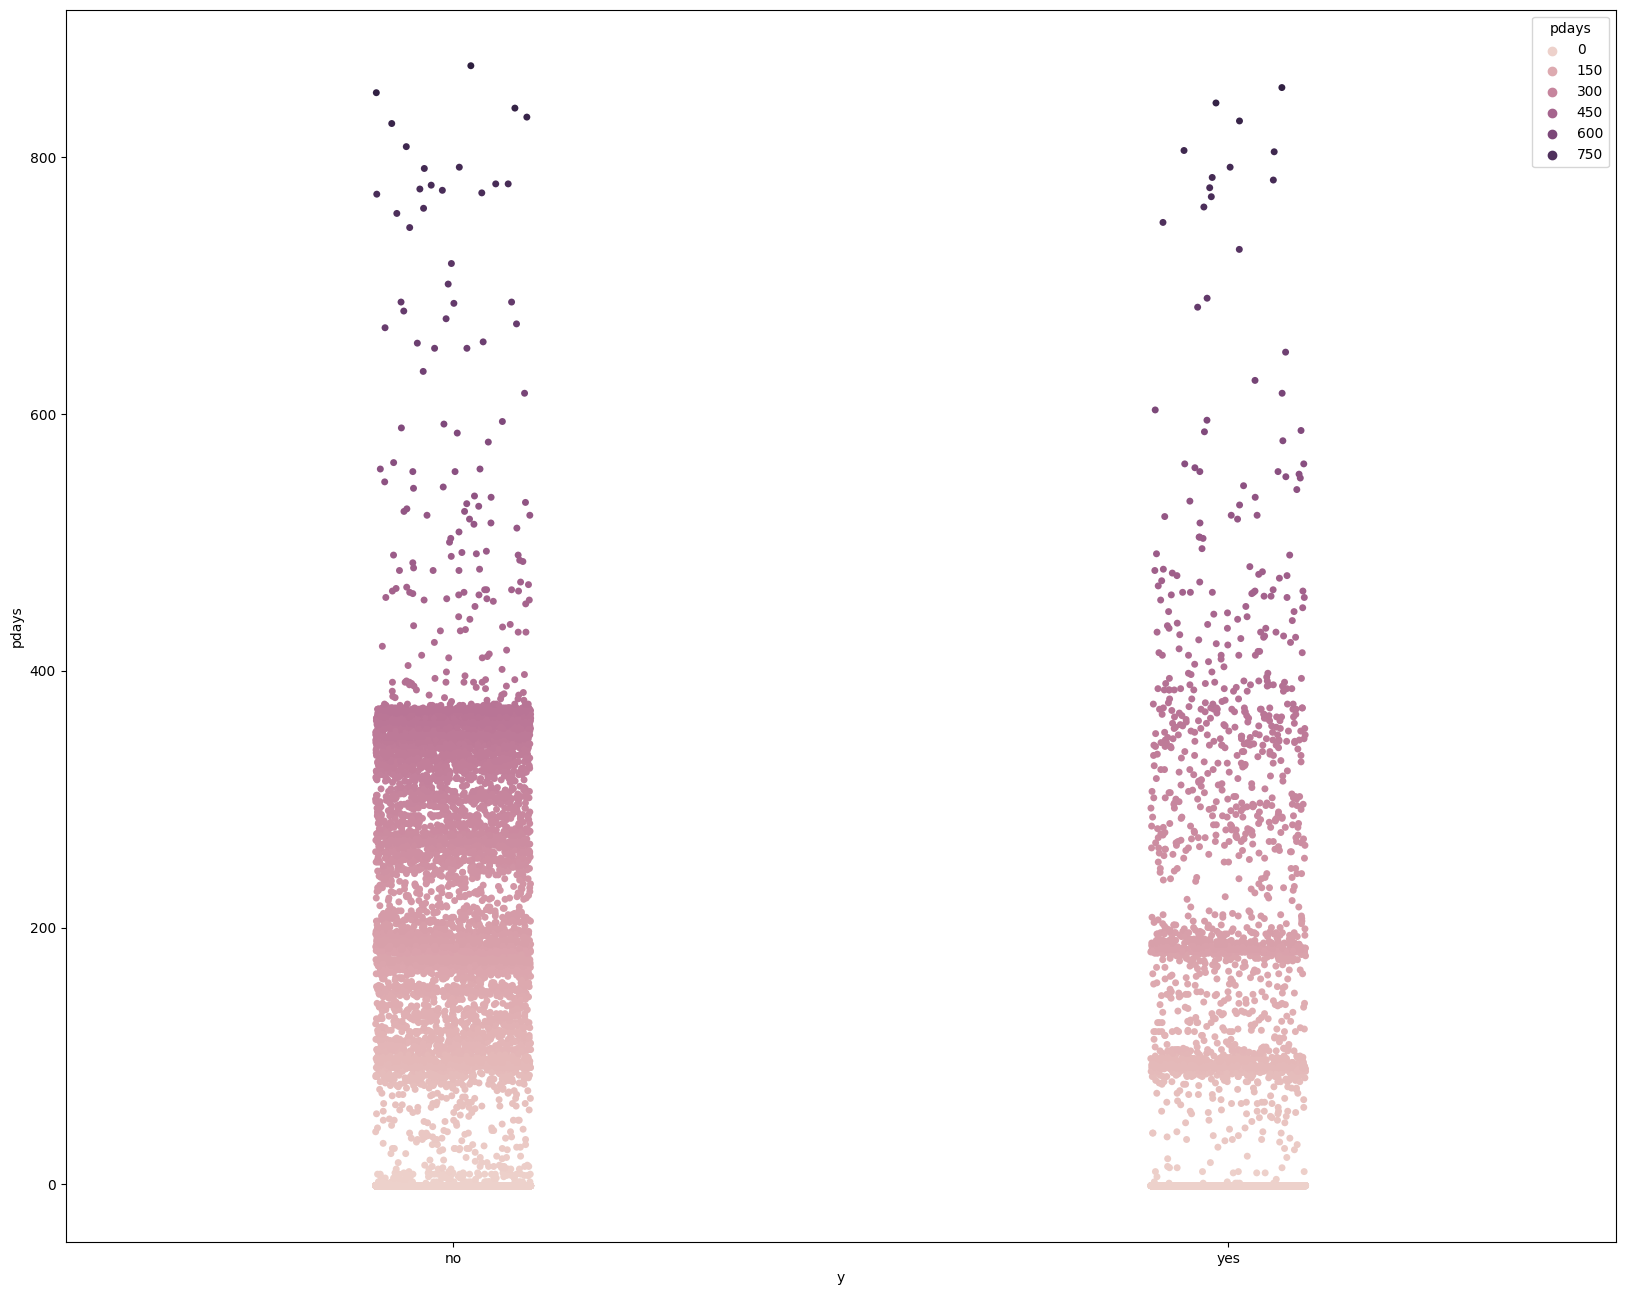

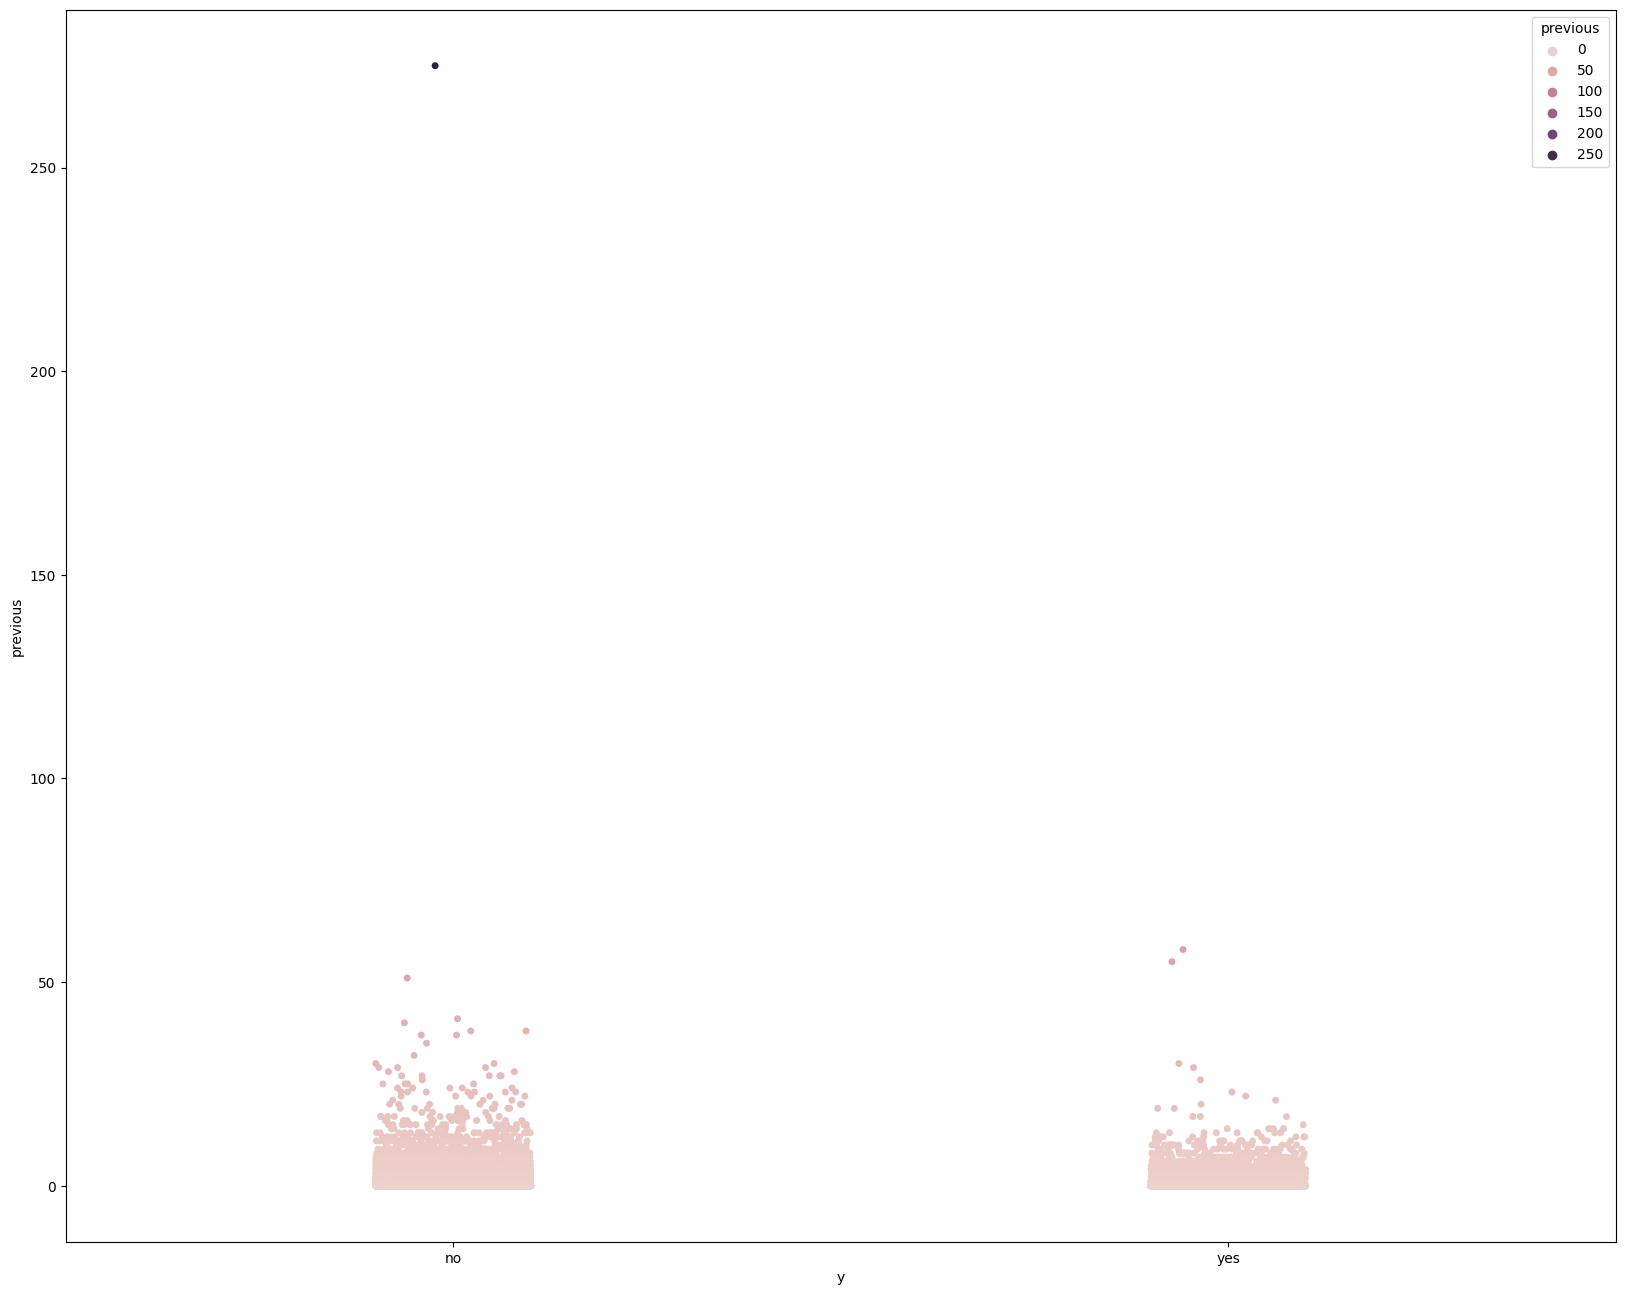

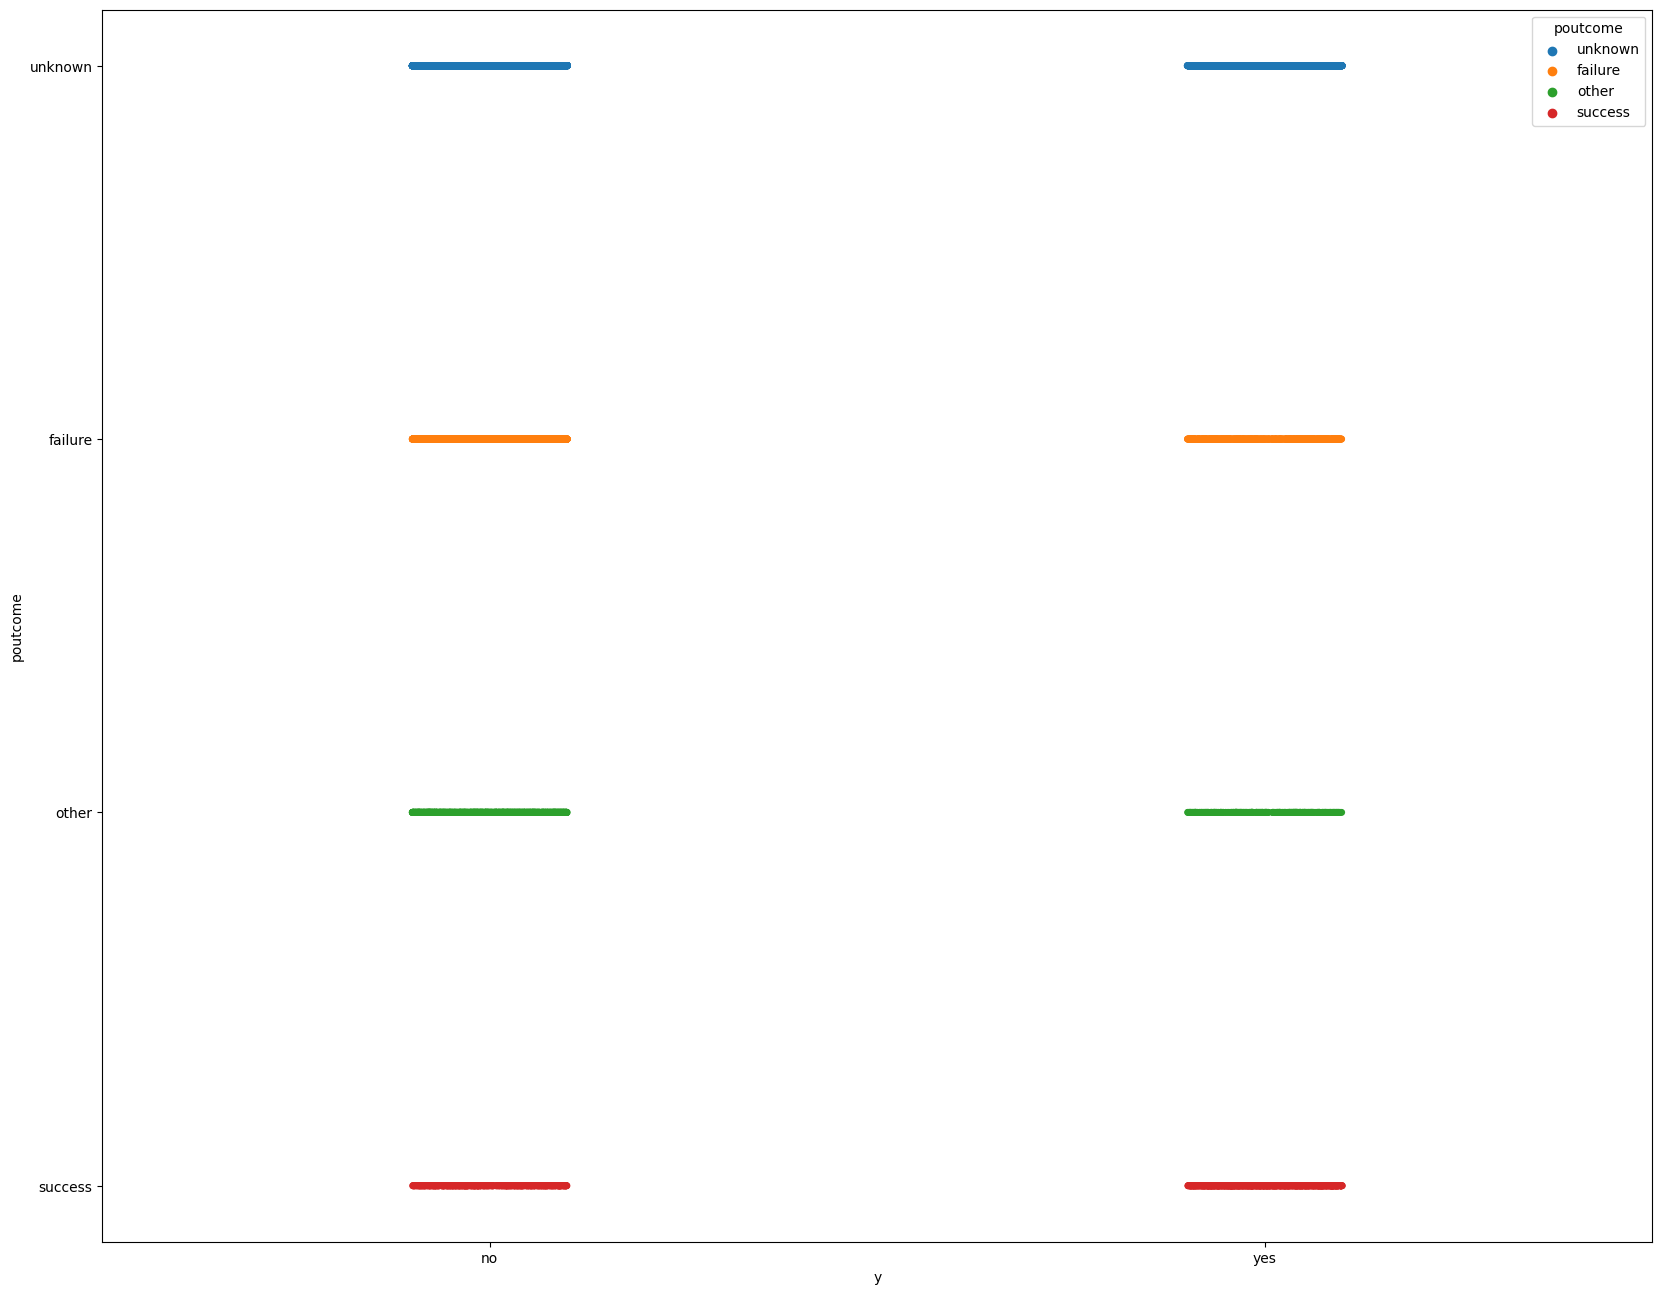

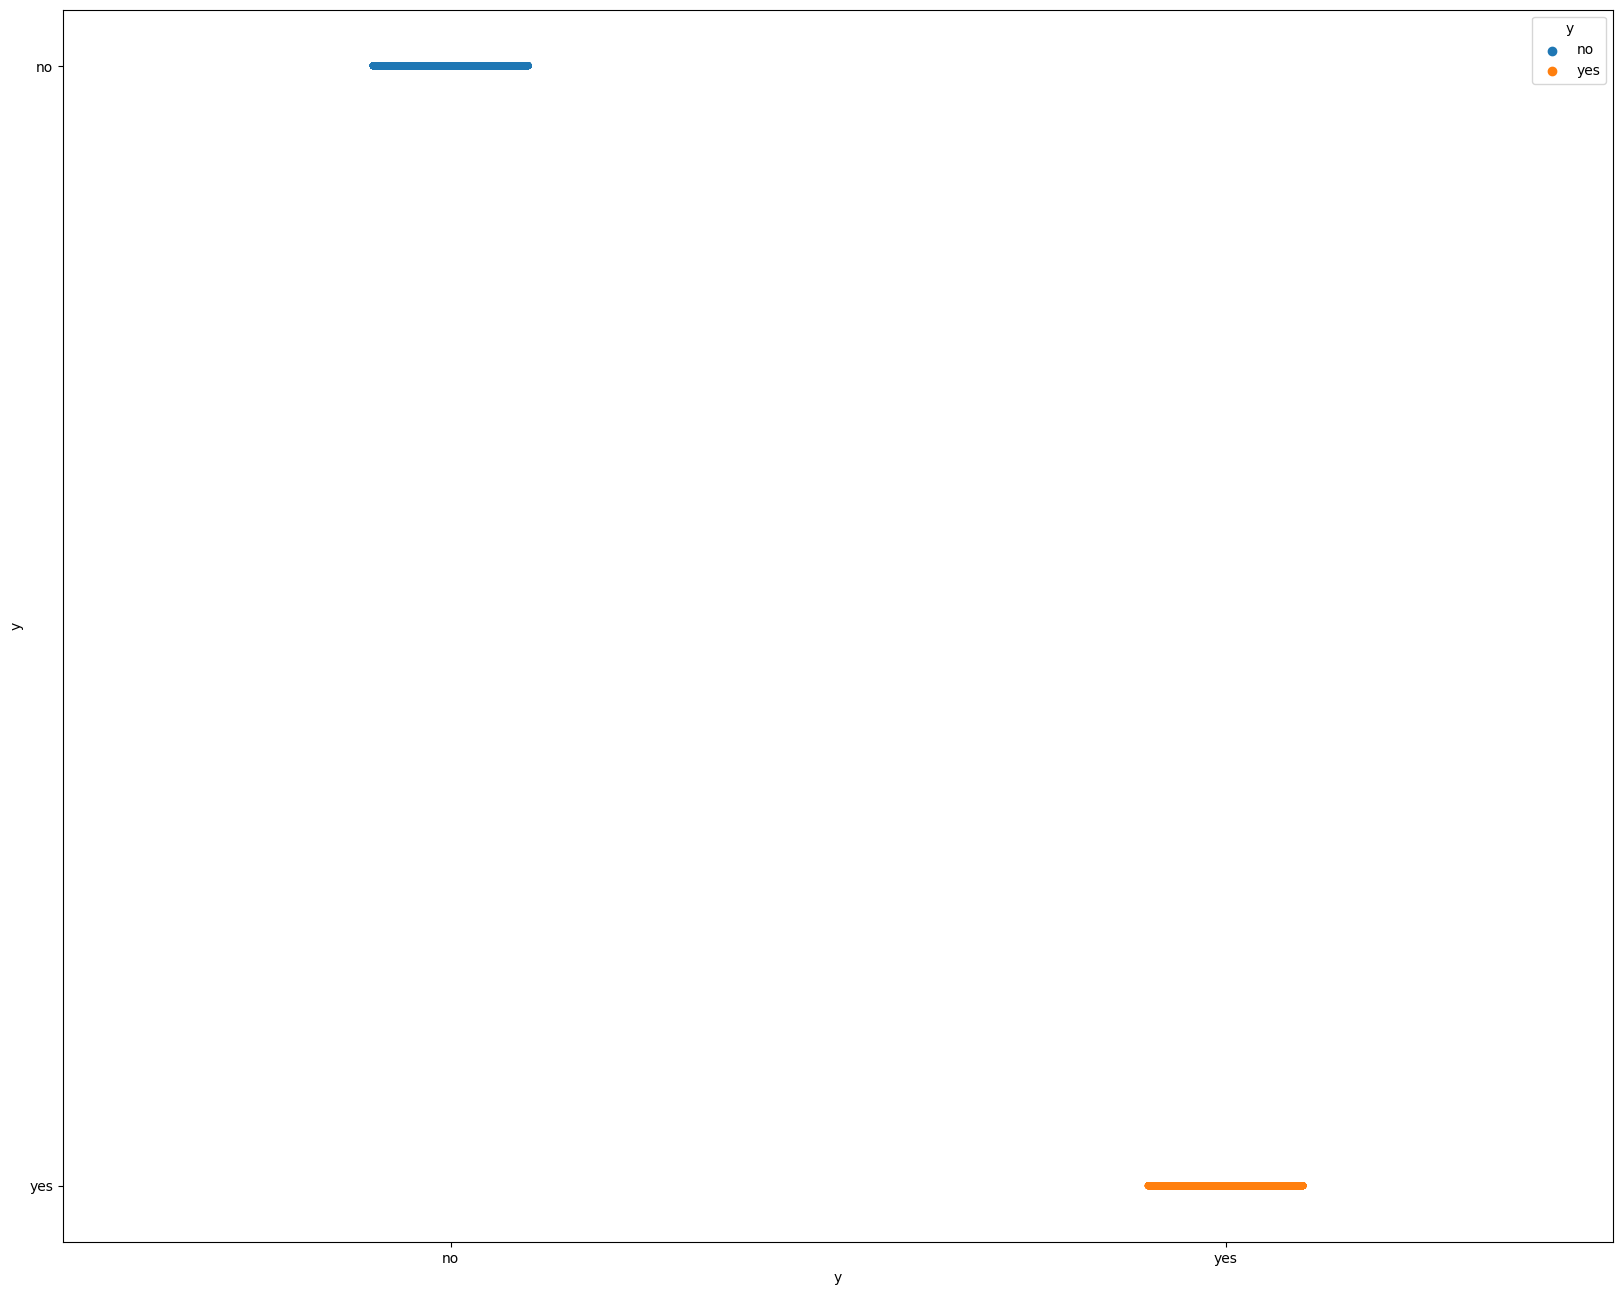

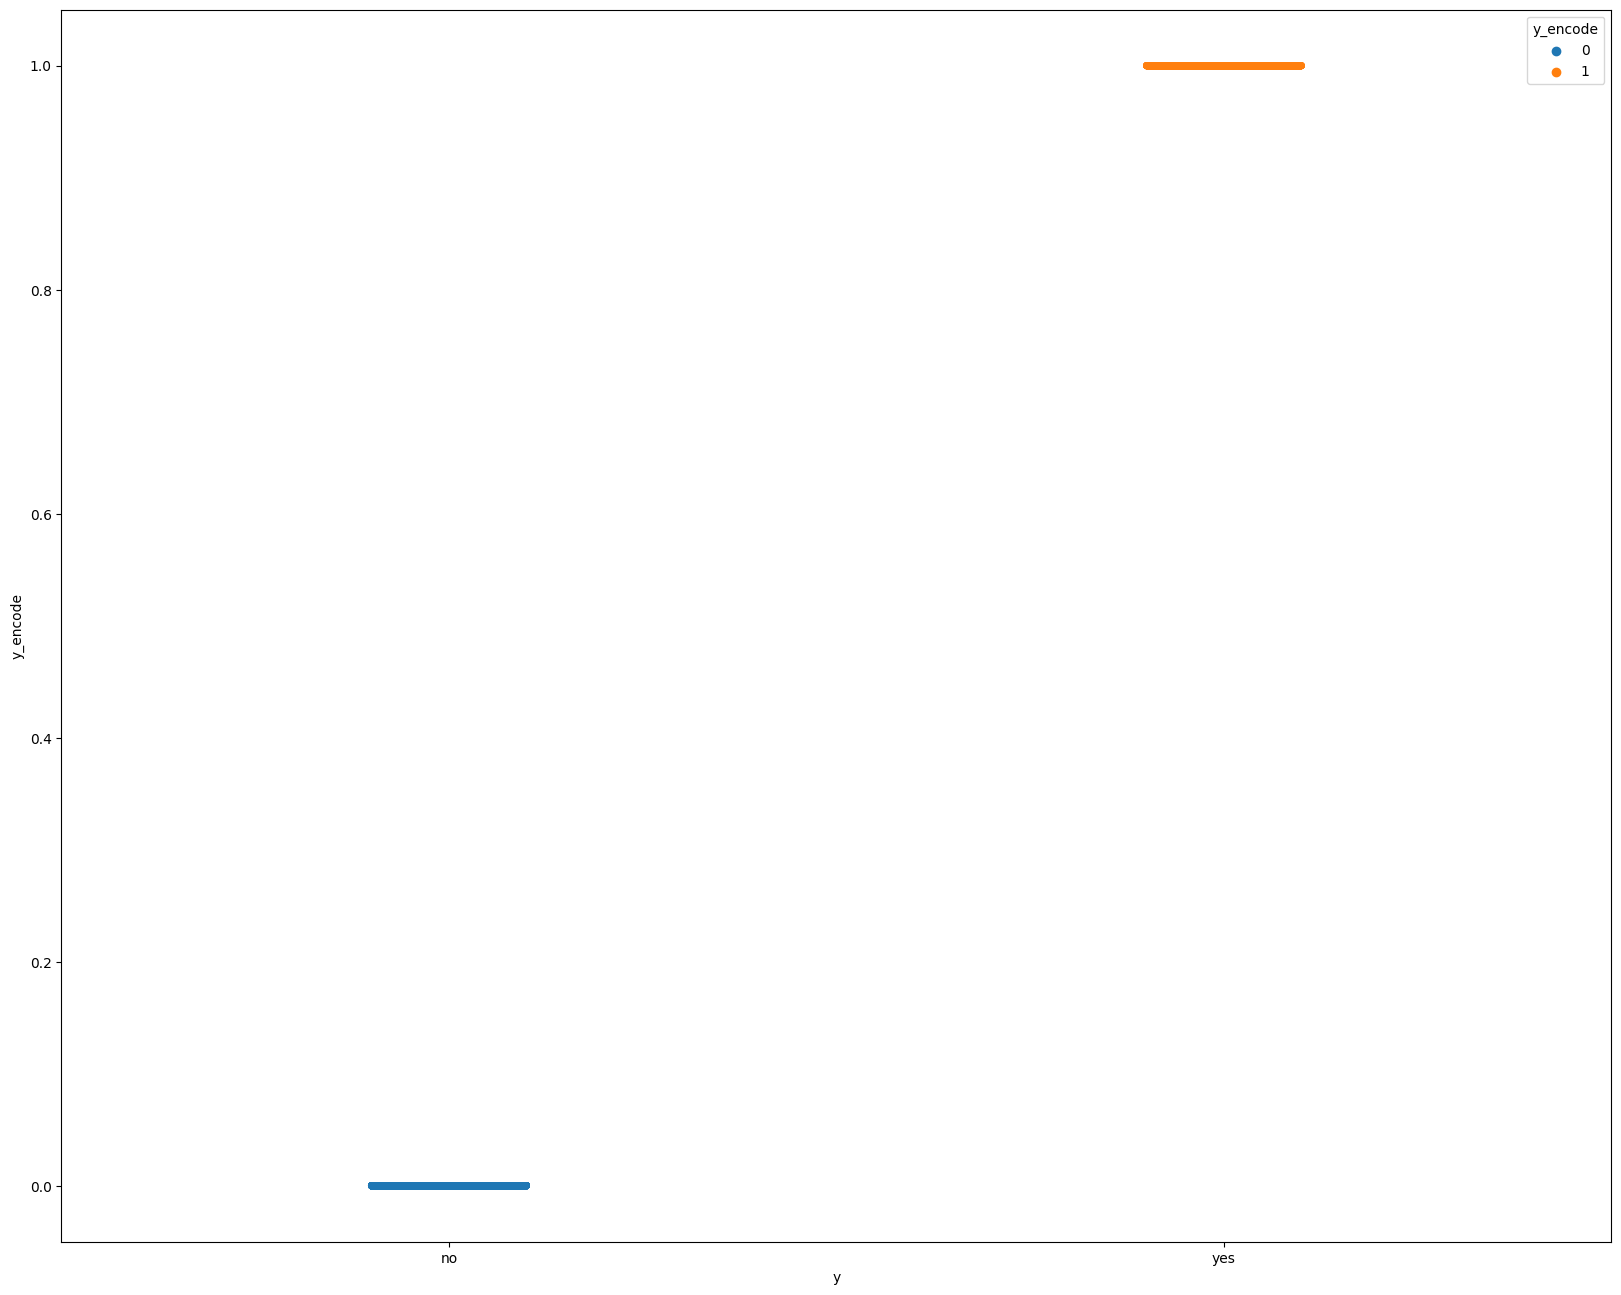

In [13]:
for i in df.columns:
    a = sns.stripplot(data=df, x='y', y=i, hue=i)
    plt.pyplot.show()

In [14]:
#for i in df.columns:
    #a = sns.kdeplot(data=df, x='y', y=i)
    #plt.pyplot.show()

In [15]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous      y_encode  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

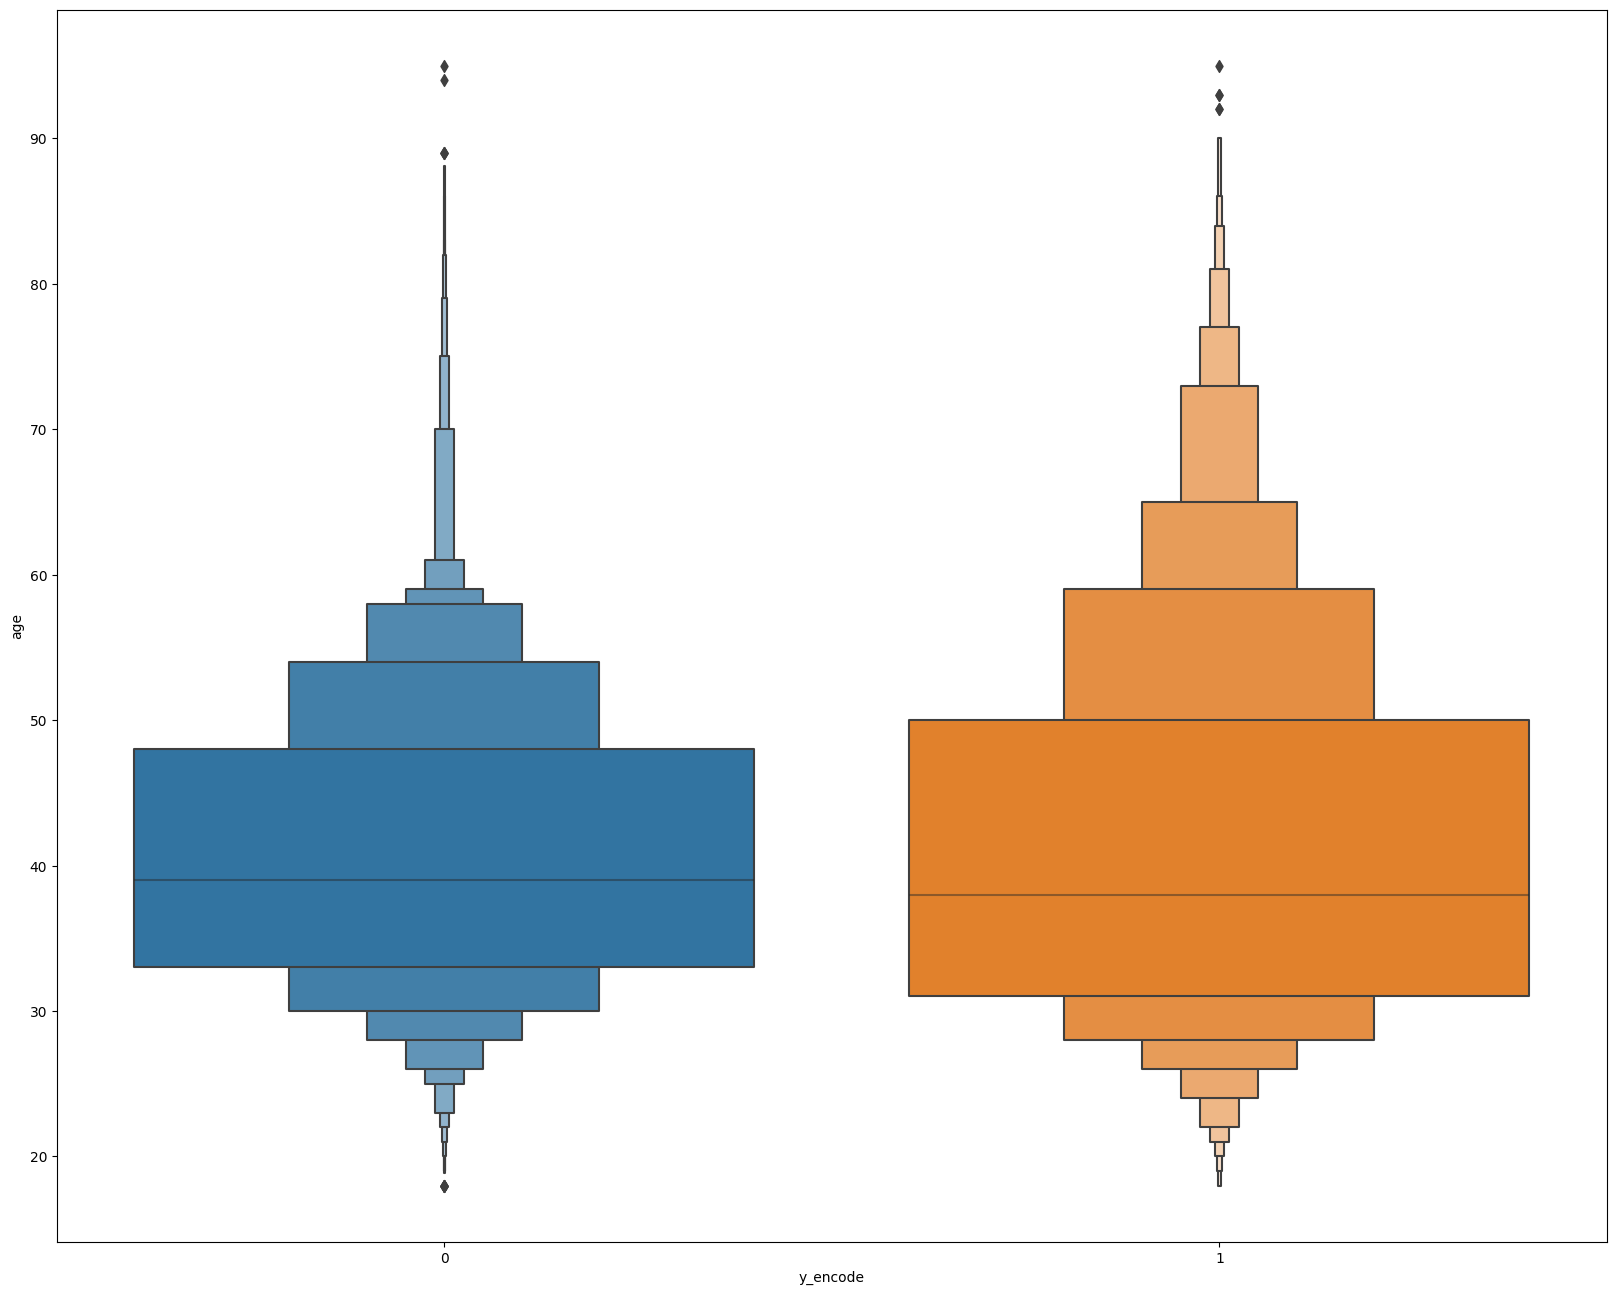

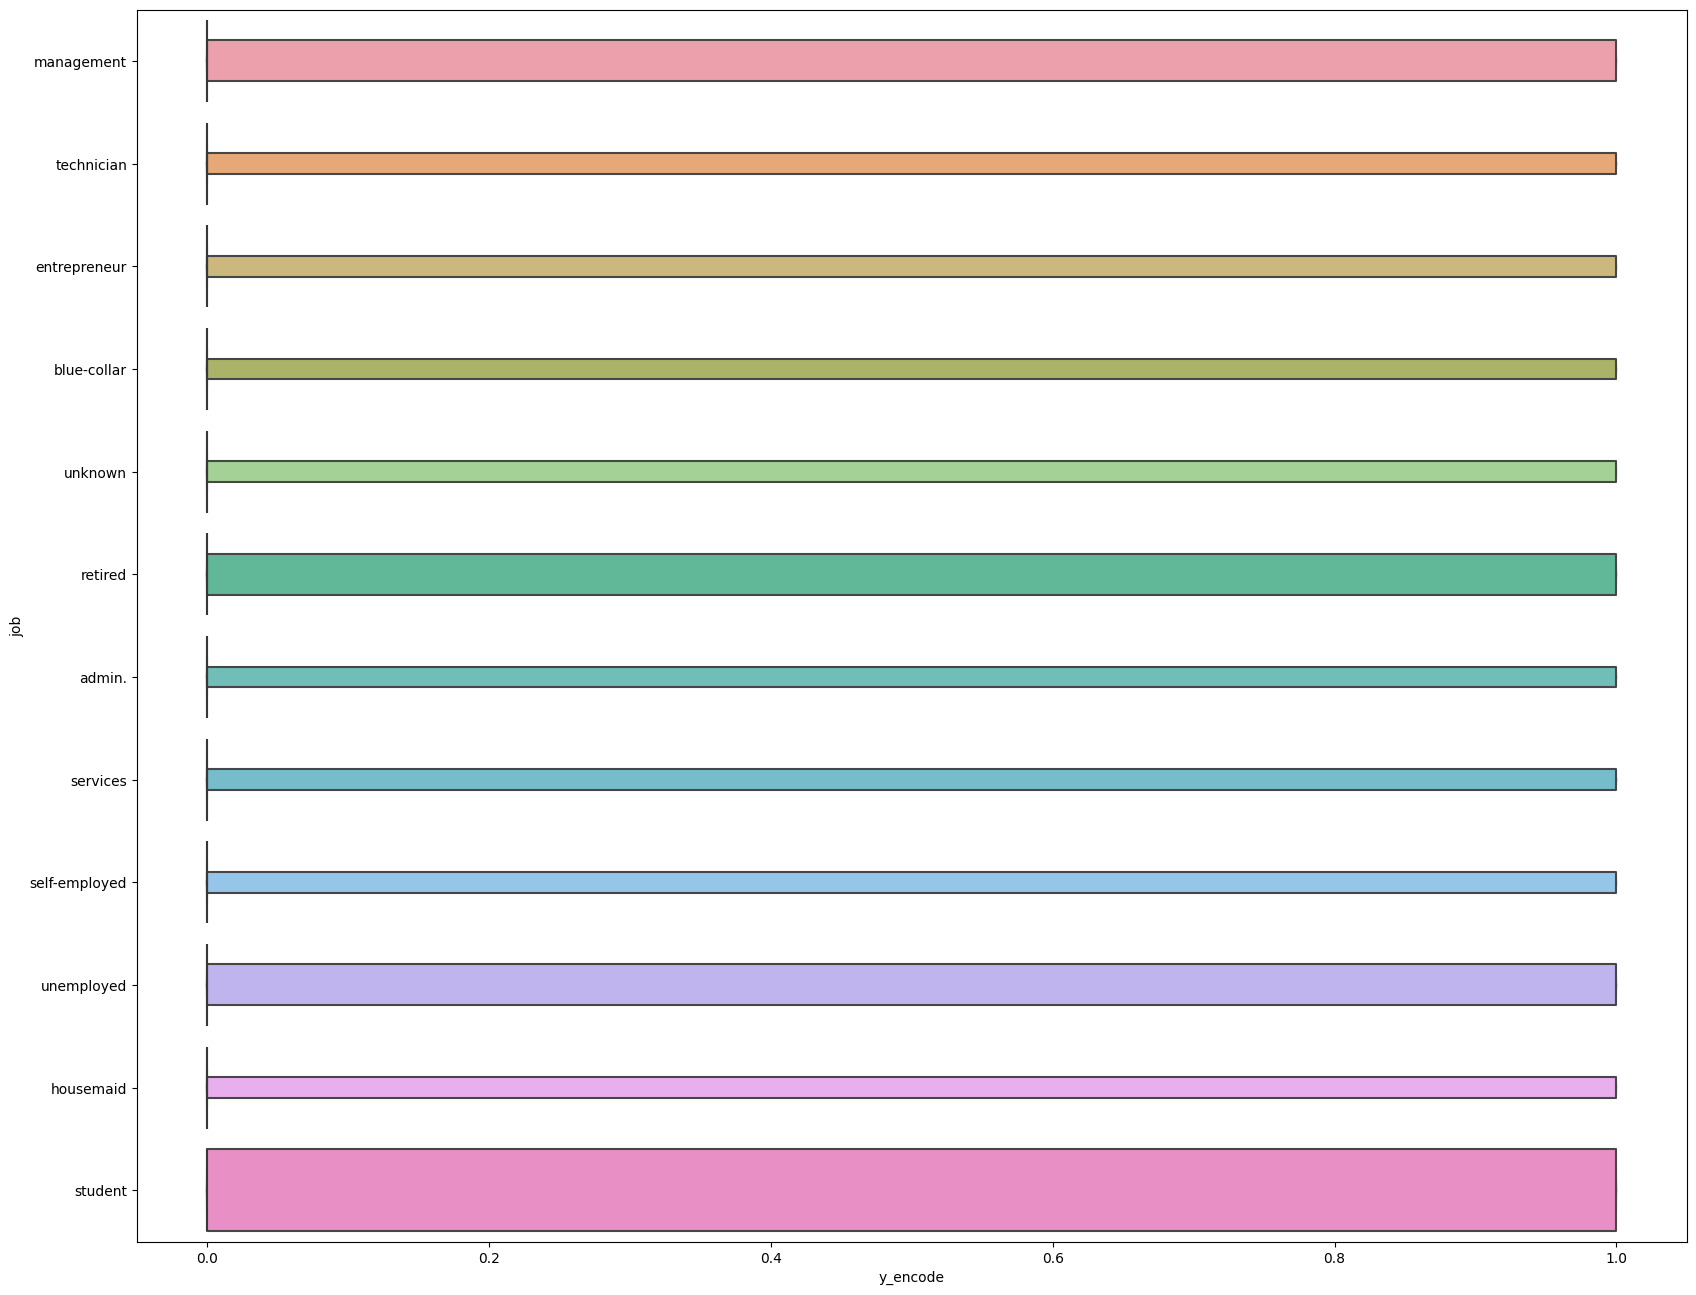

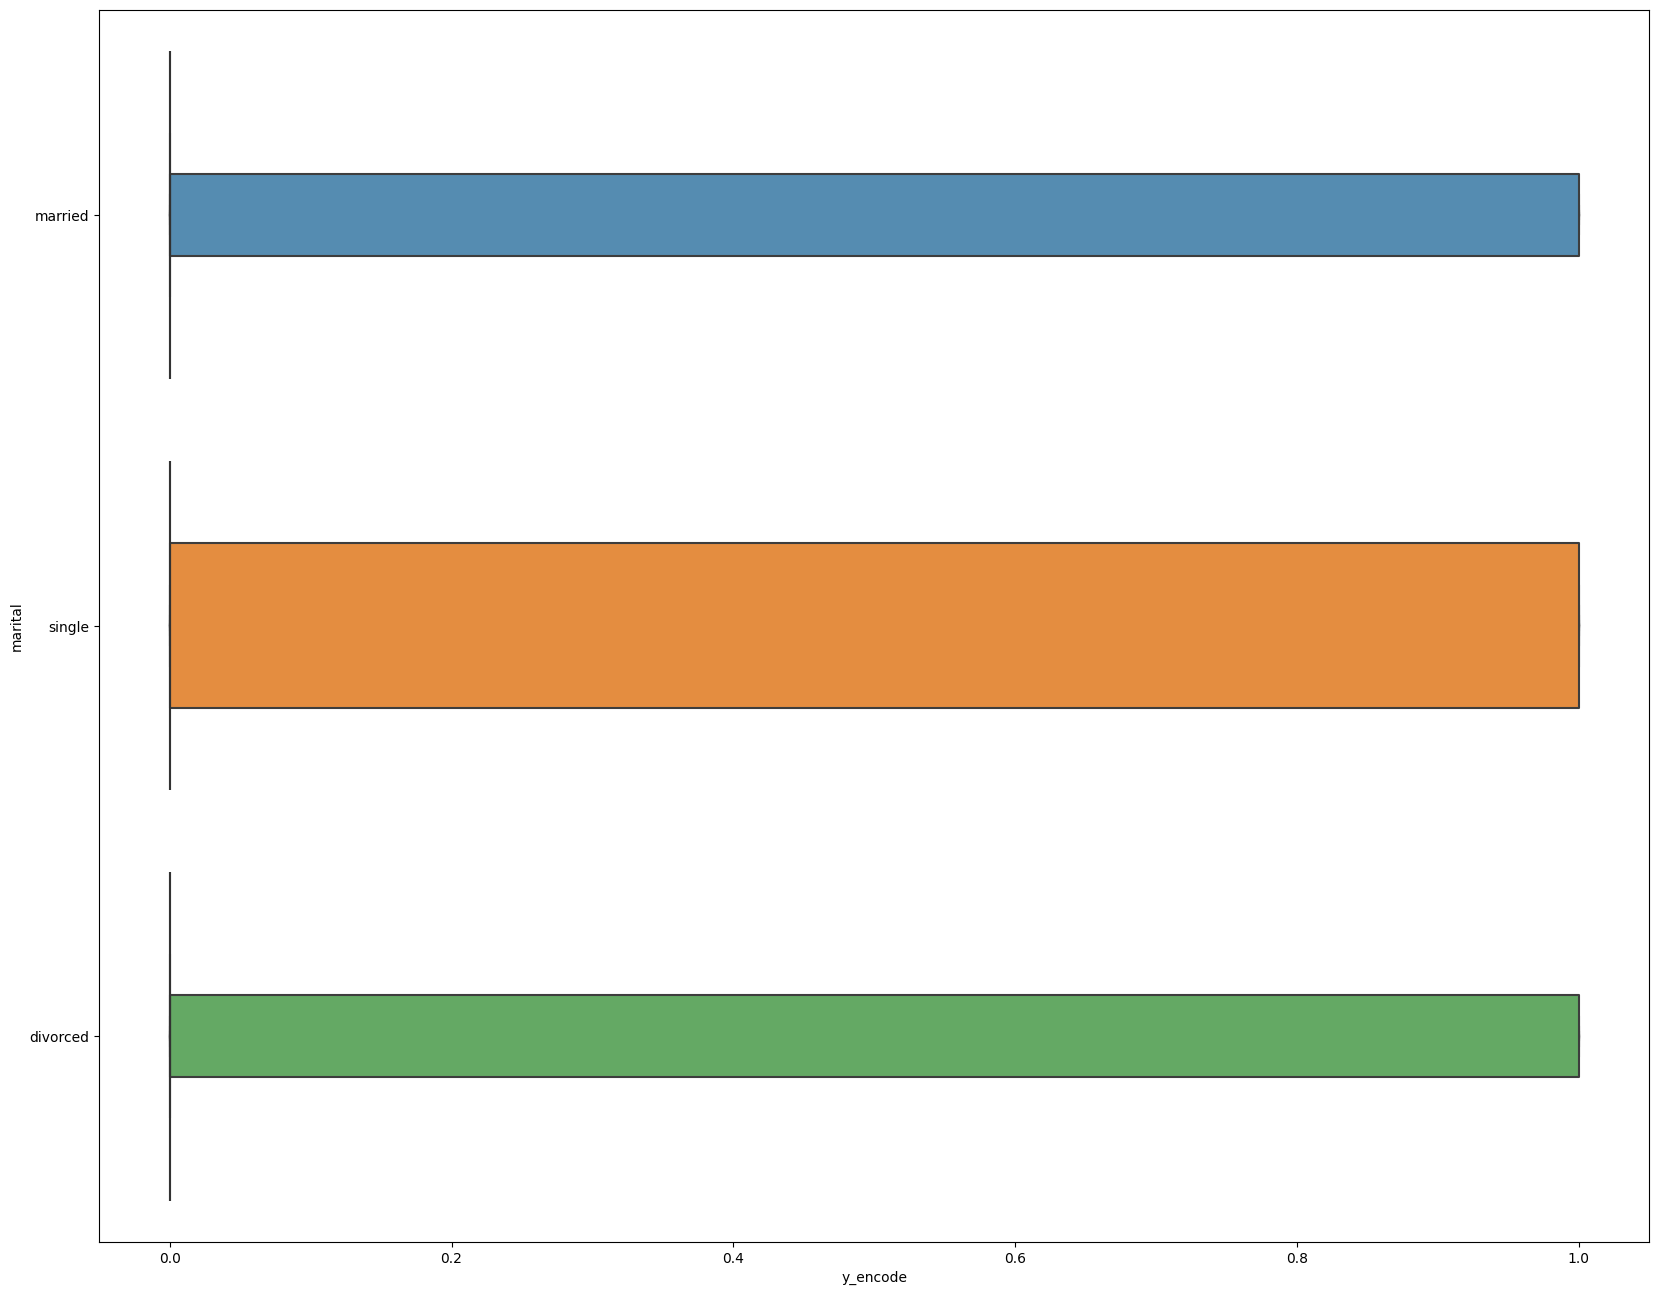

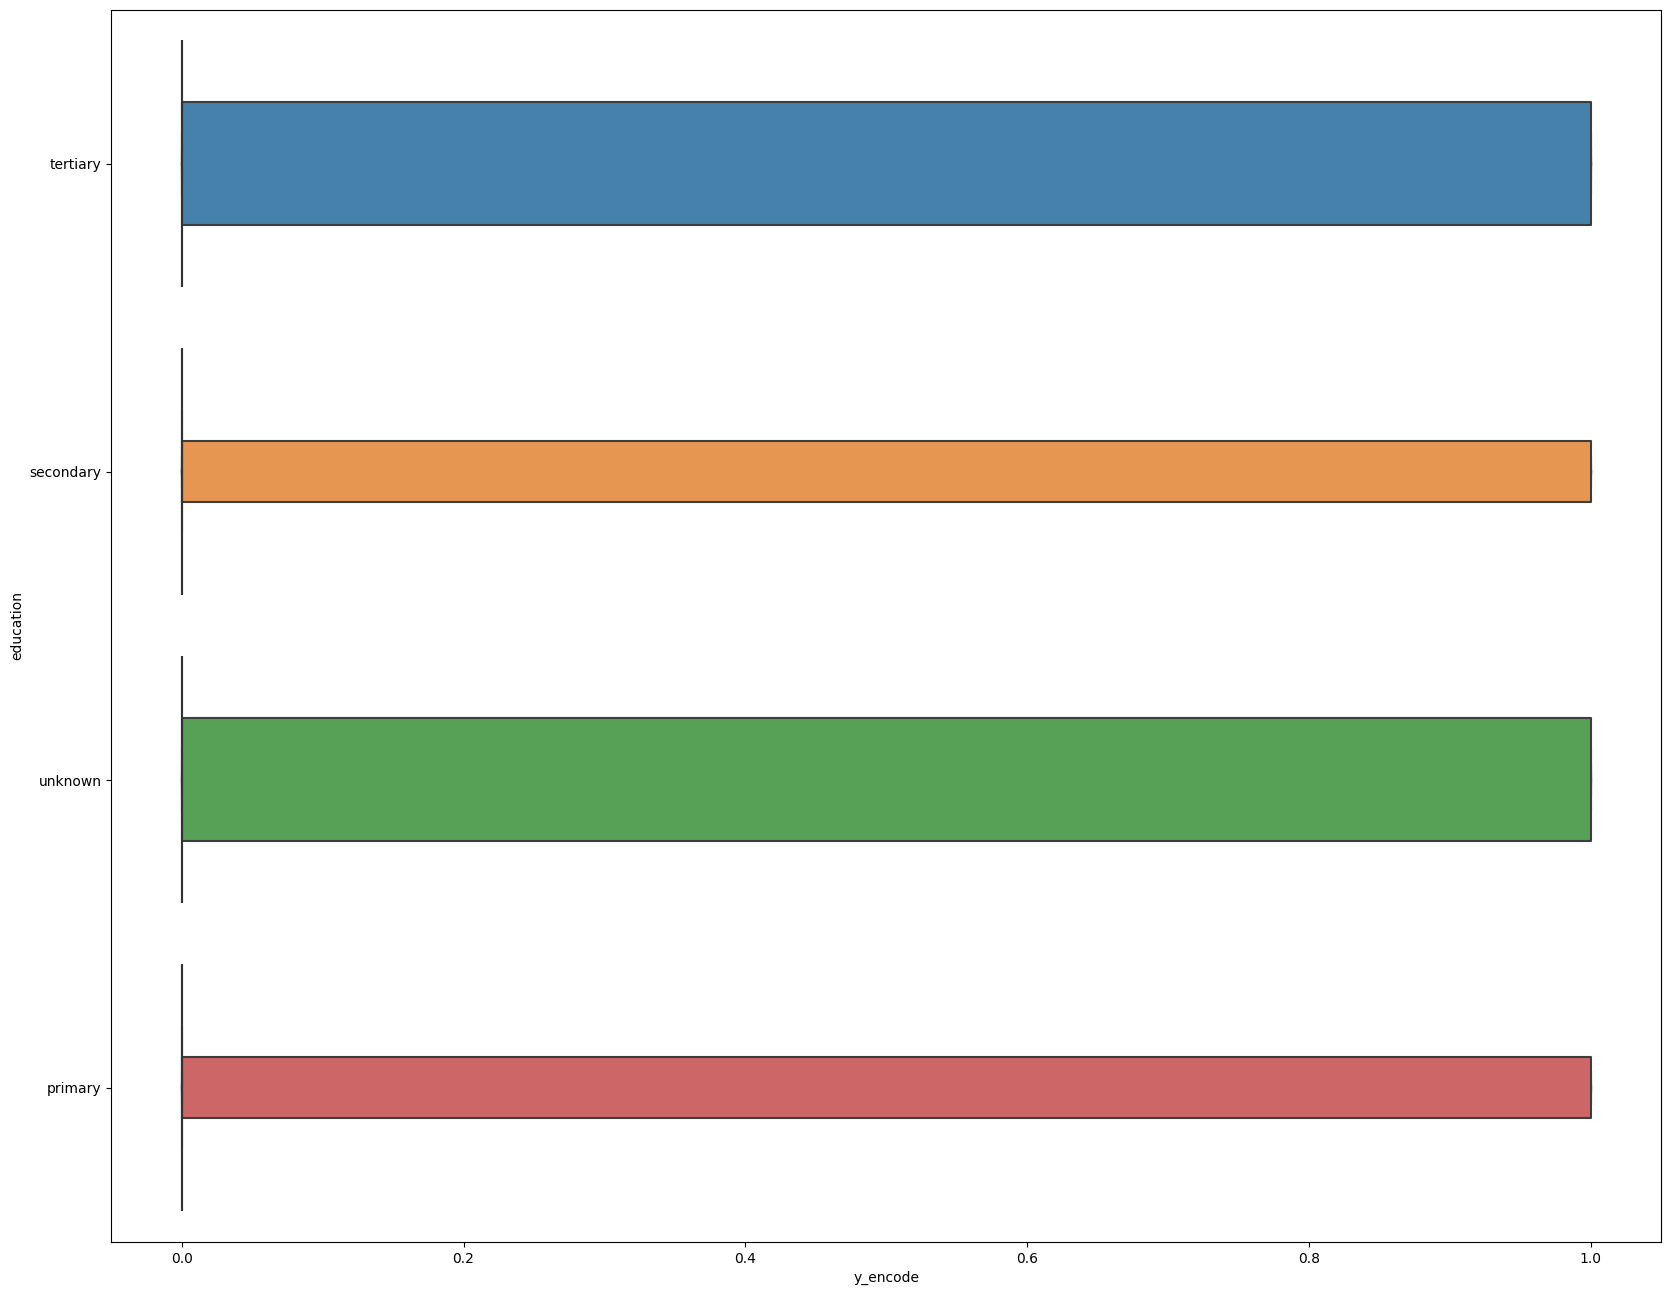

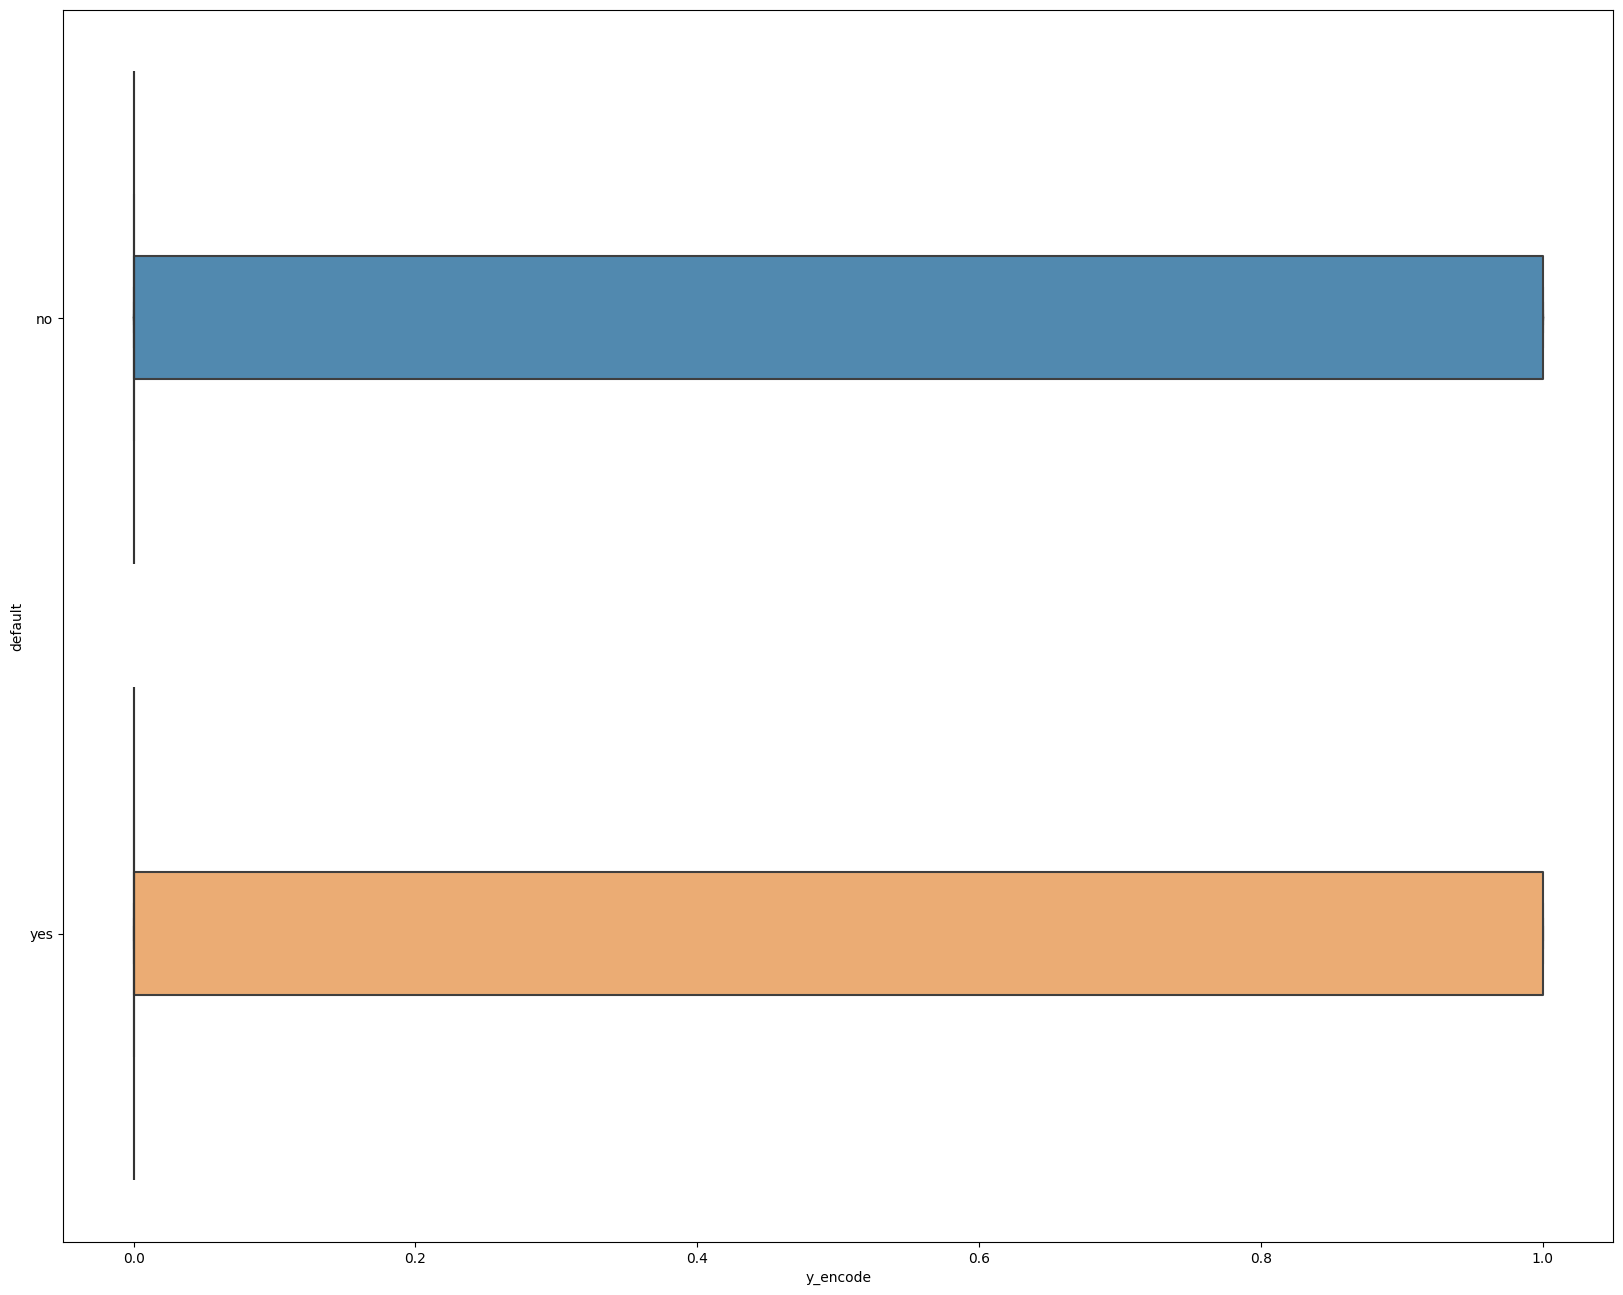

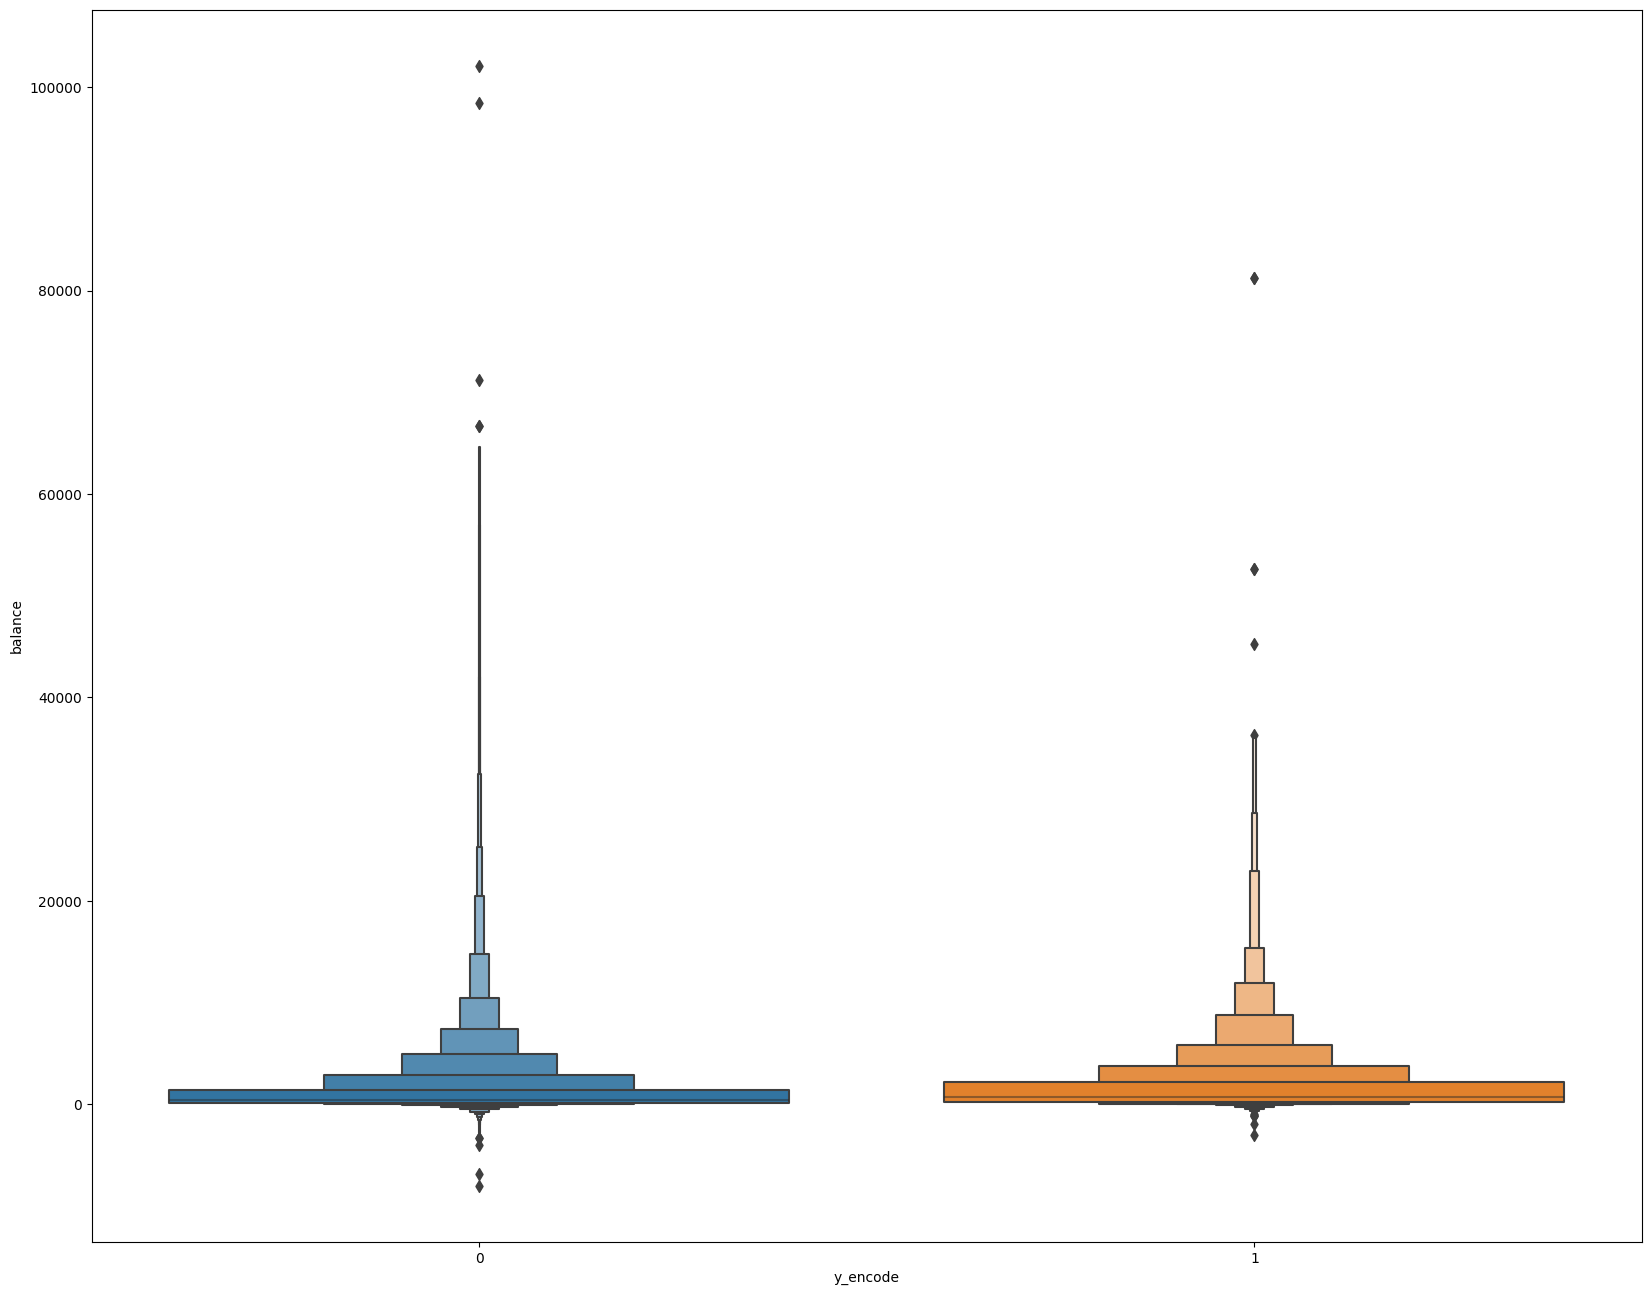

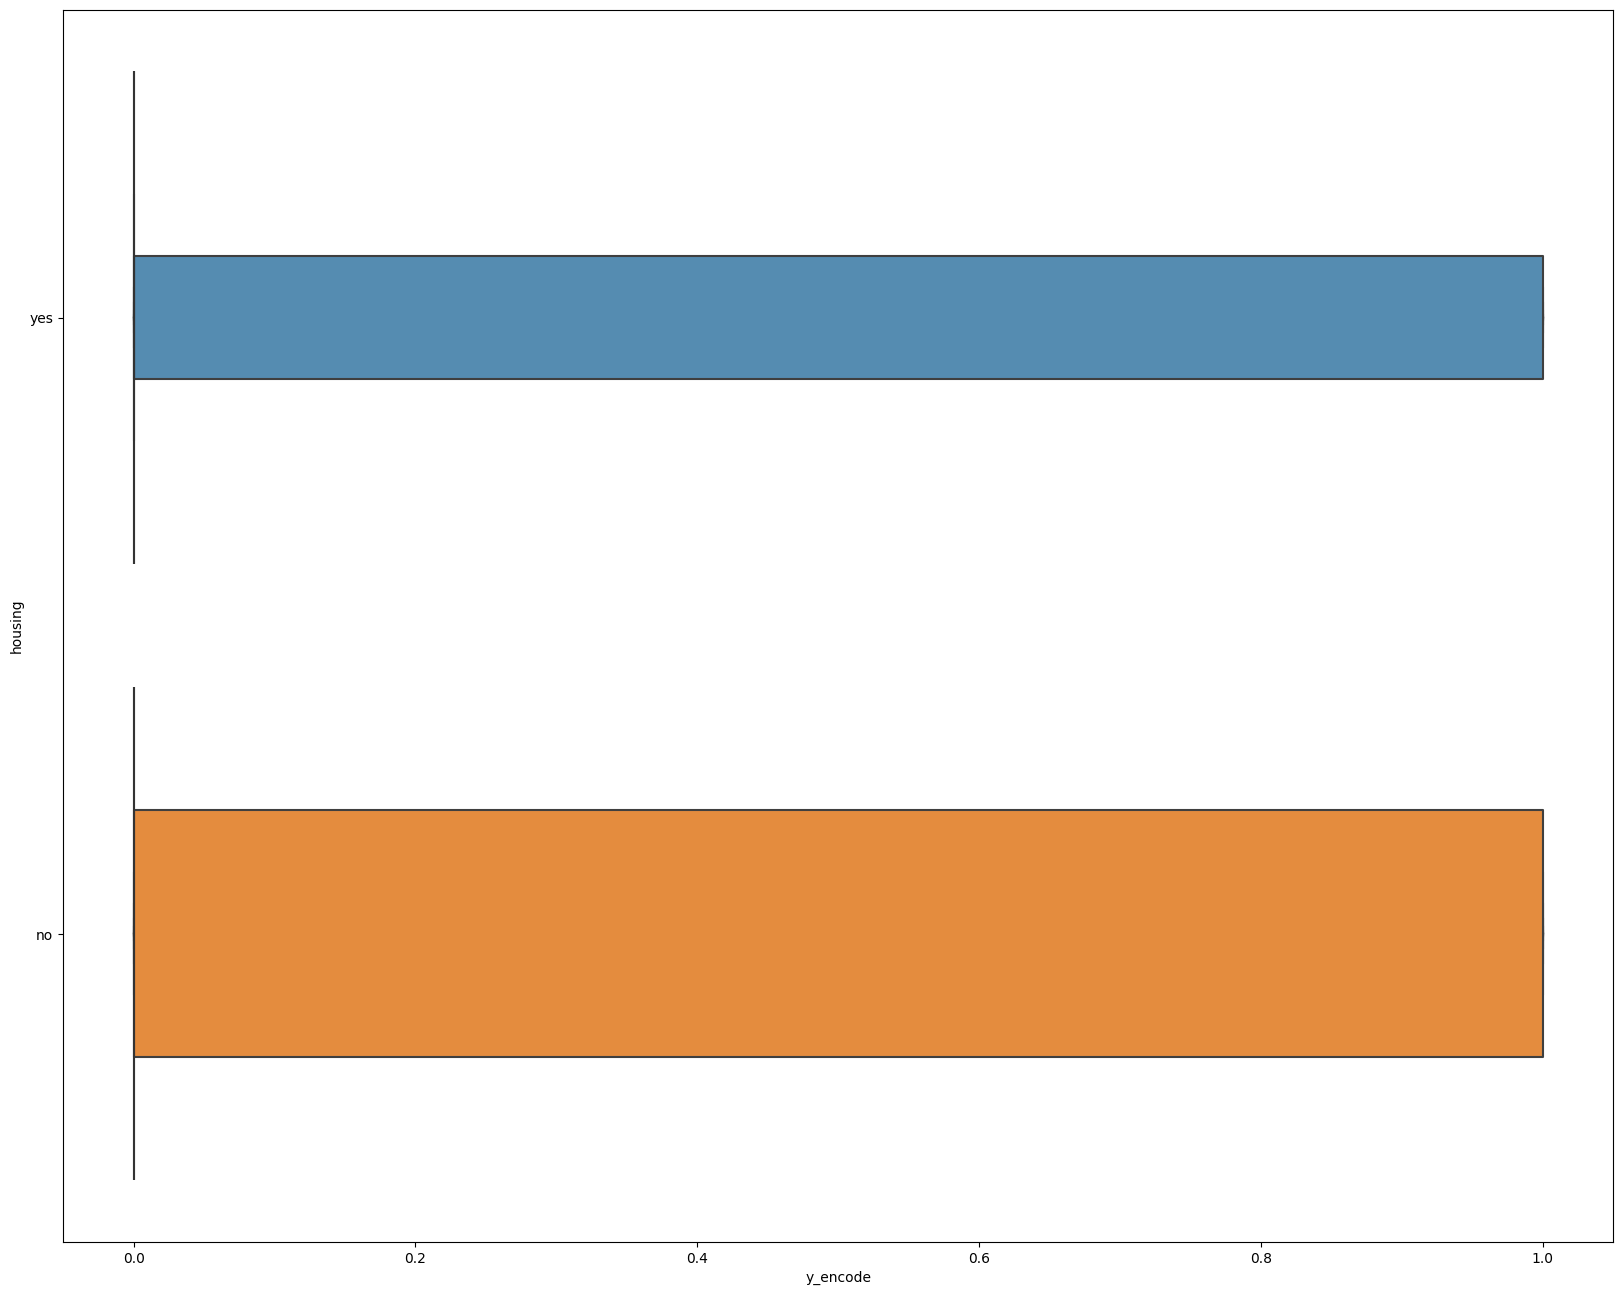

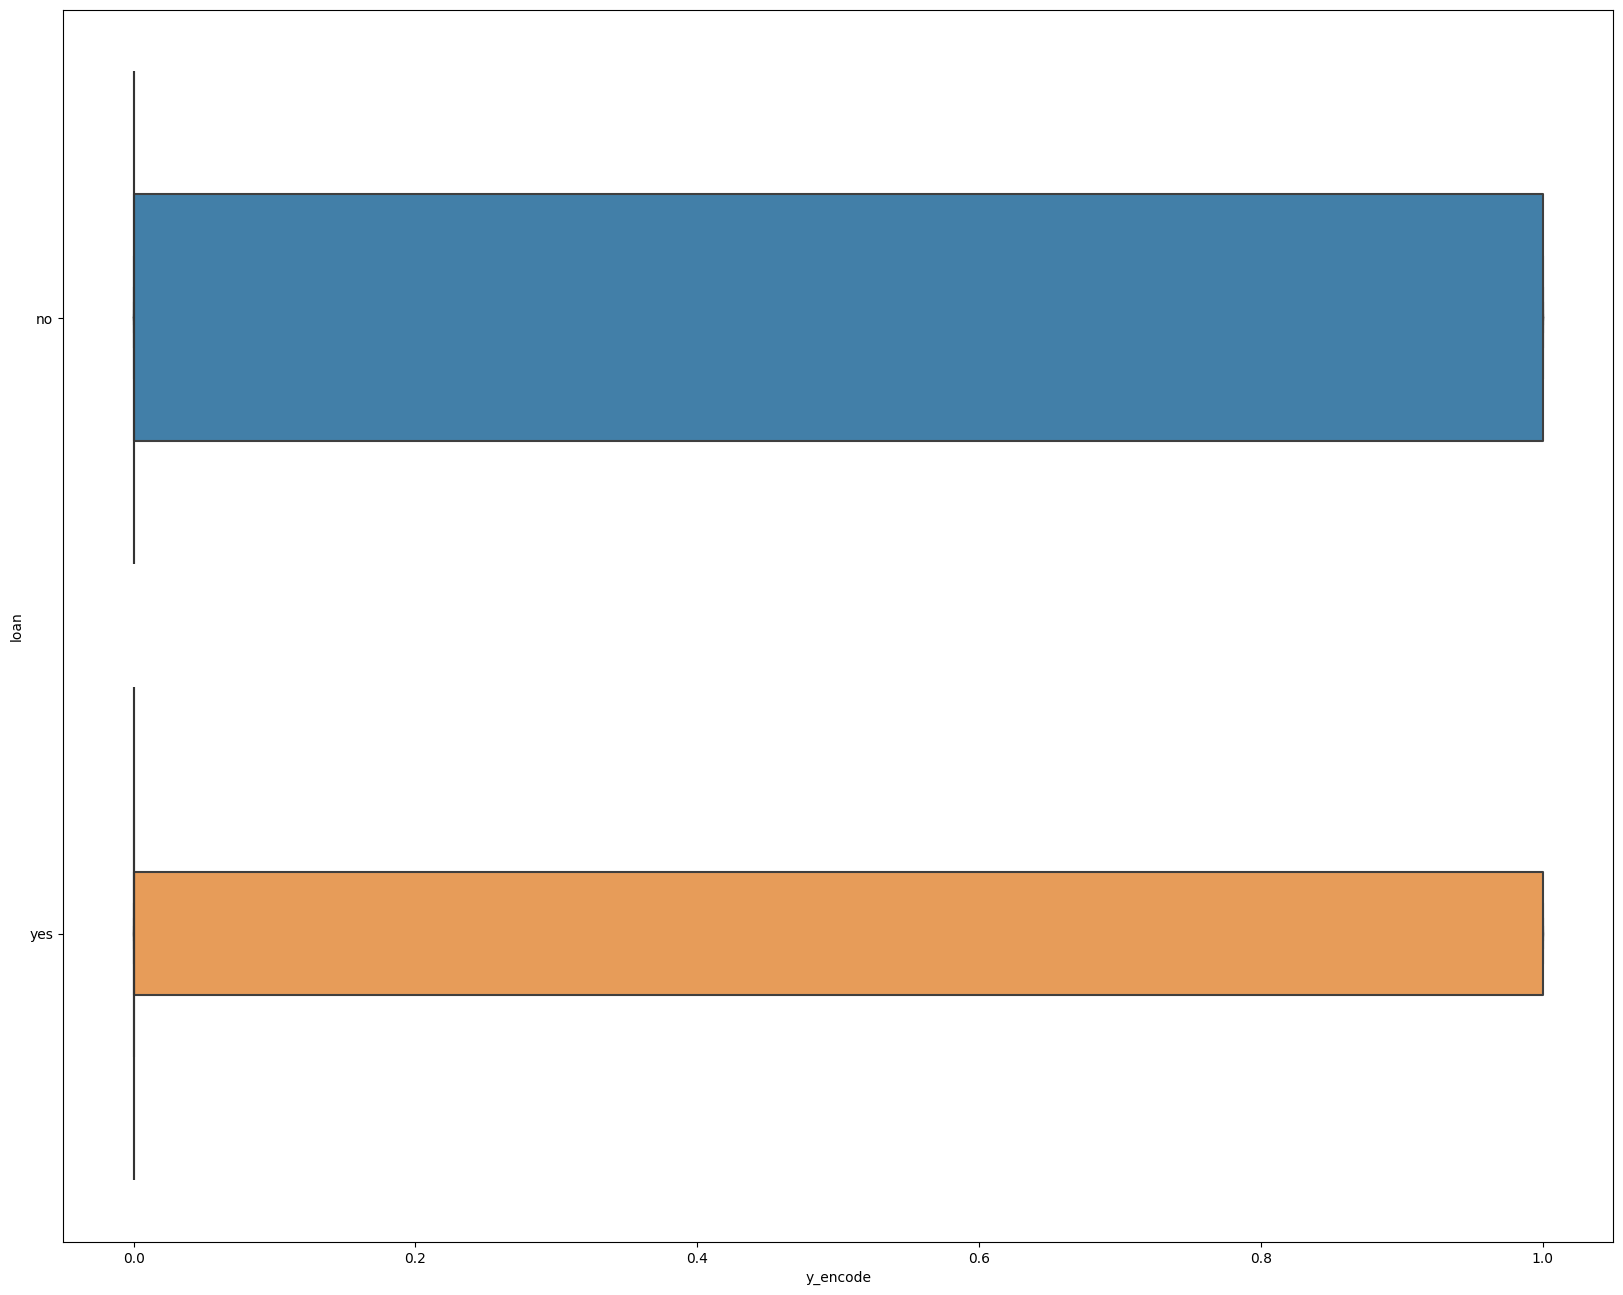

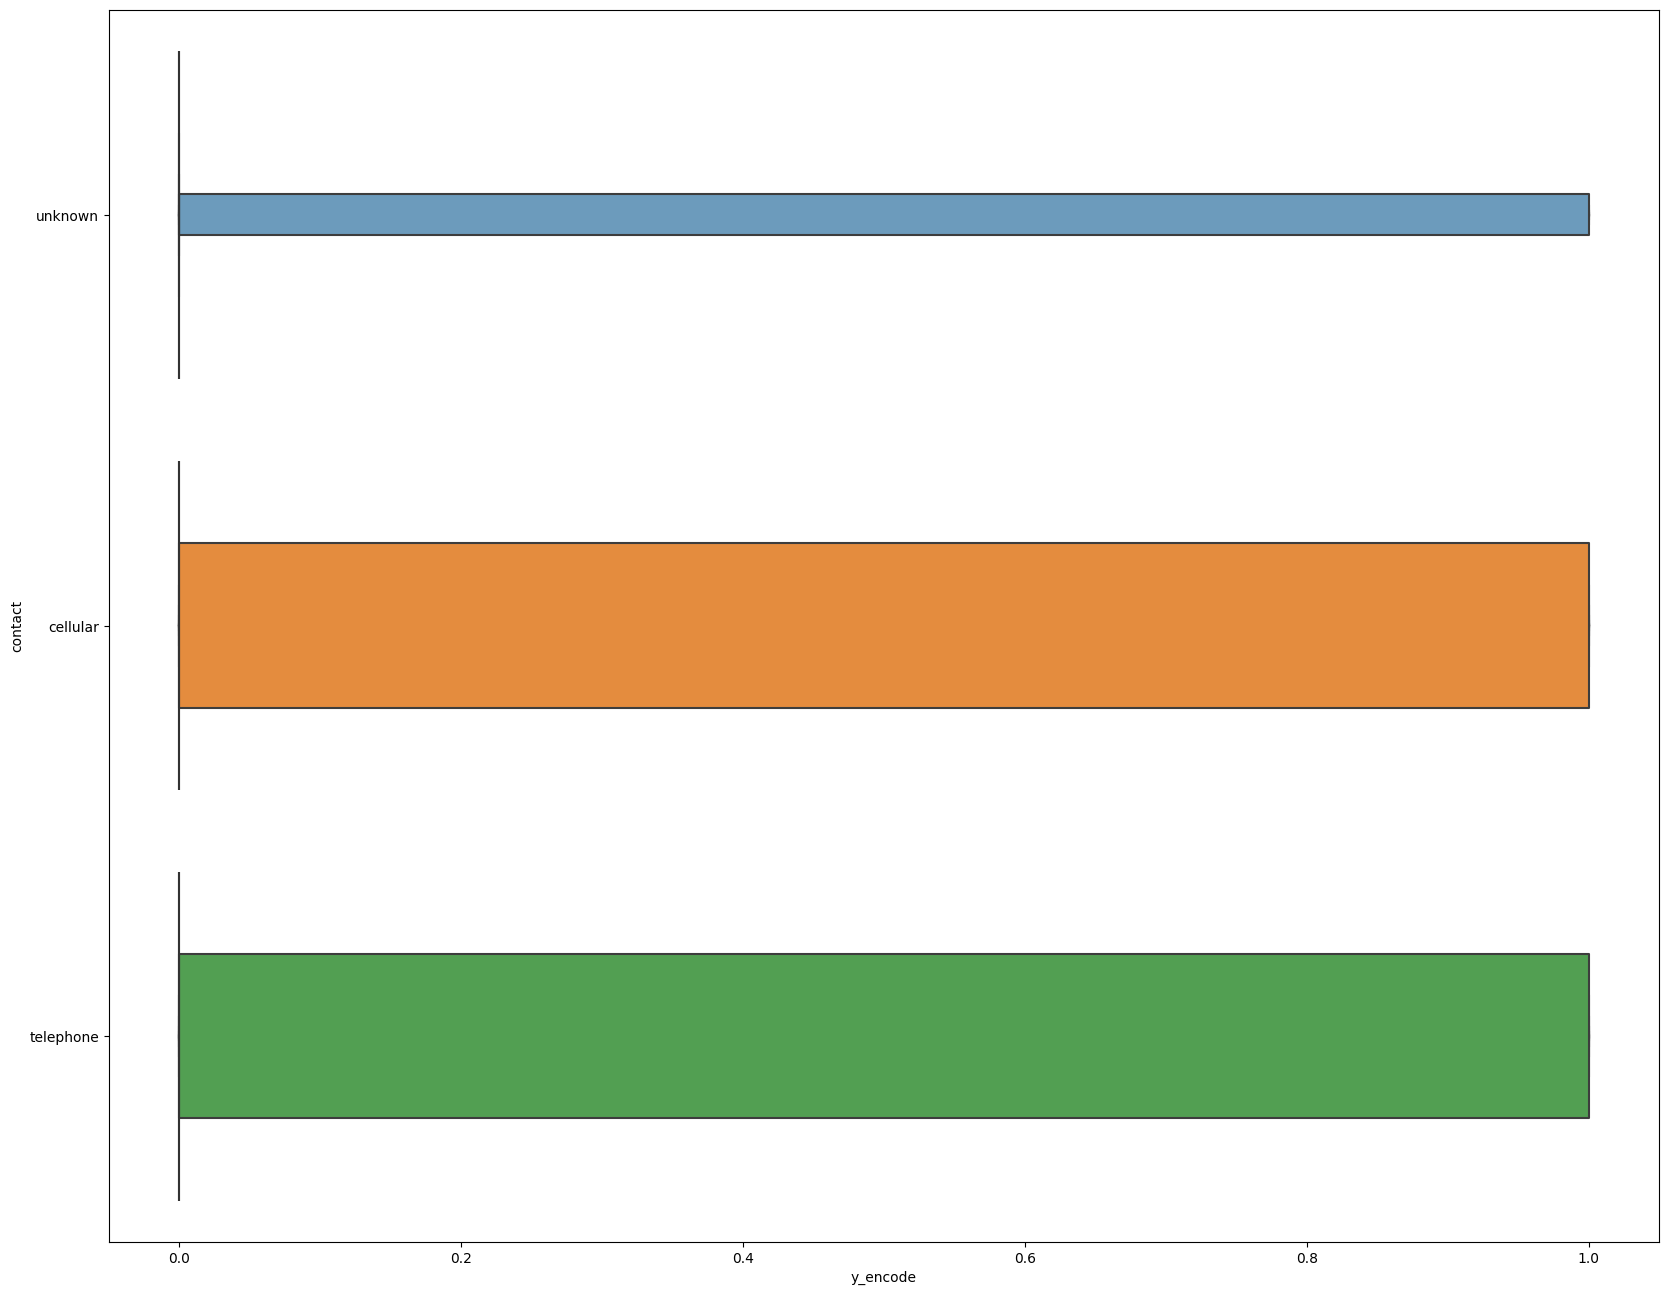

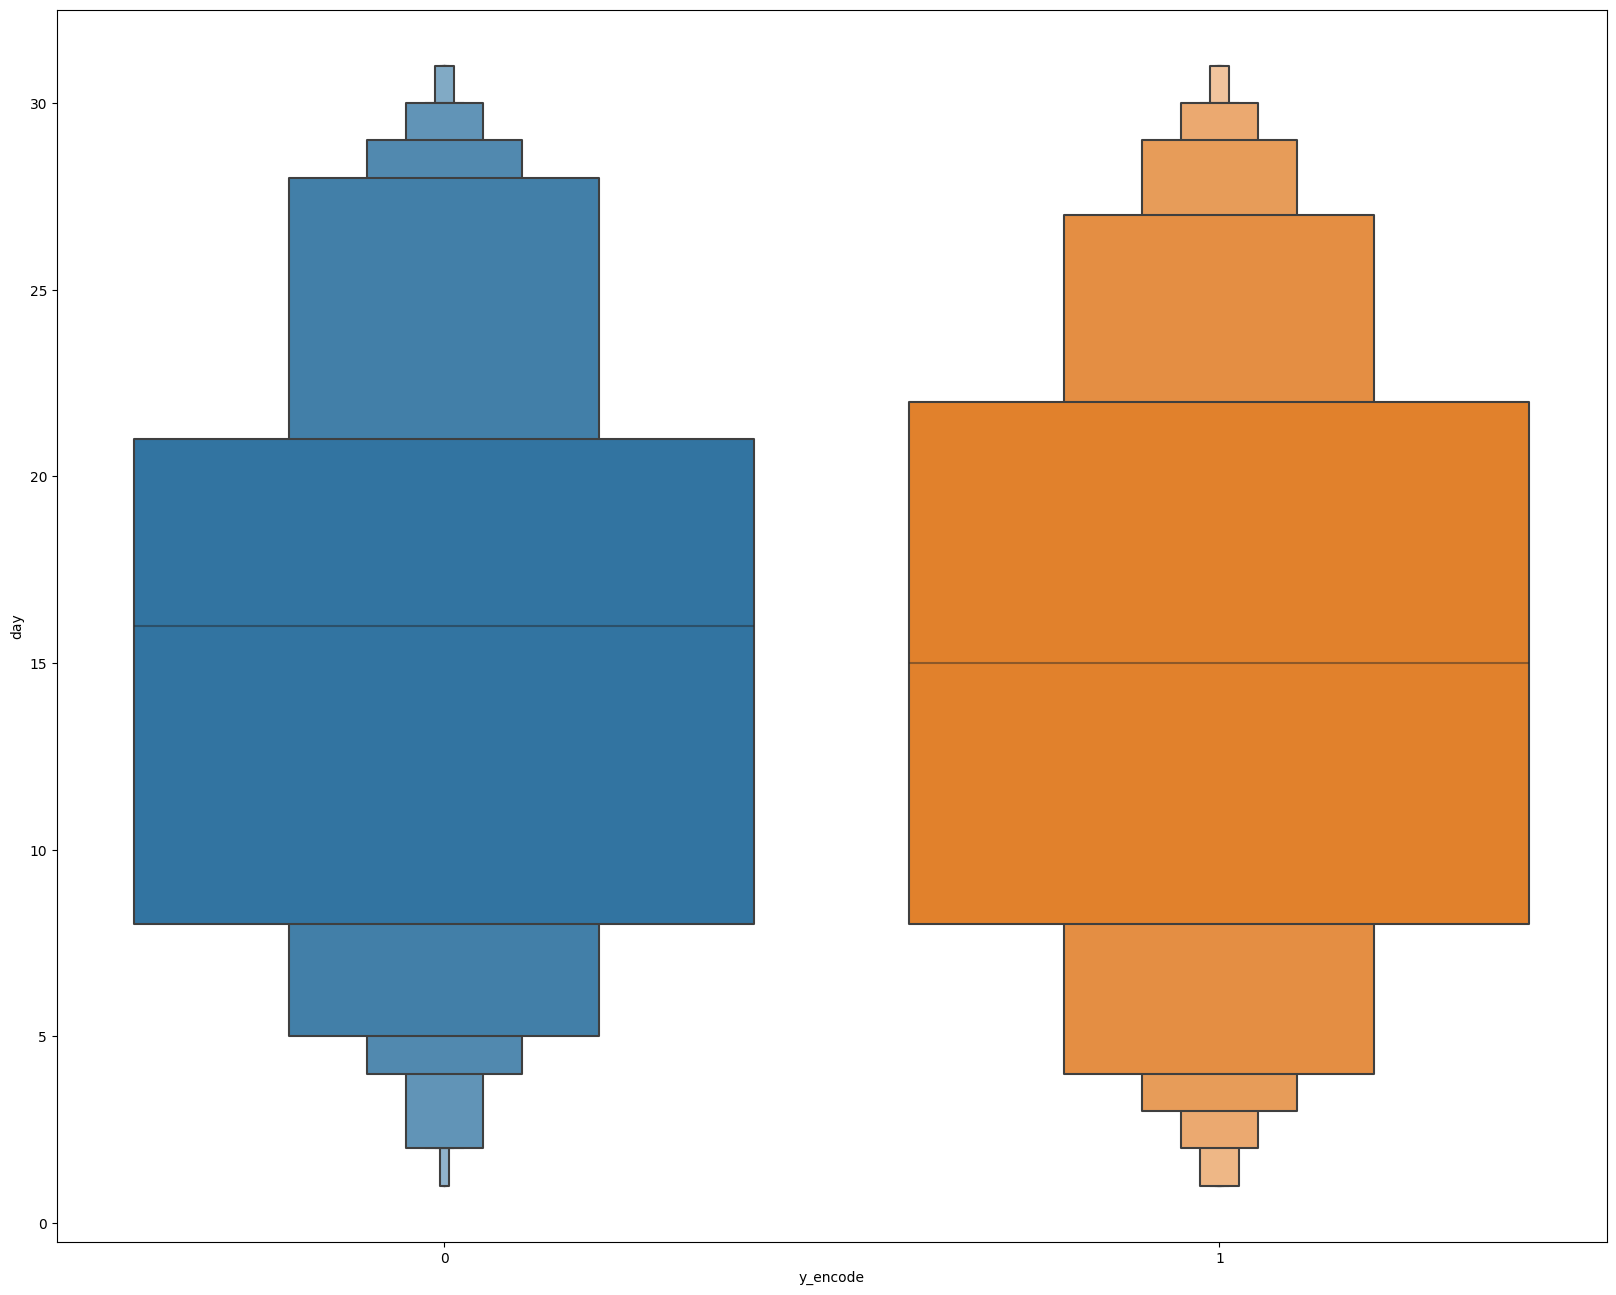

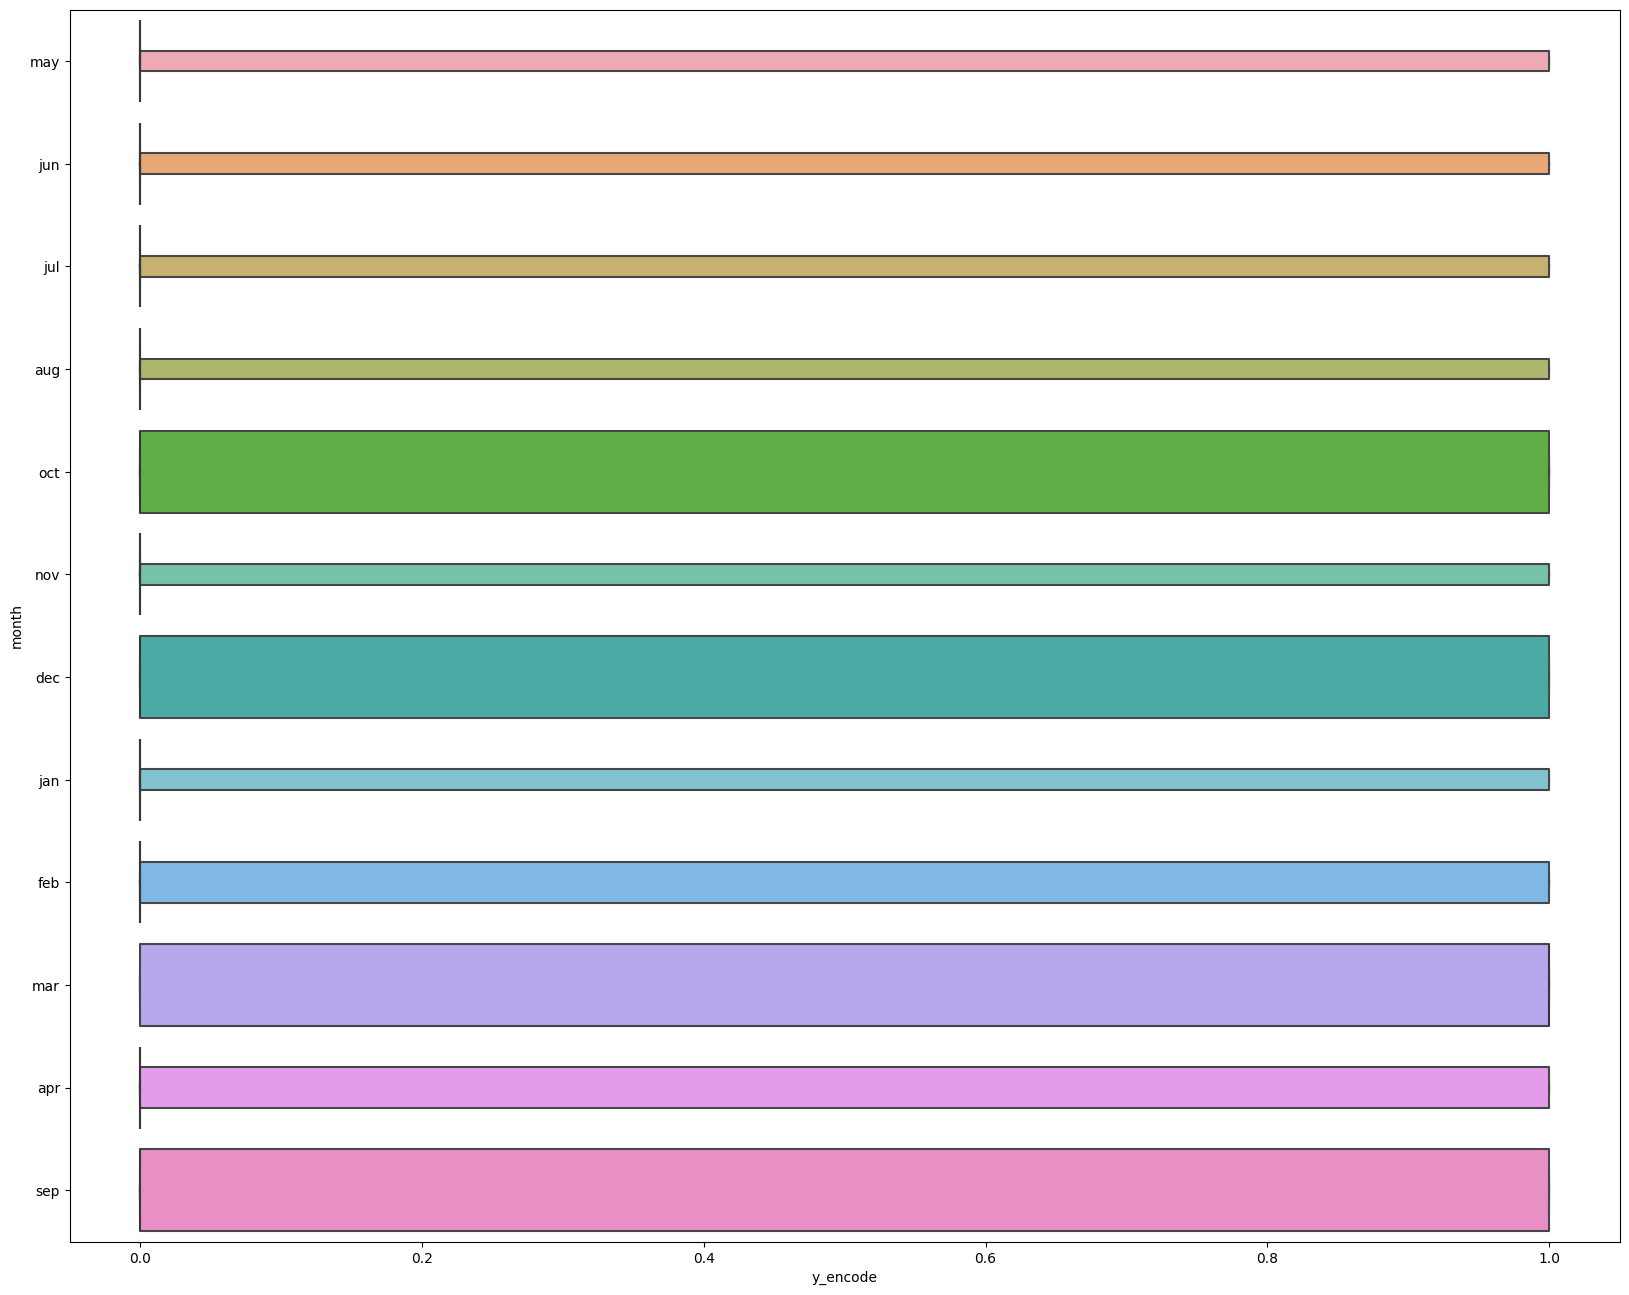

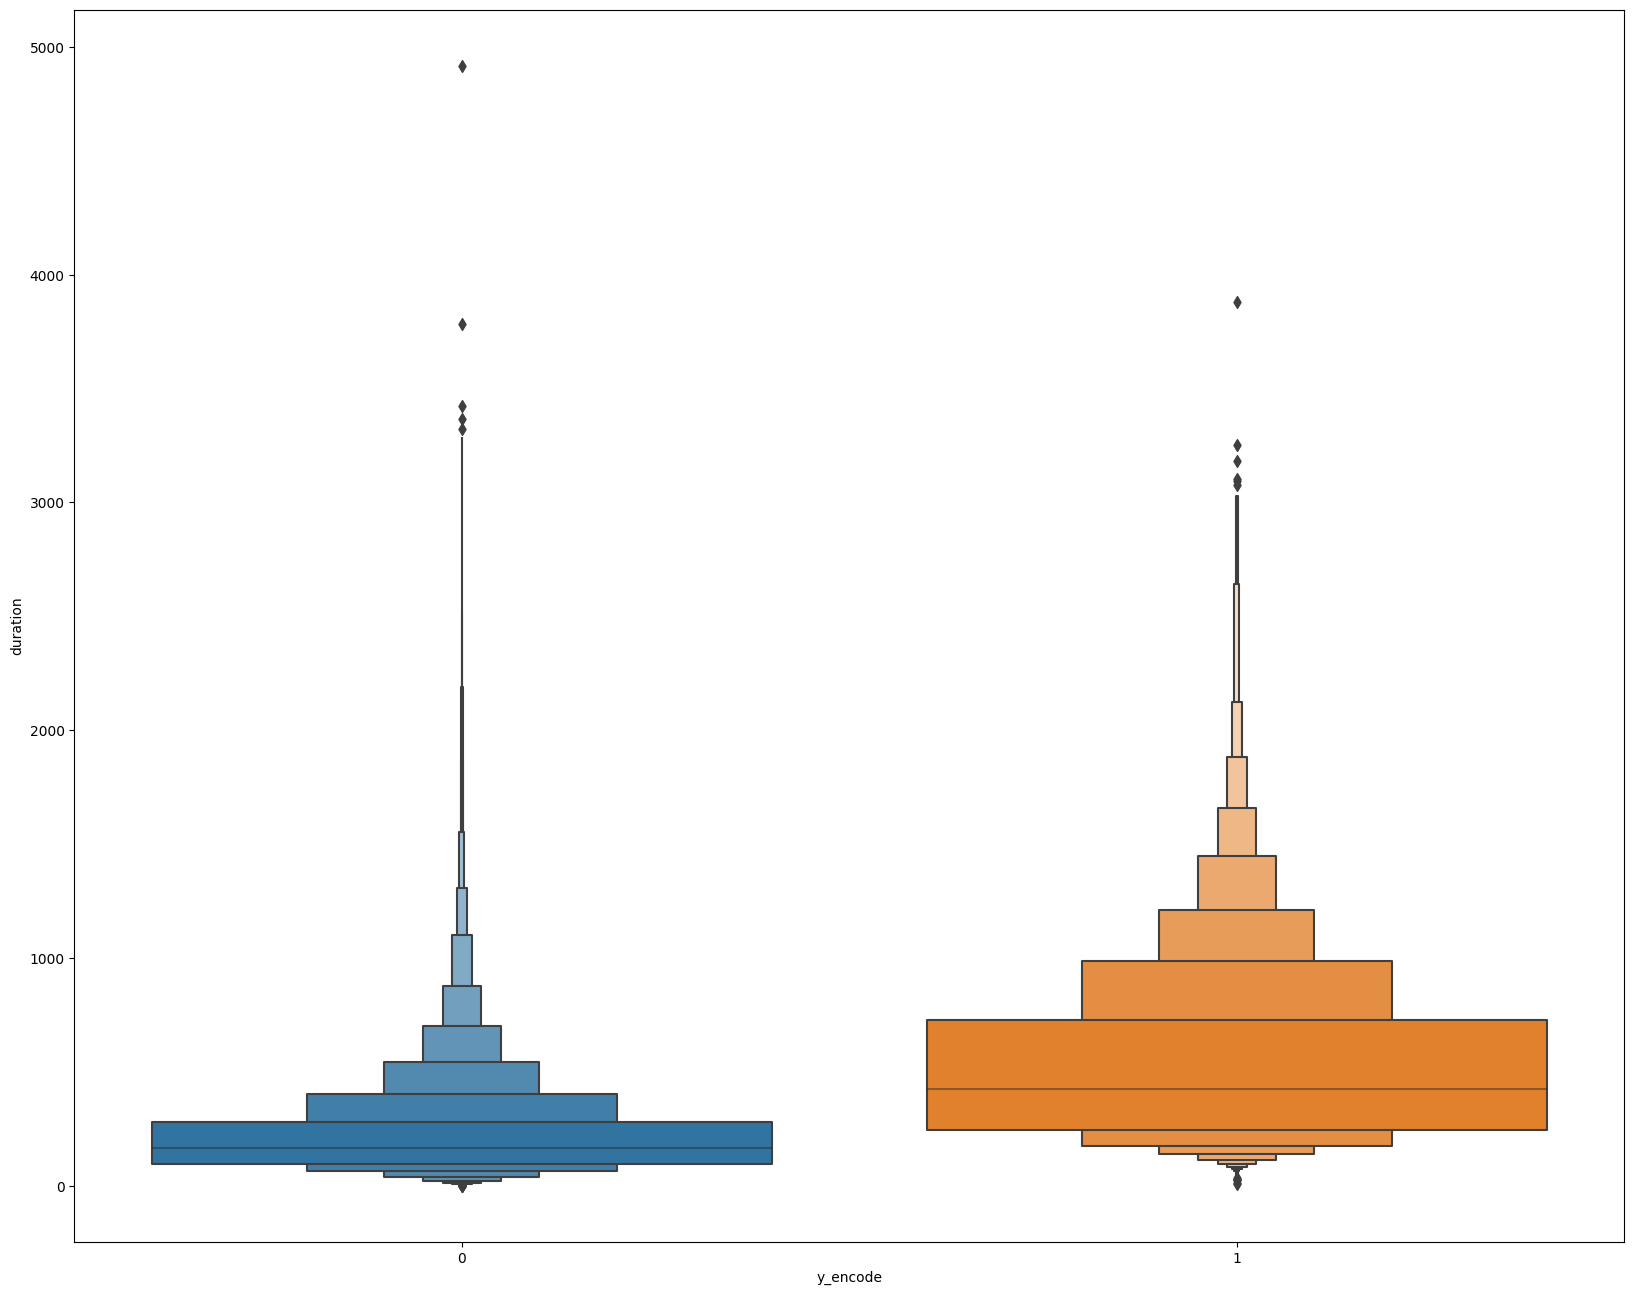

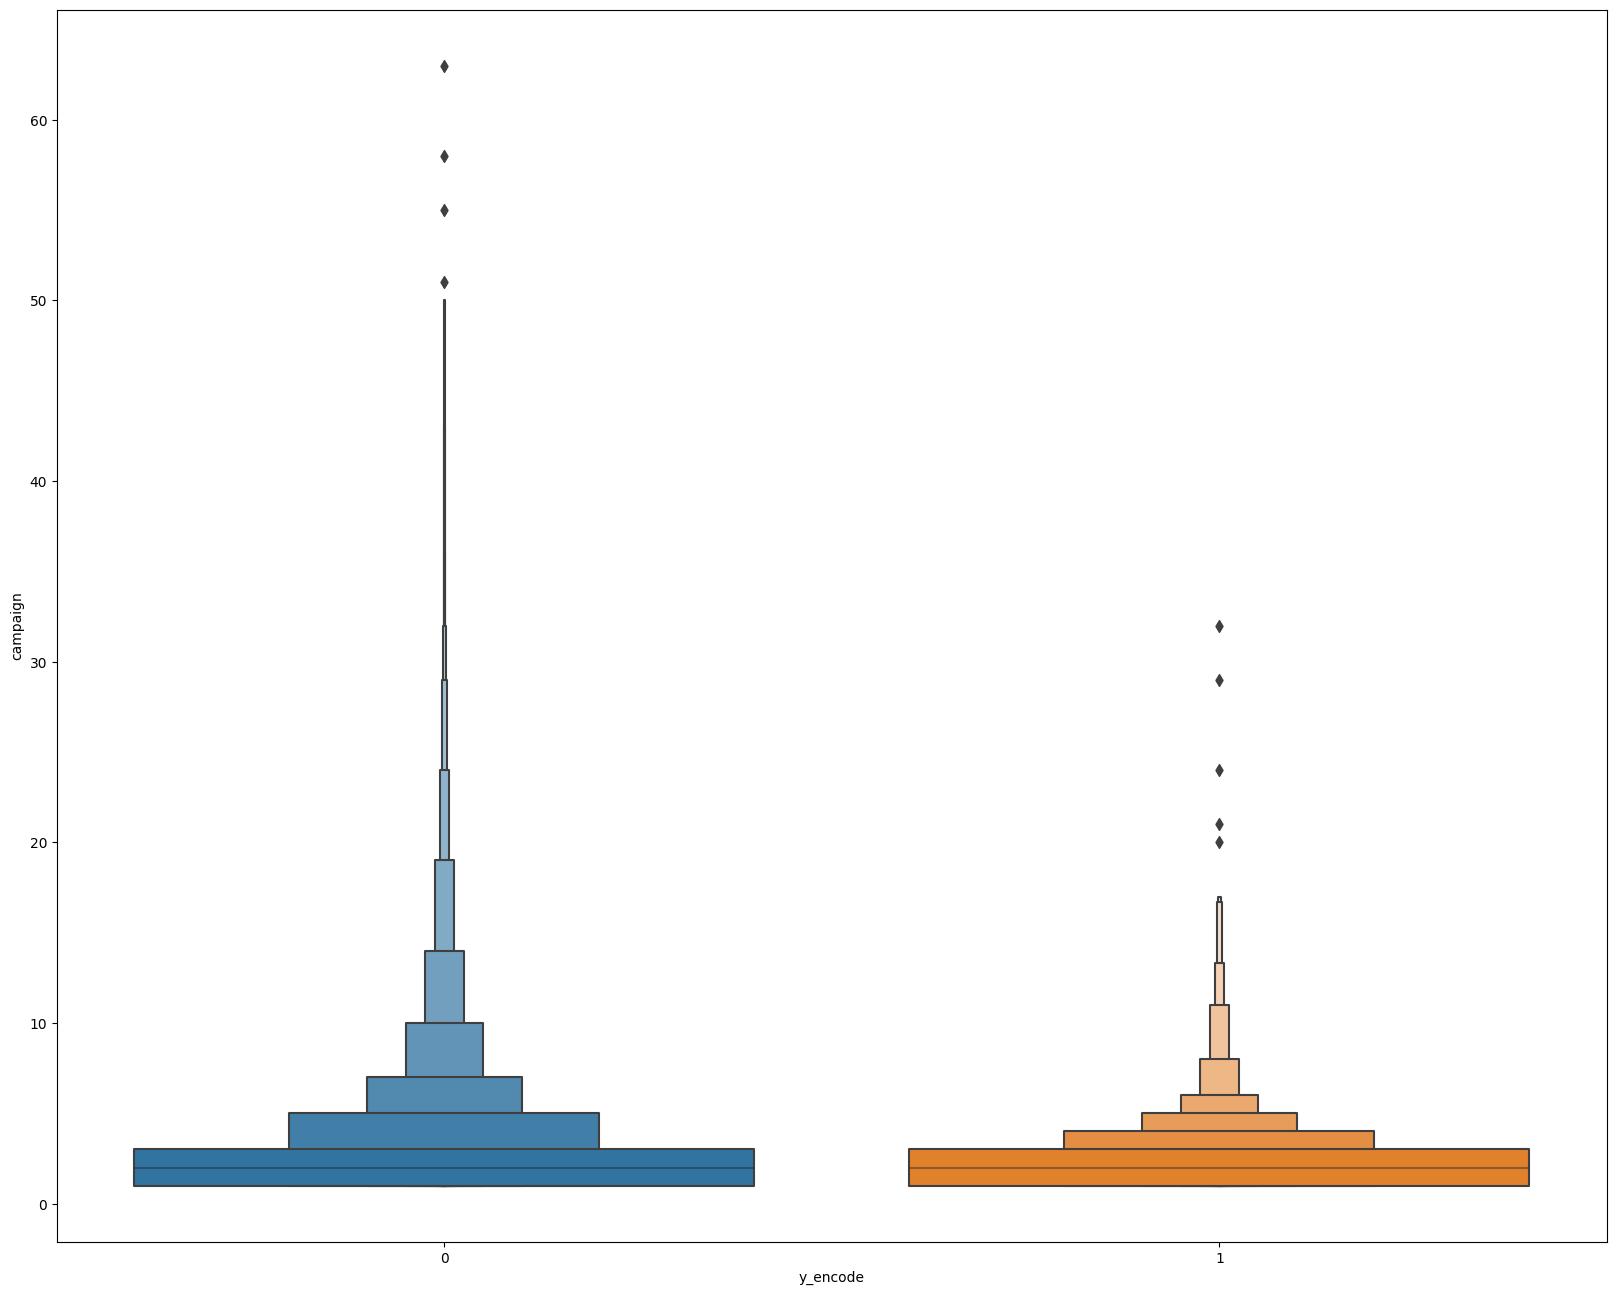

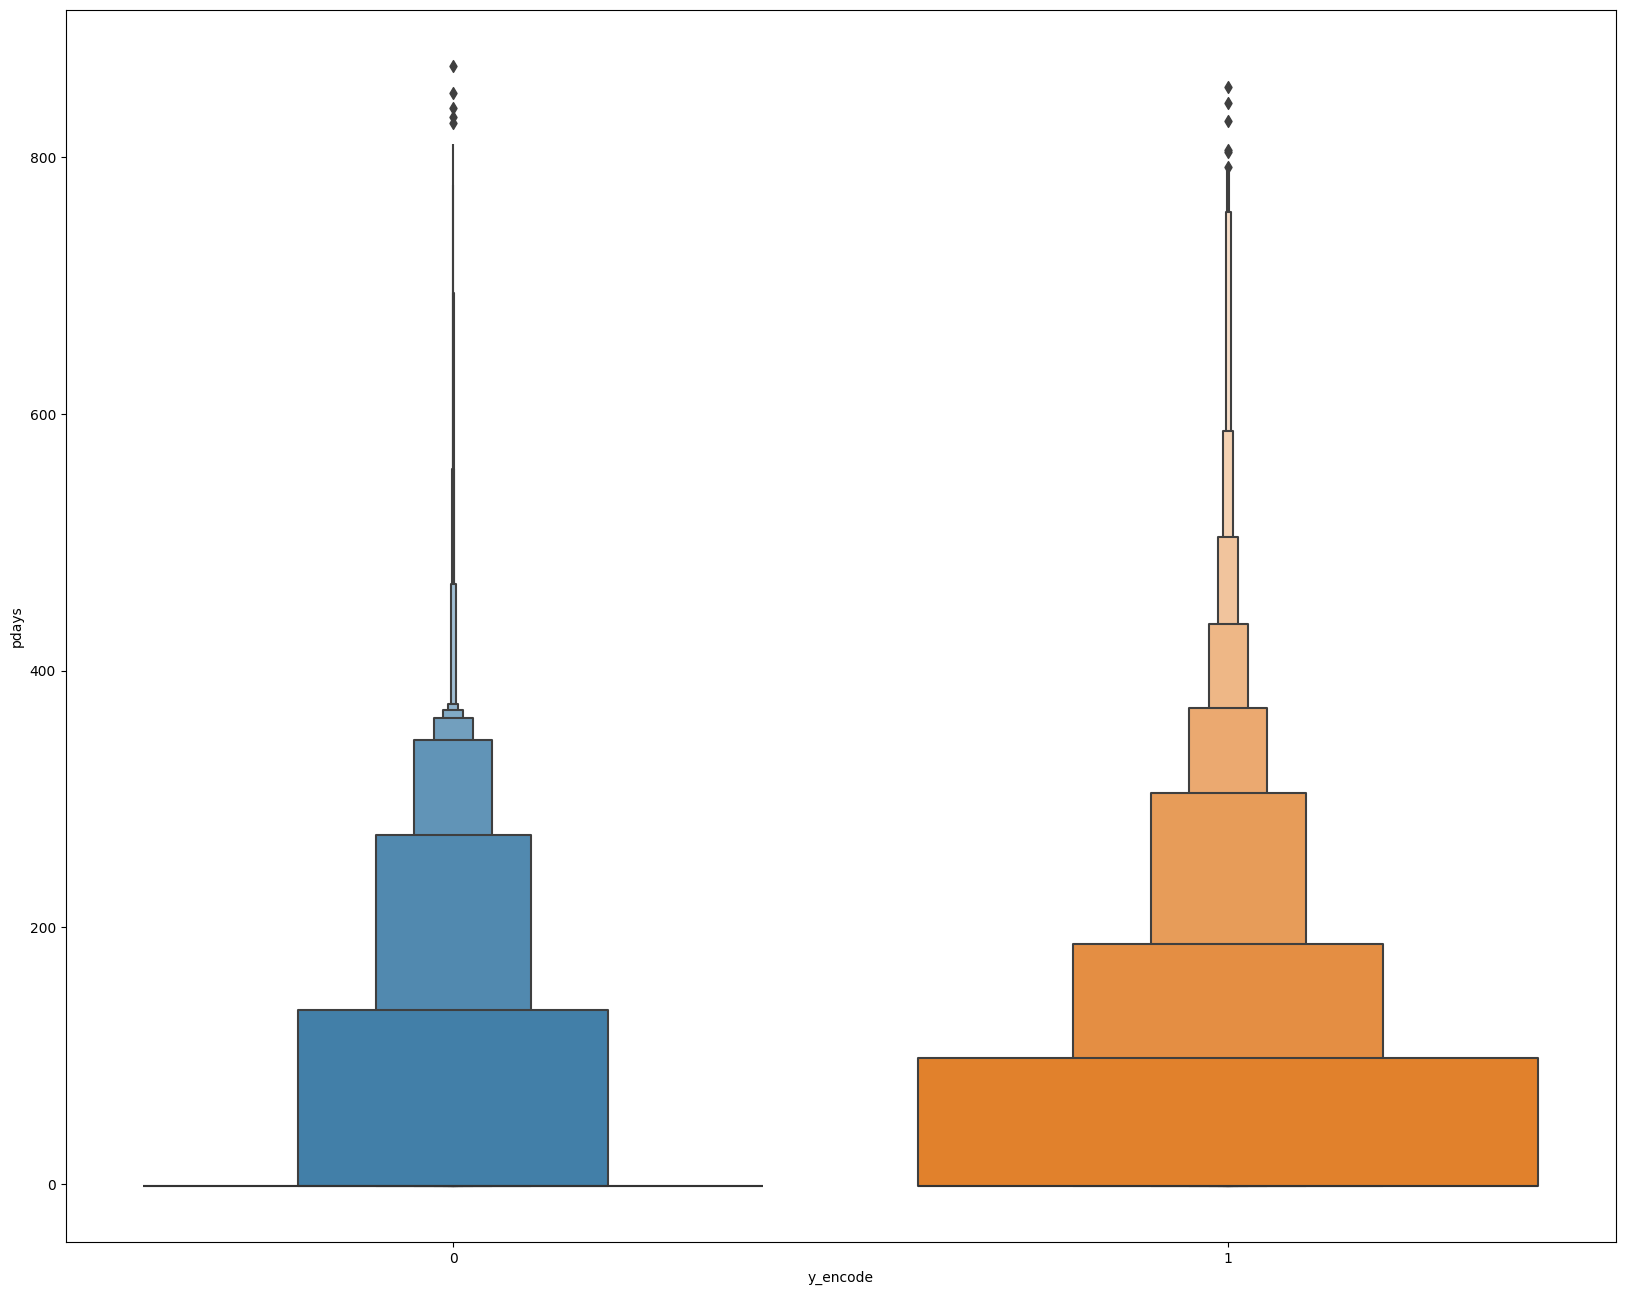

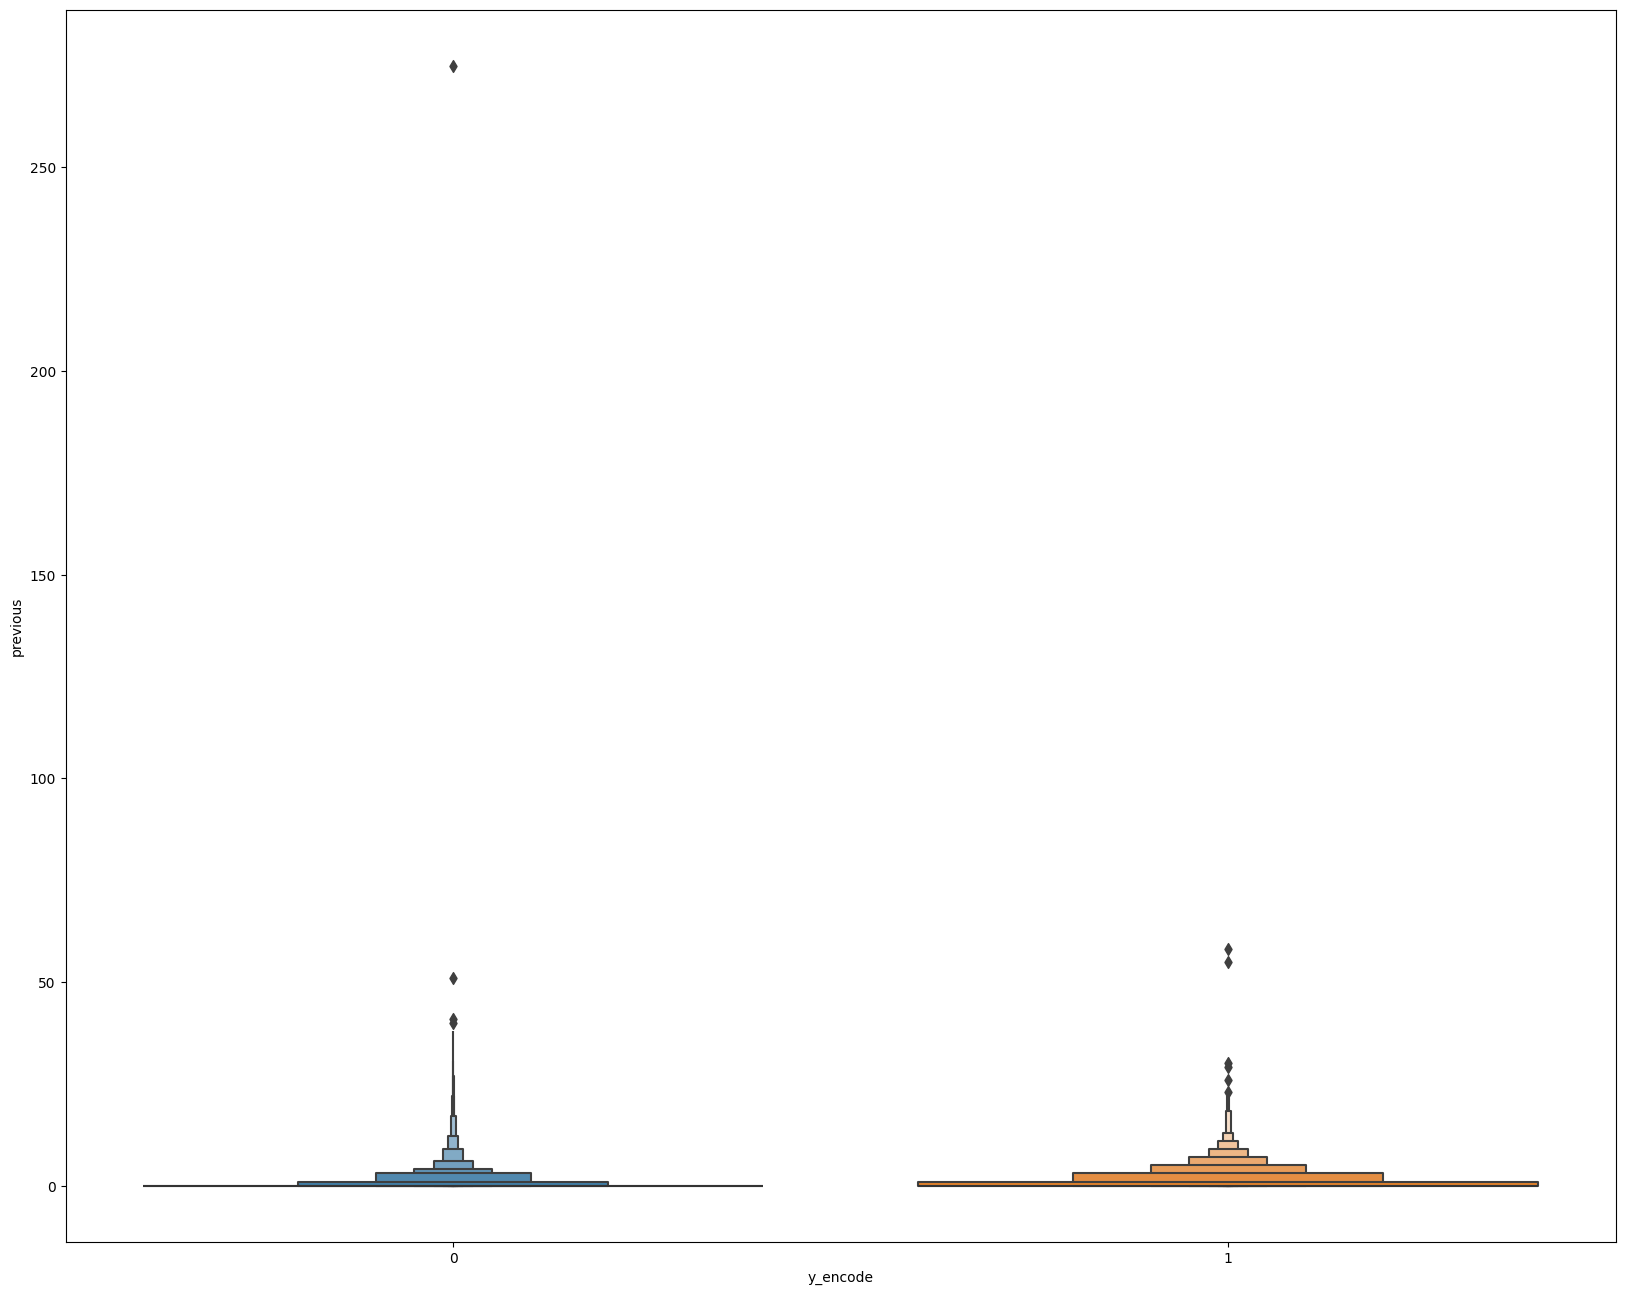

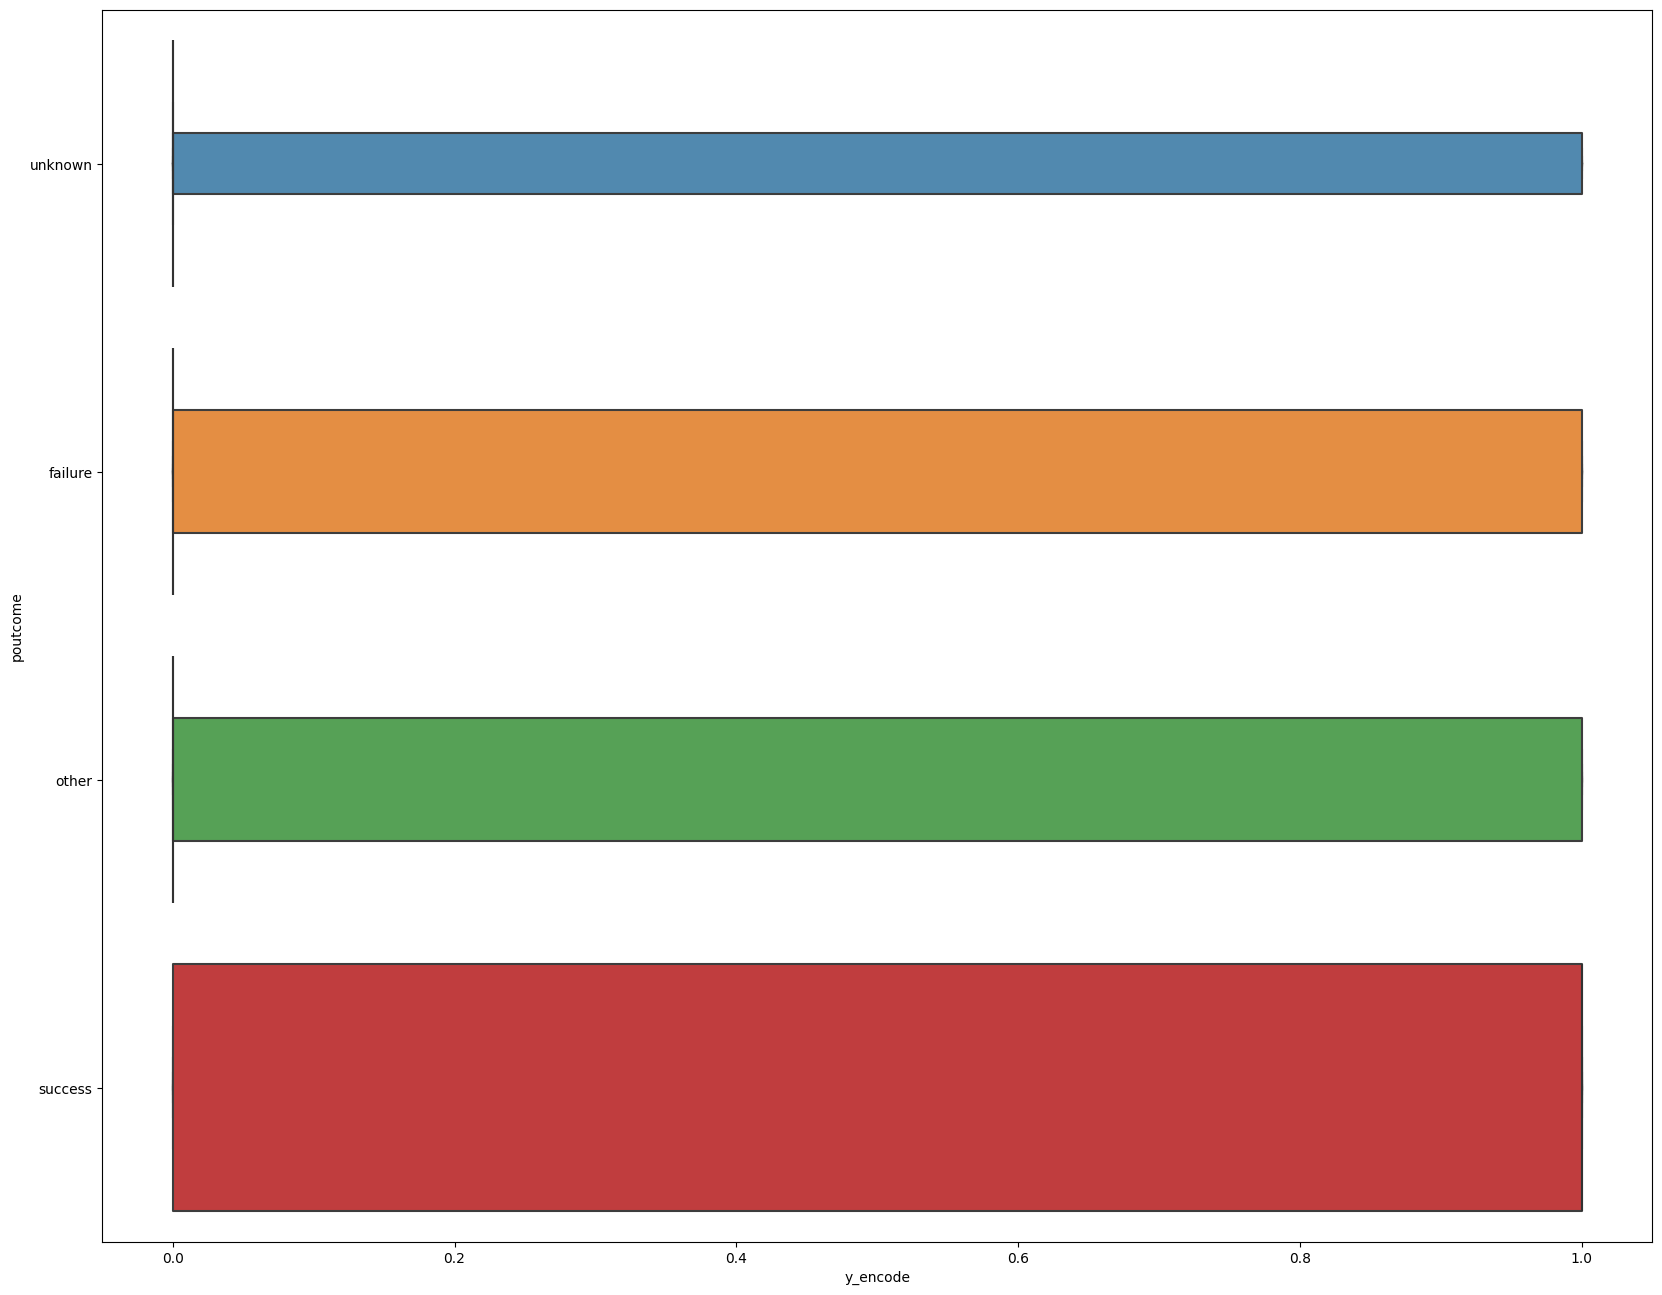

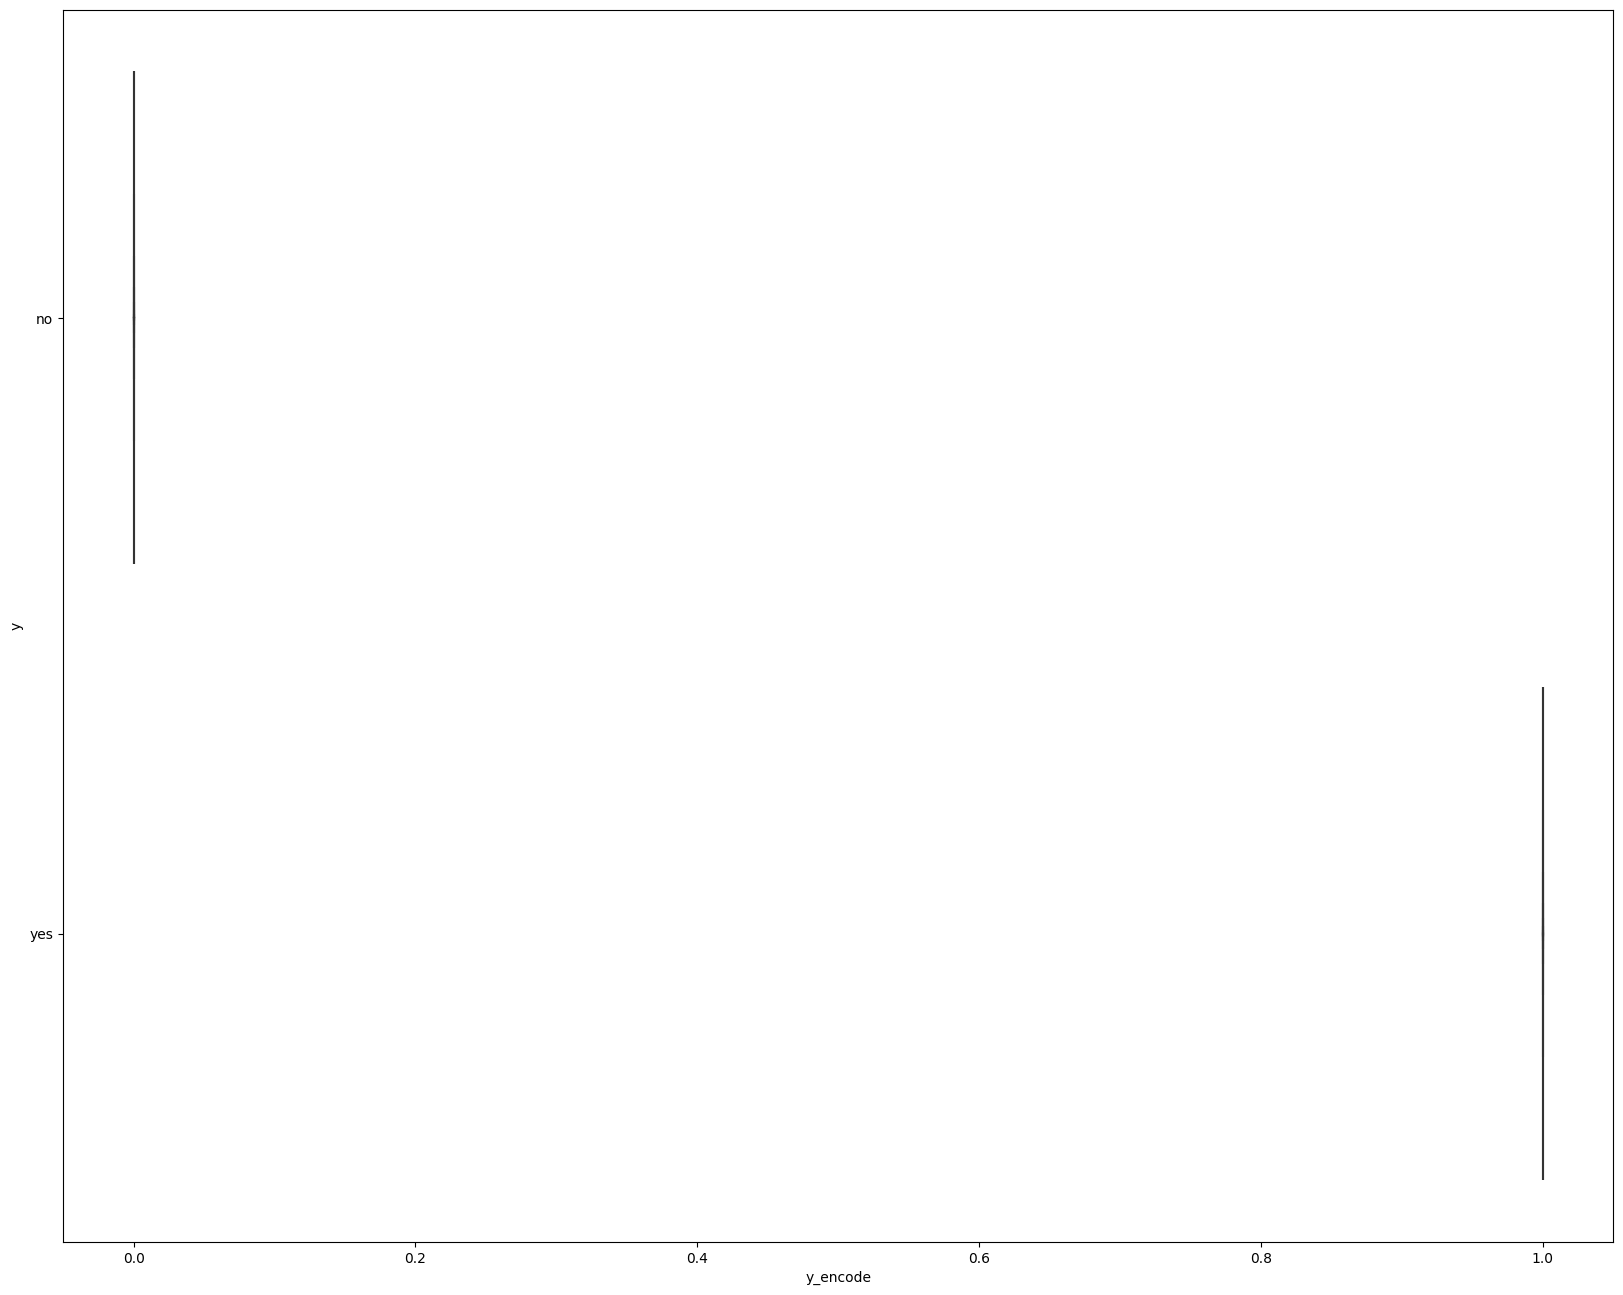

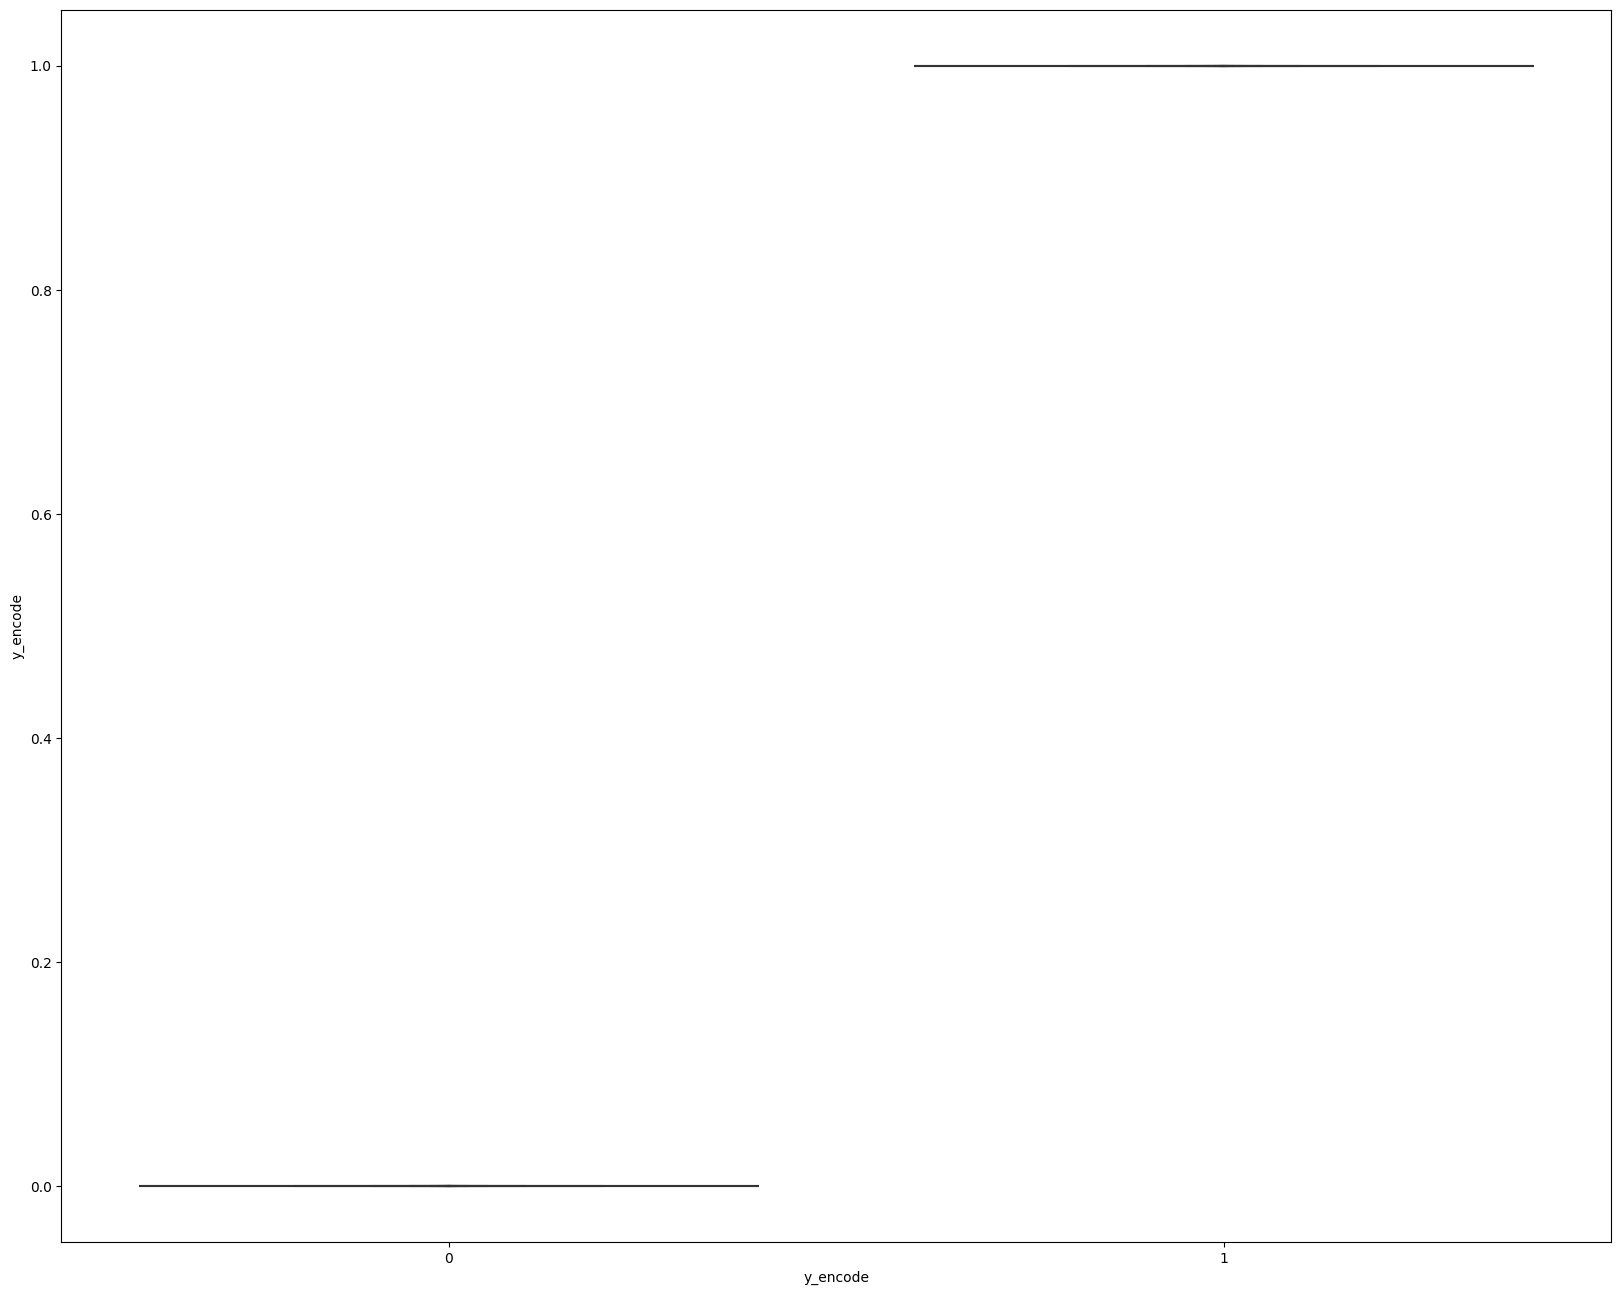

In [16]:
for i in df.columns:
    #print(i)
    a = sns.boxenplot(data=df, x='y_encode', y=i)
    plt.pyplot.show()

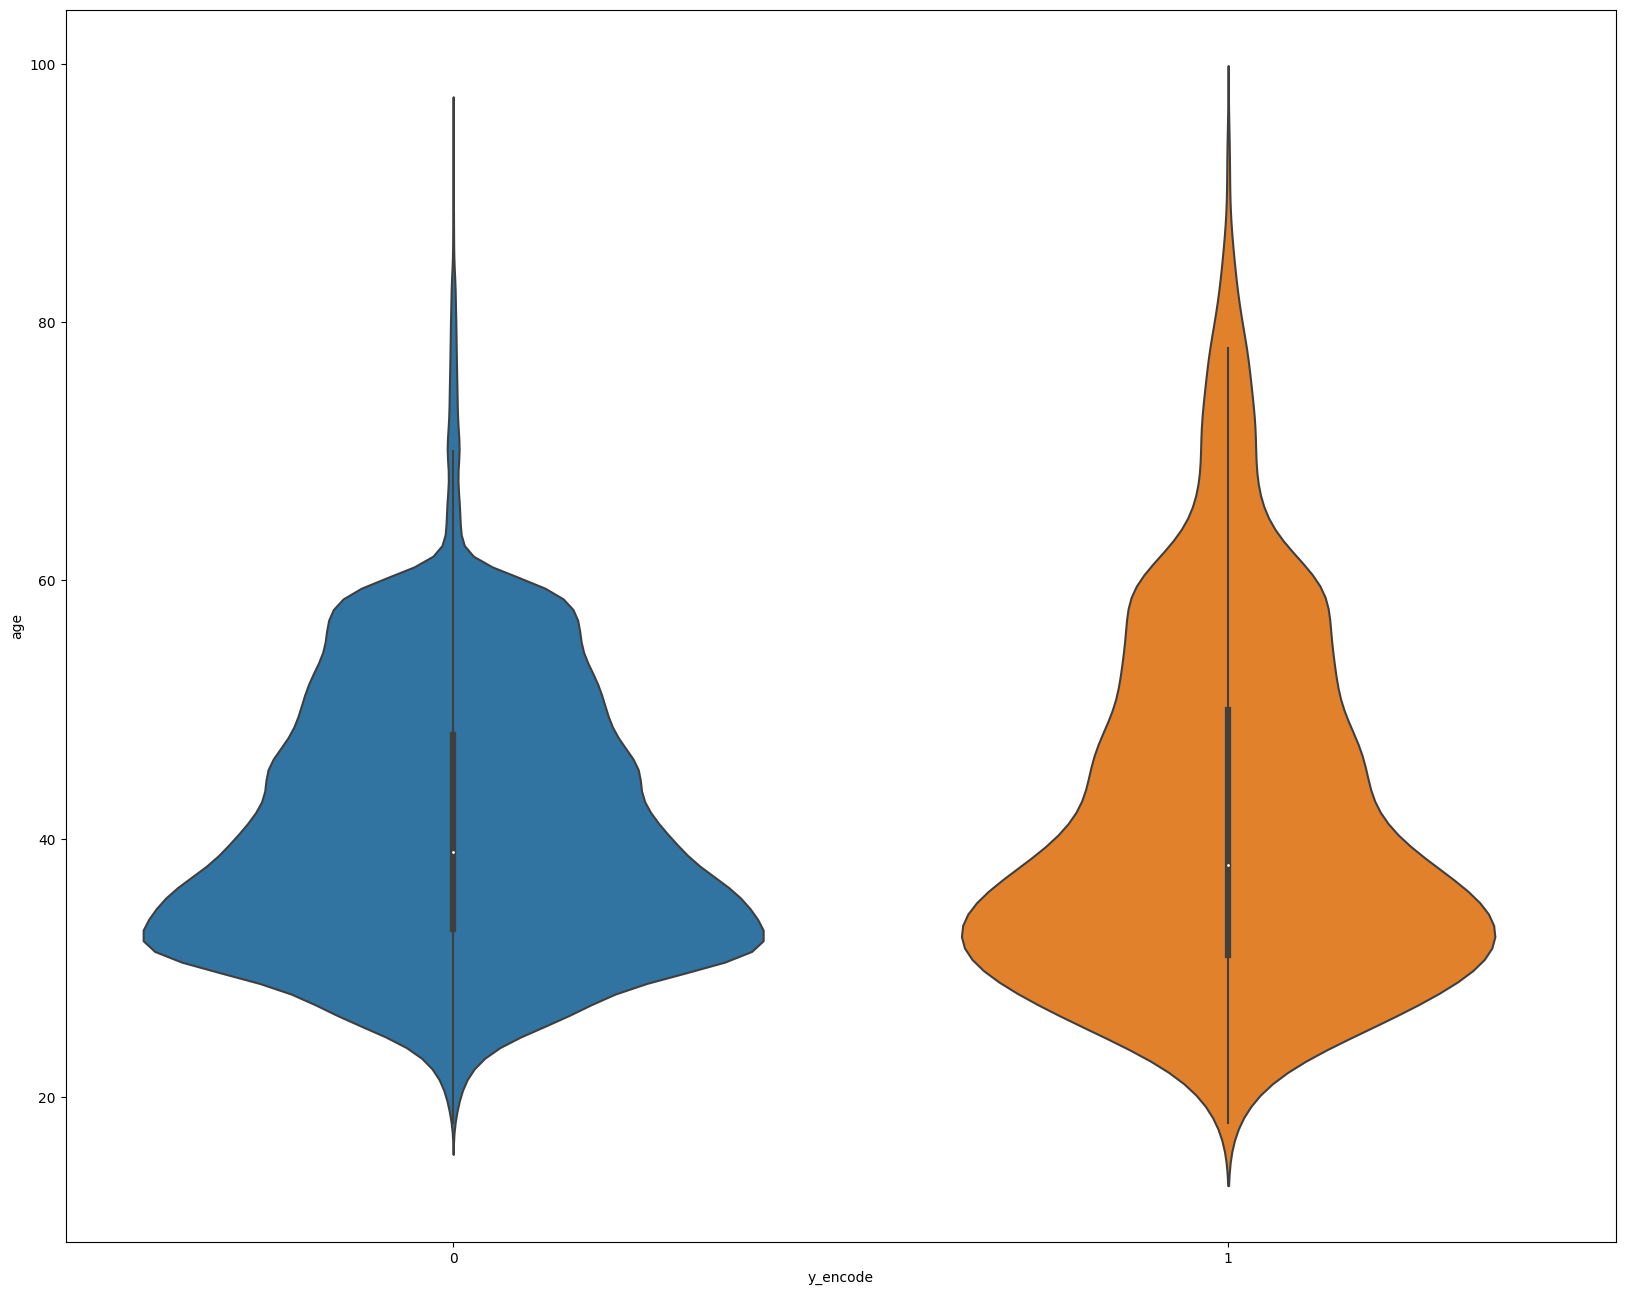

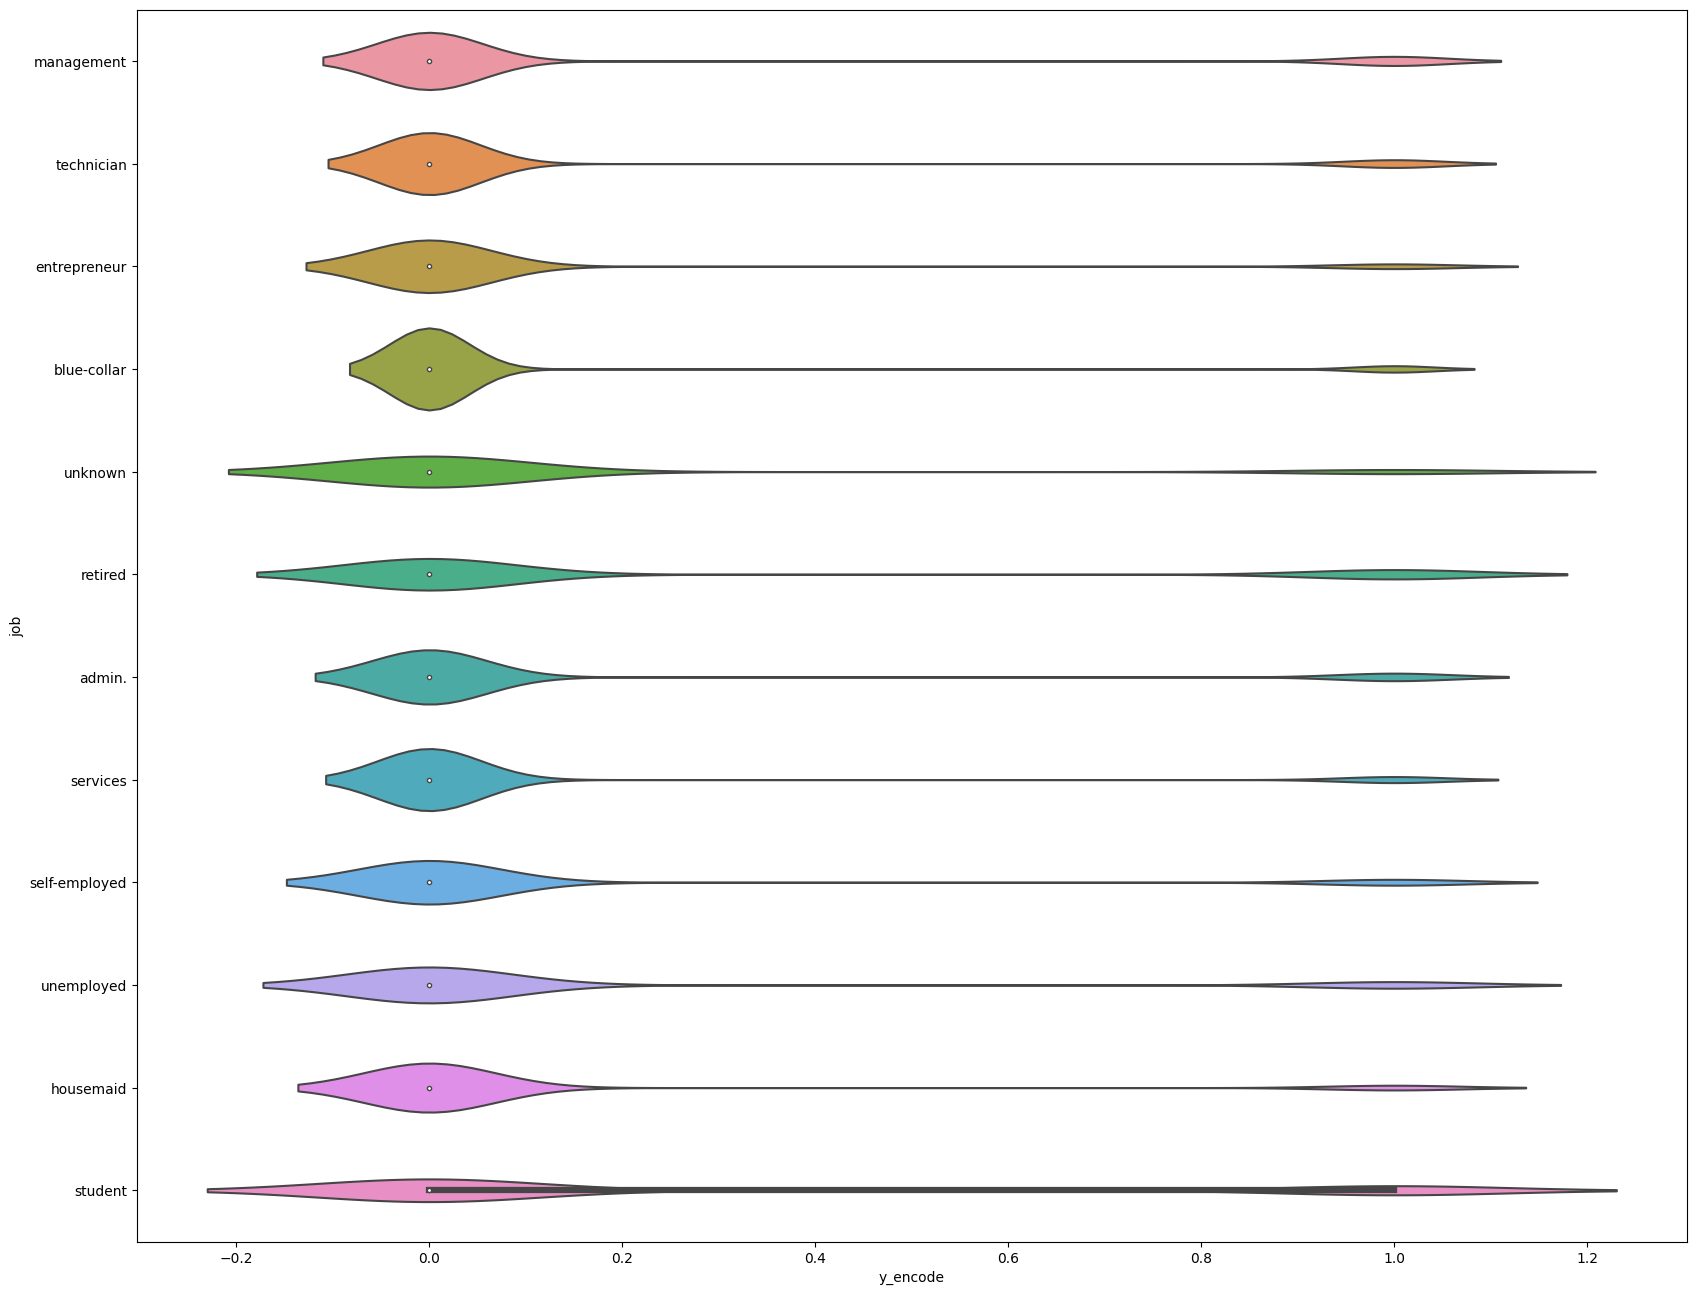

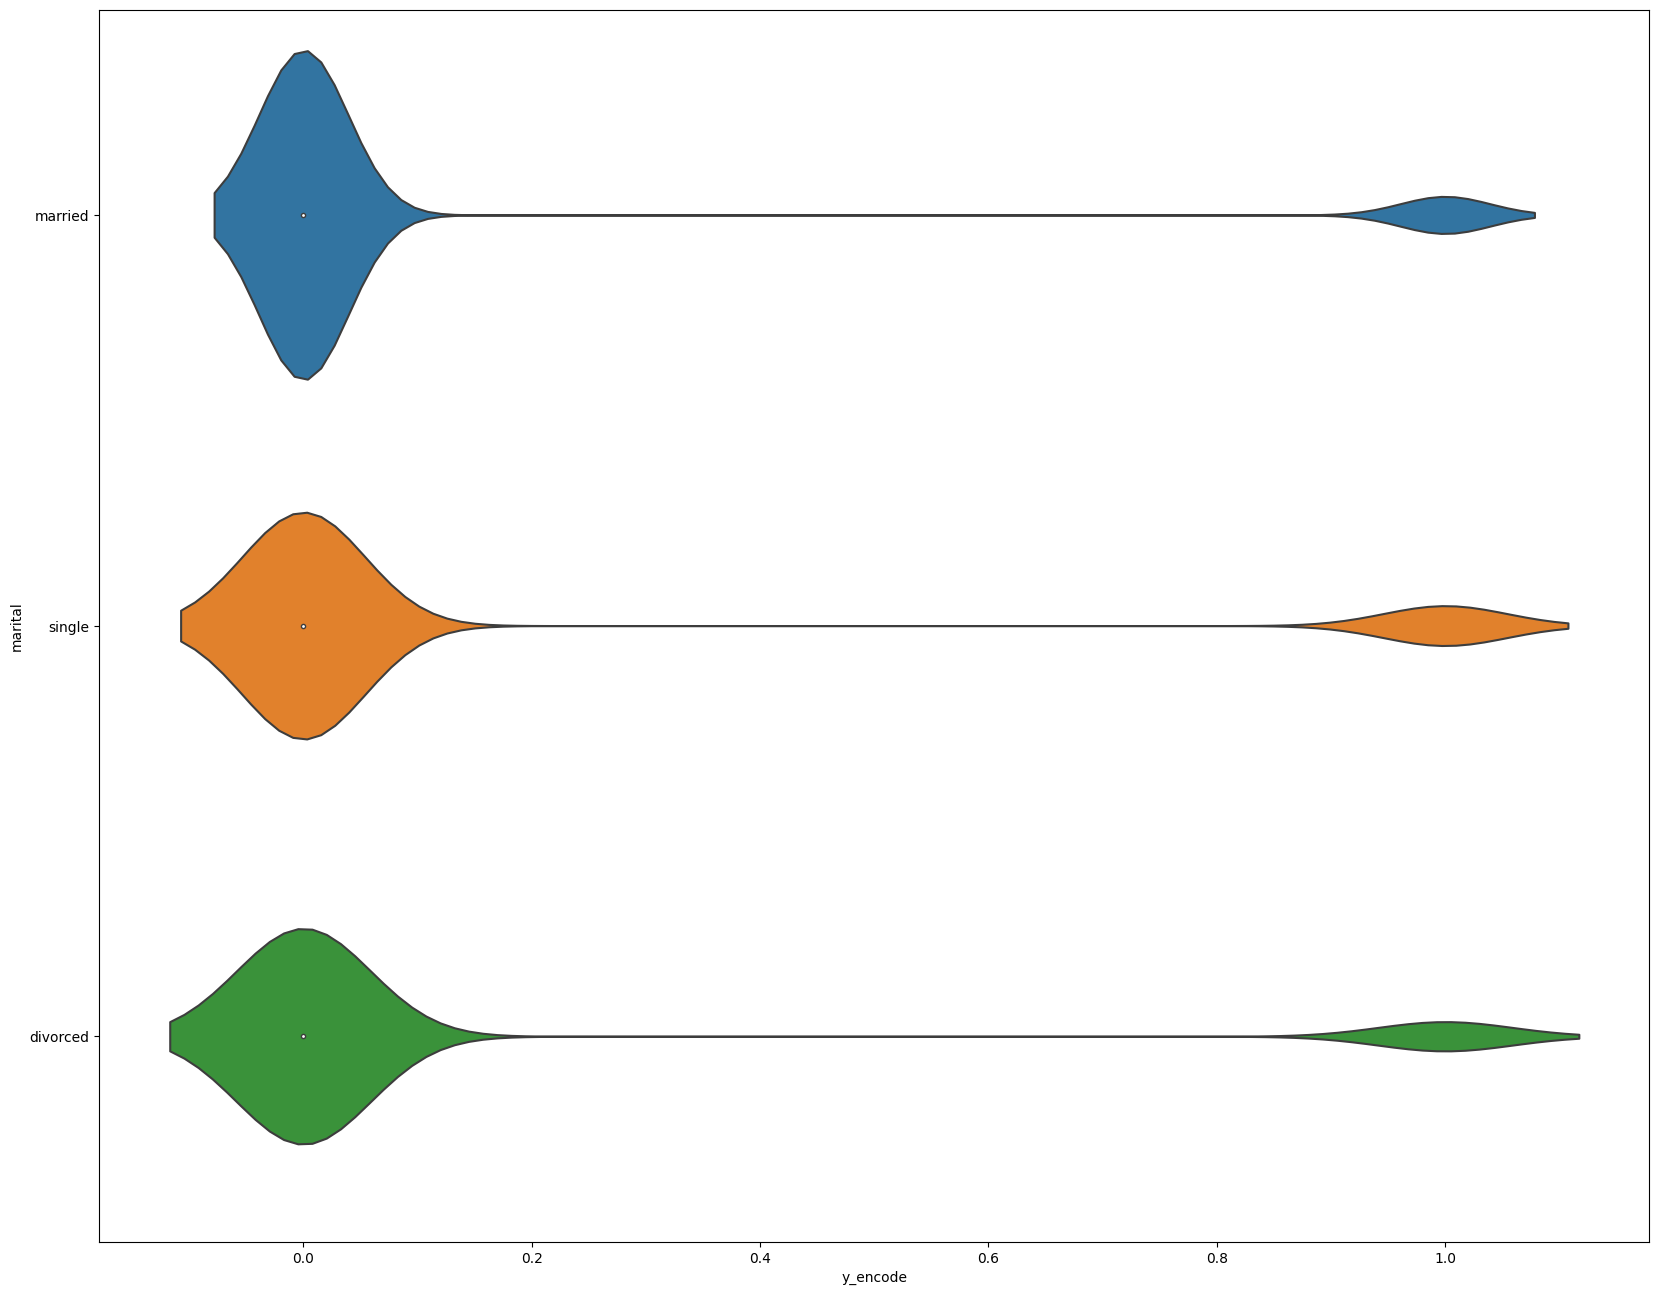

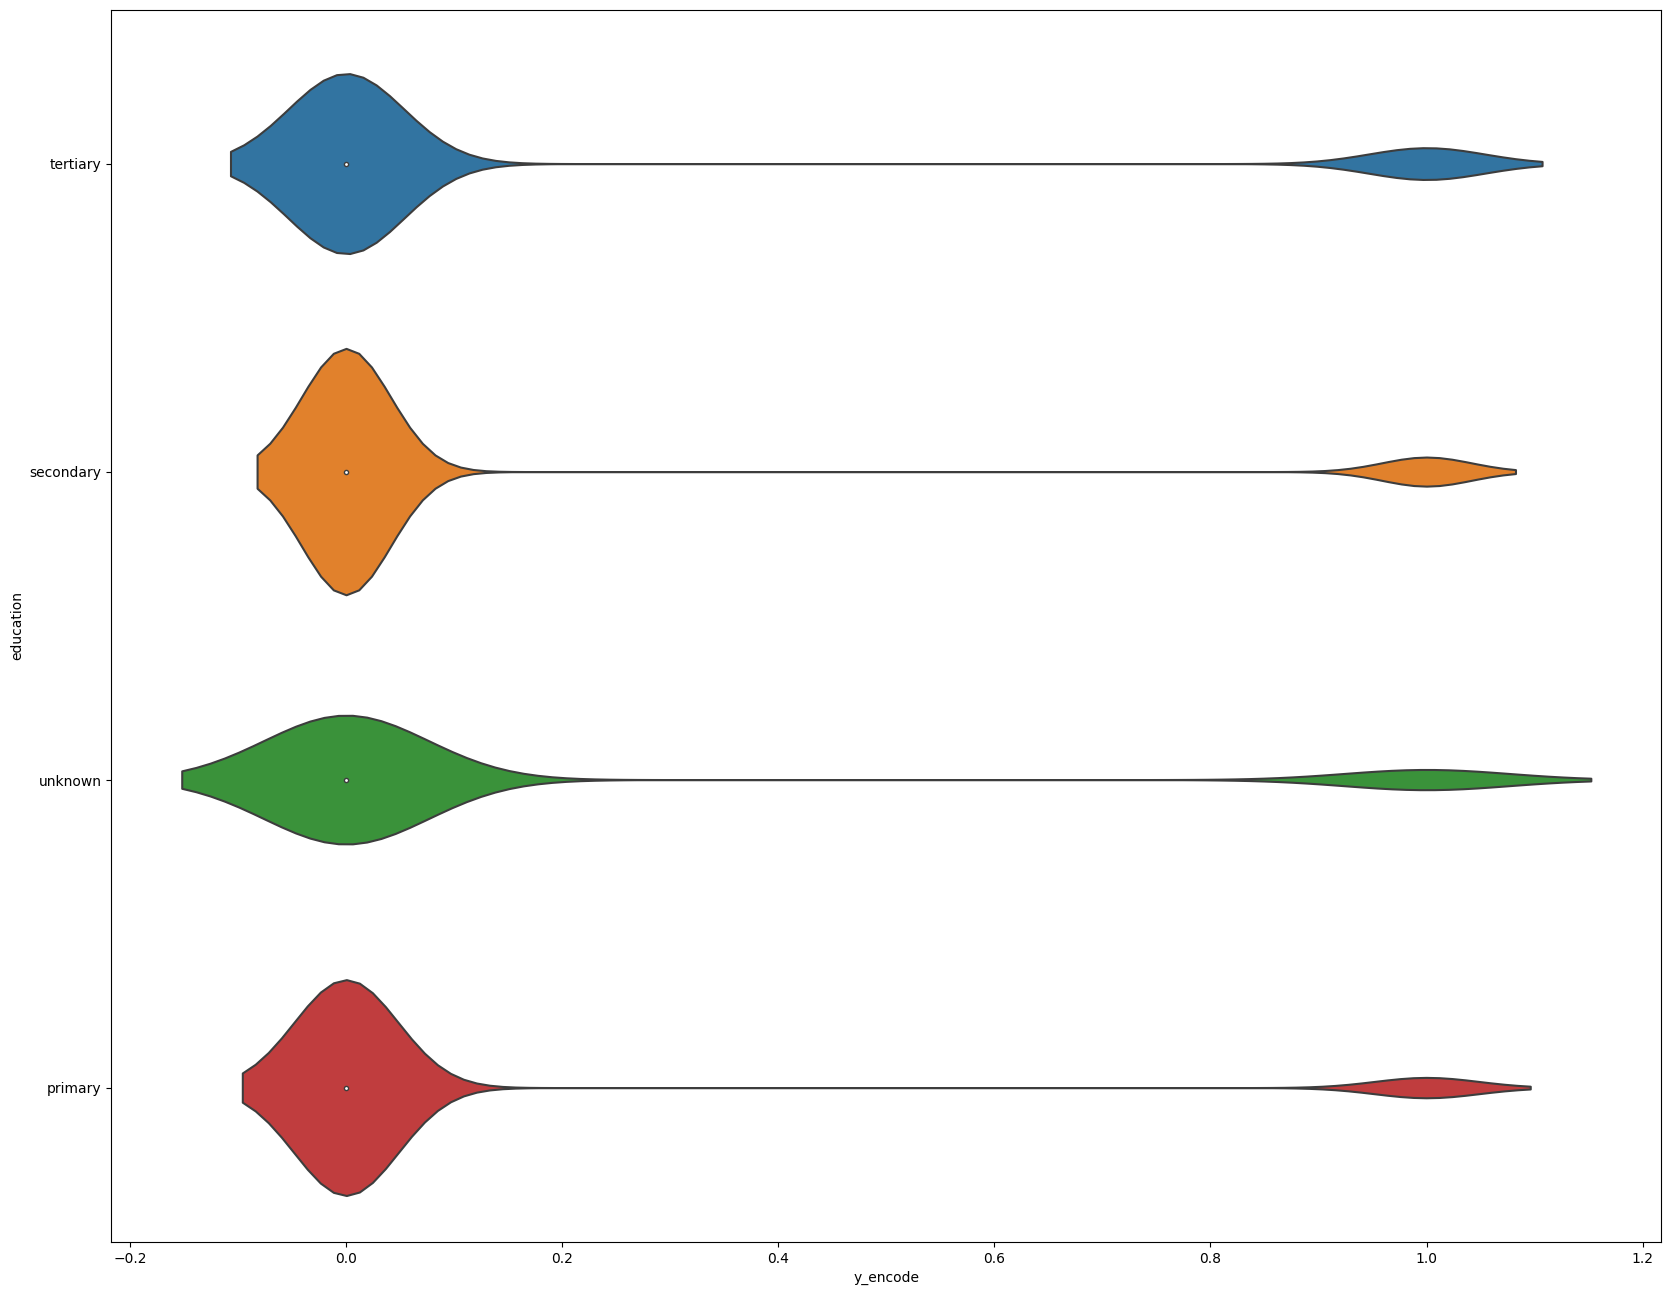

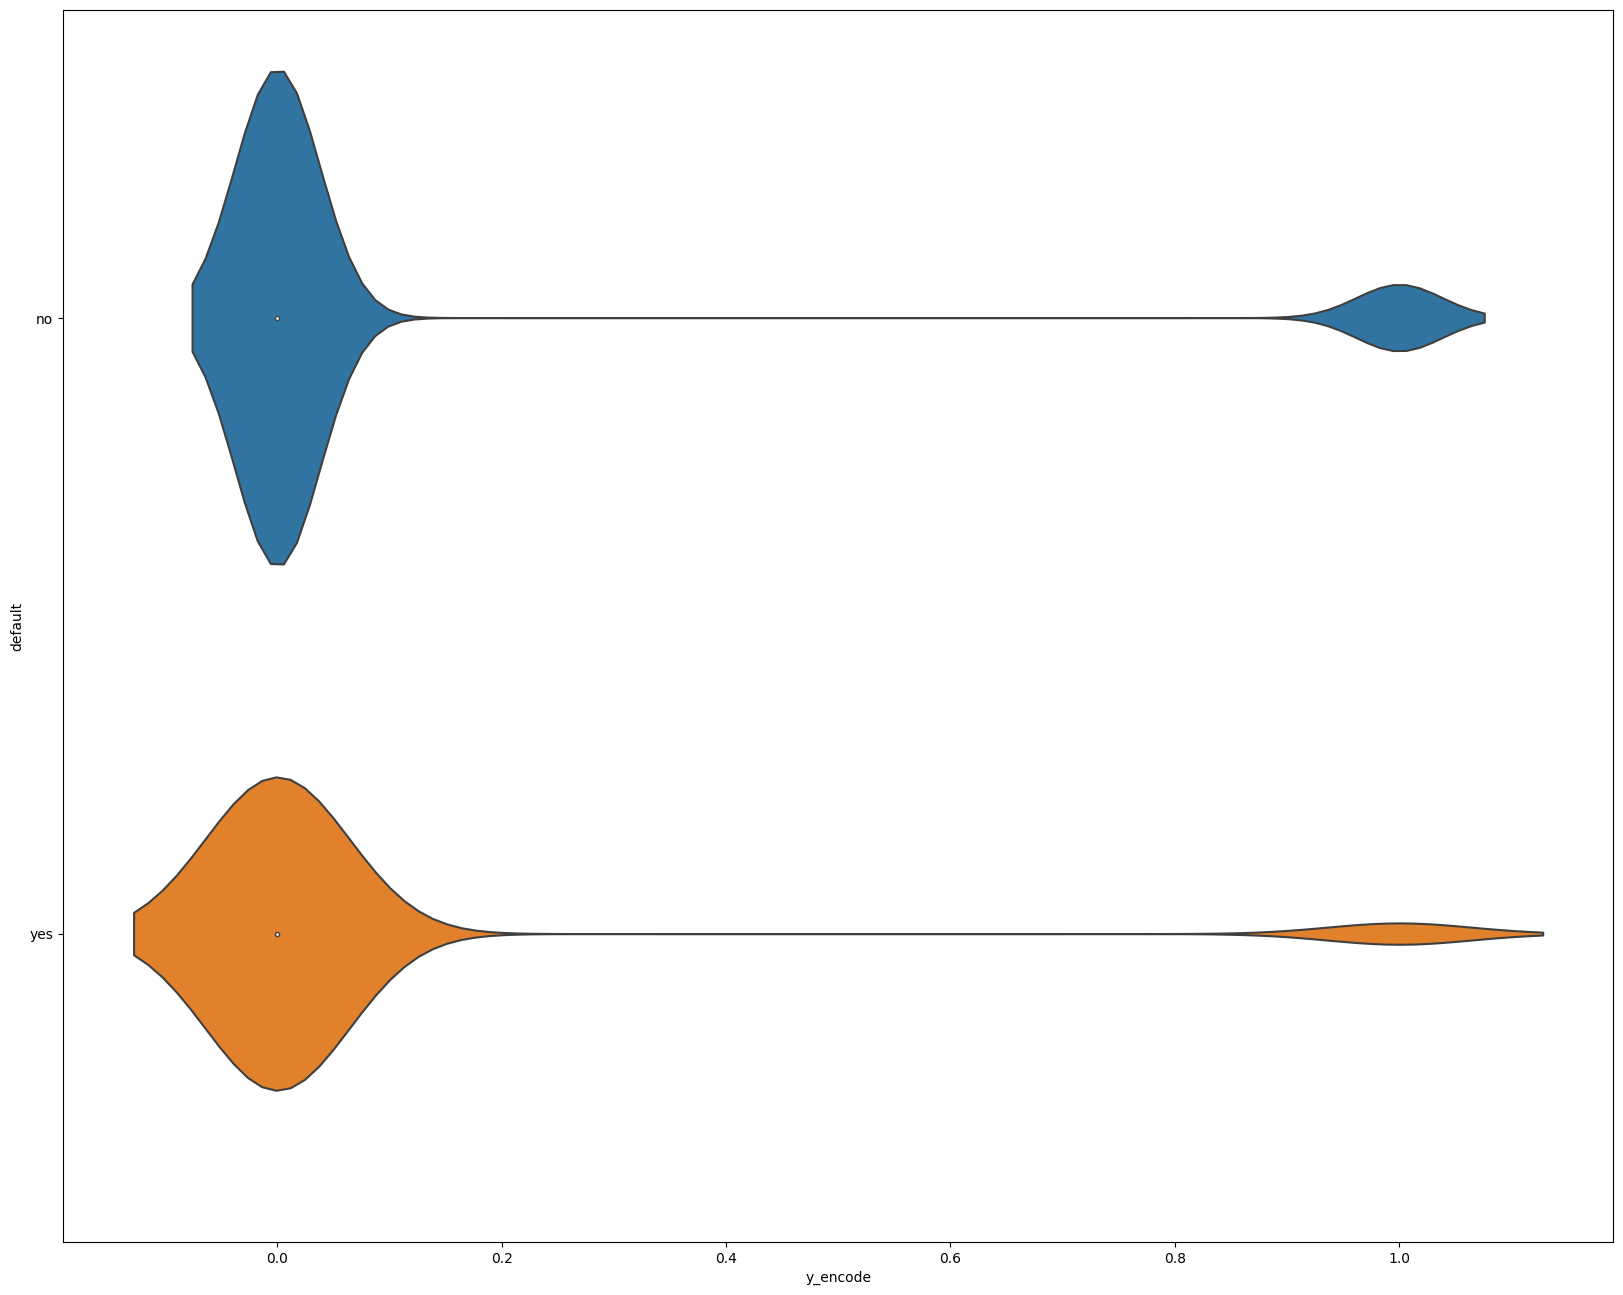

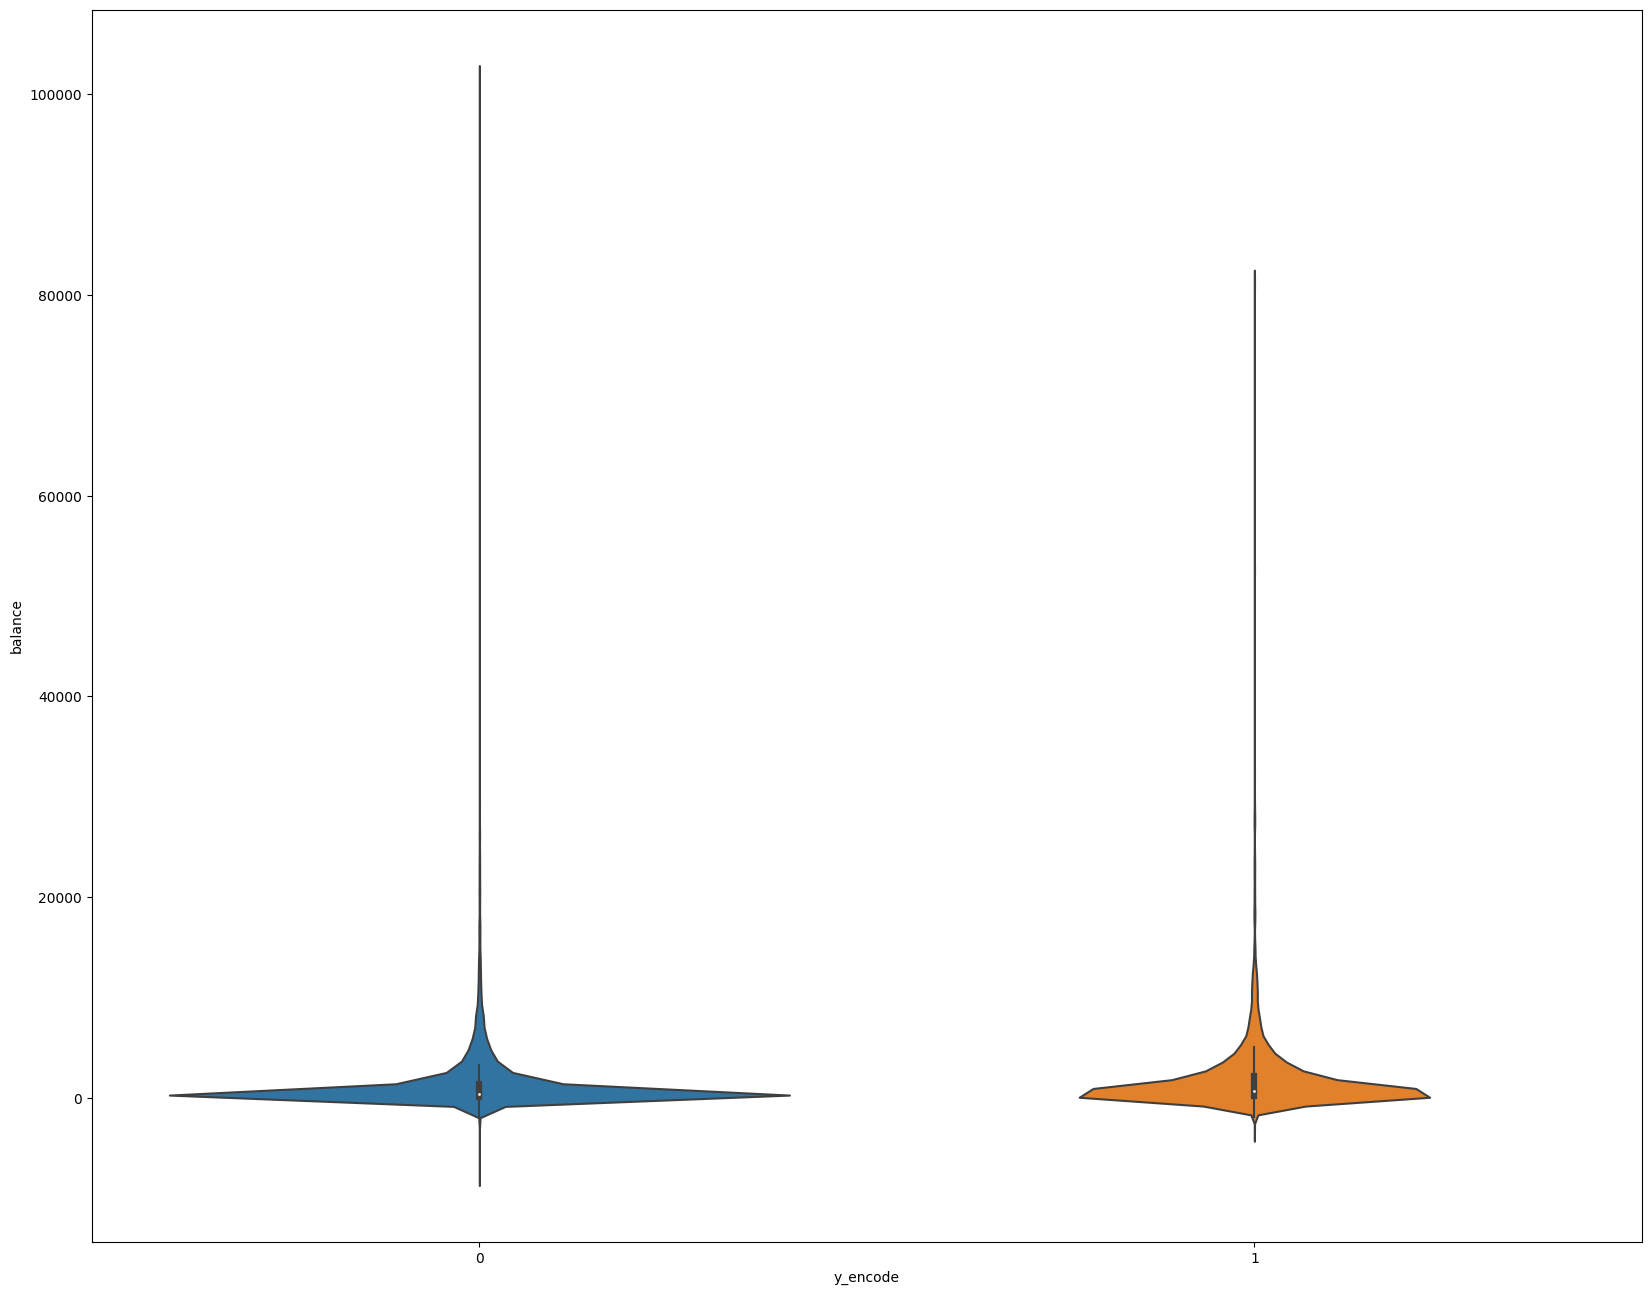

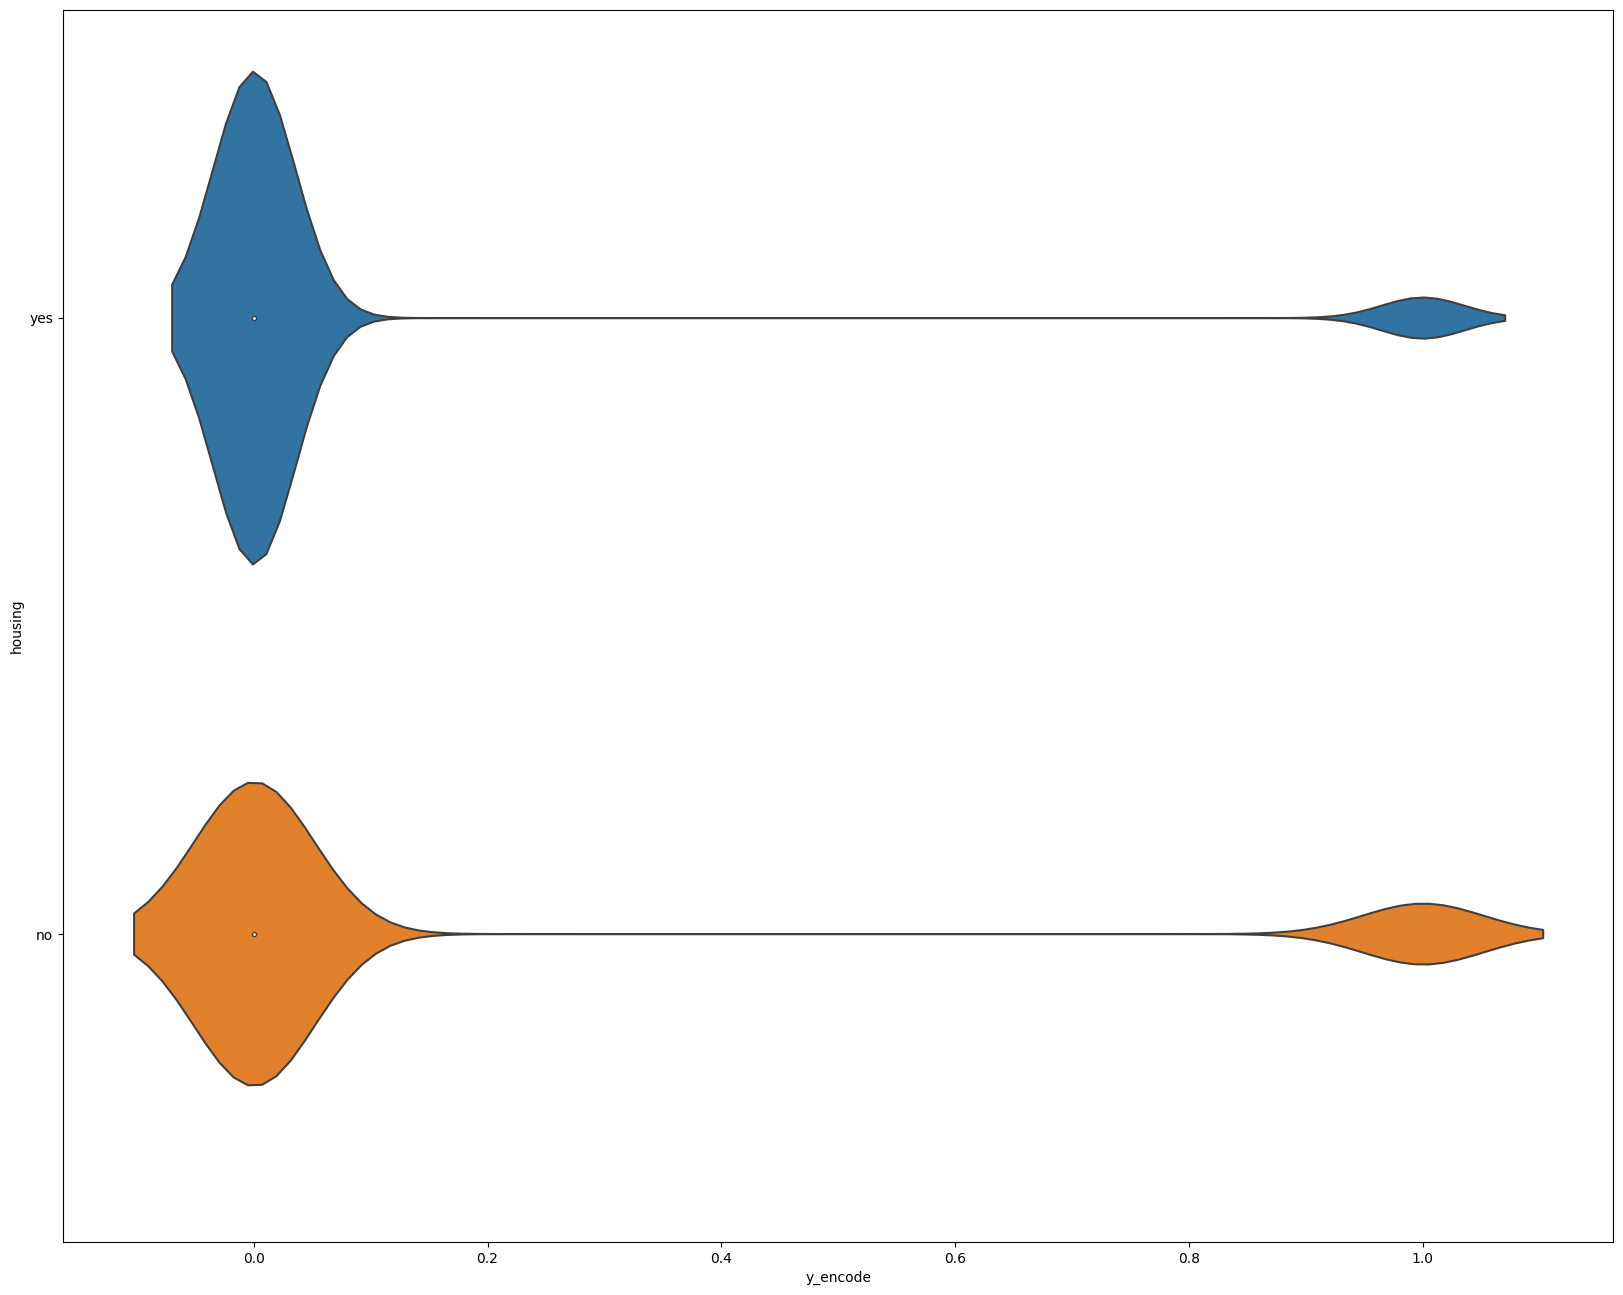

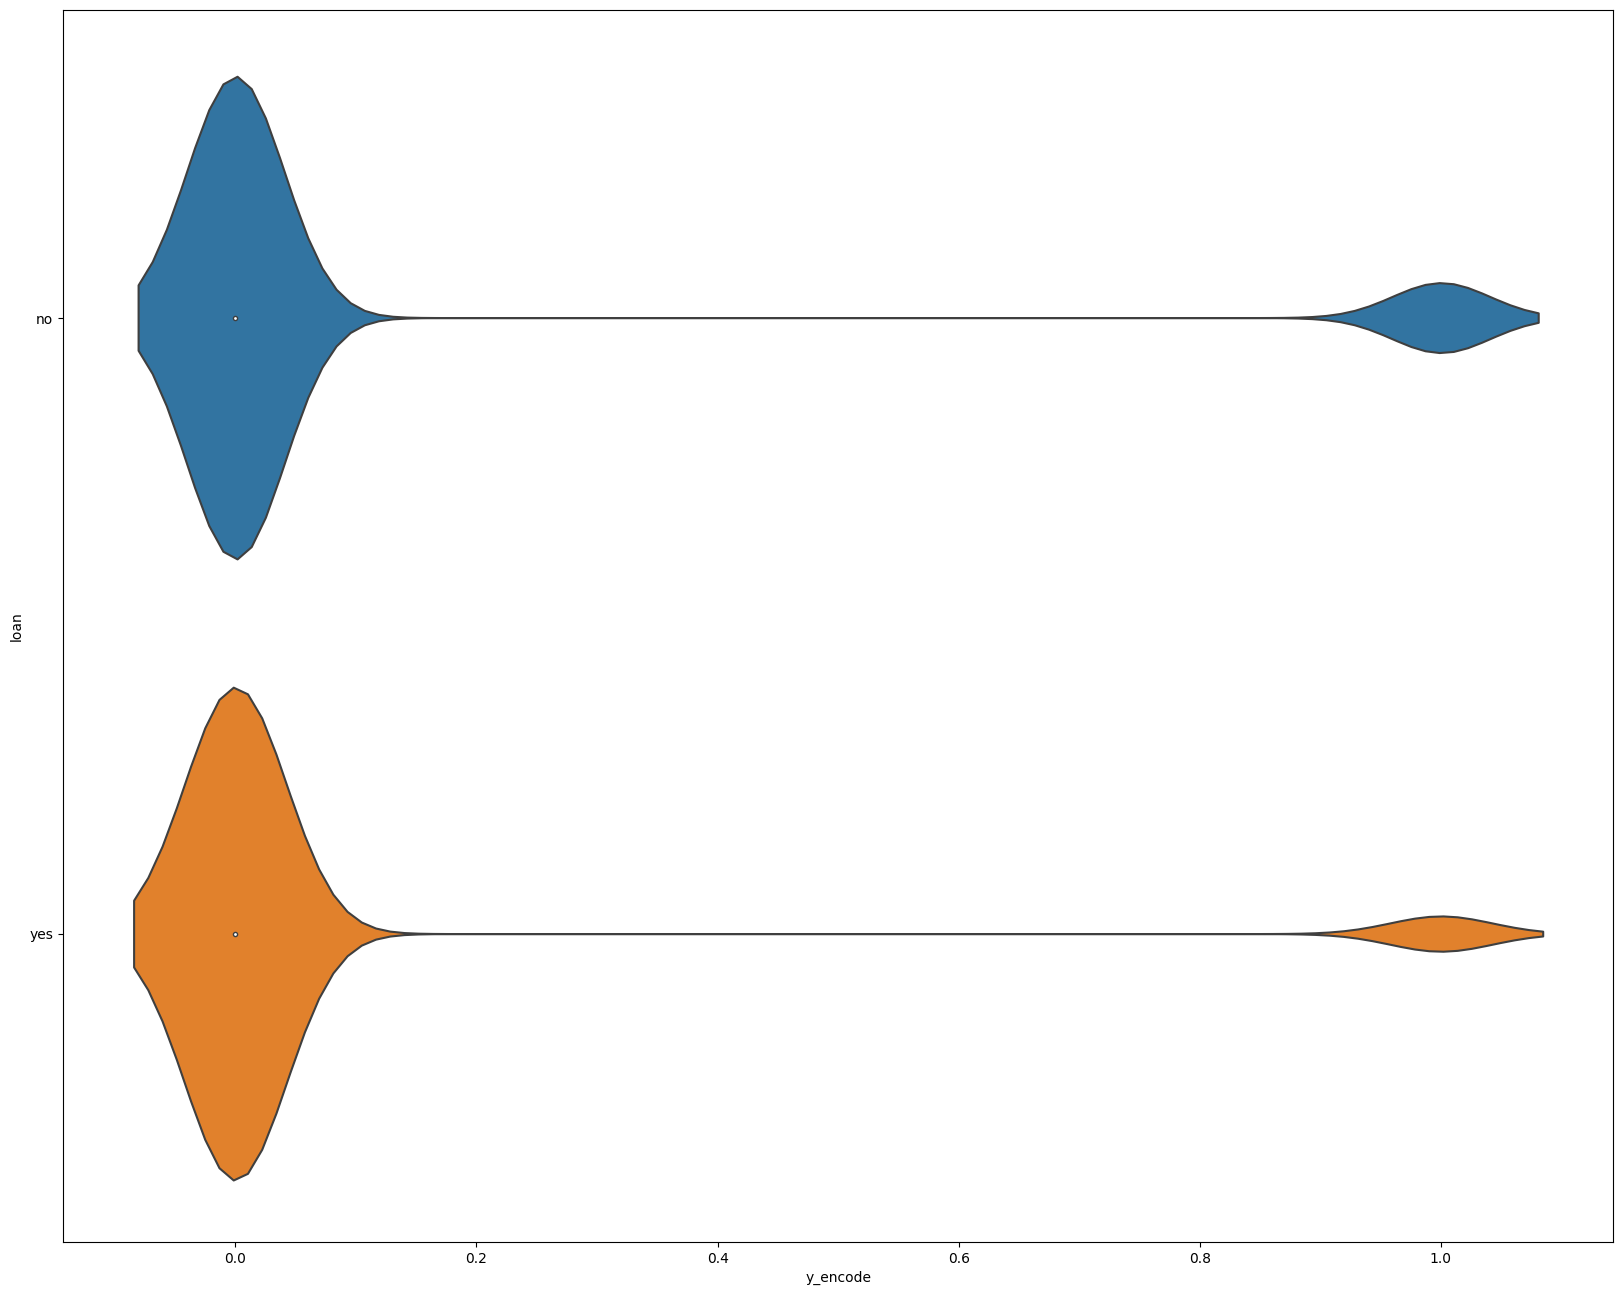

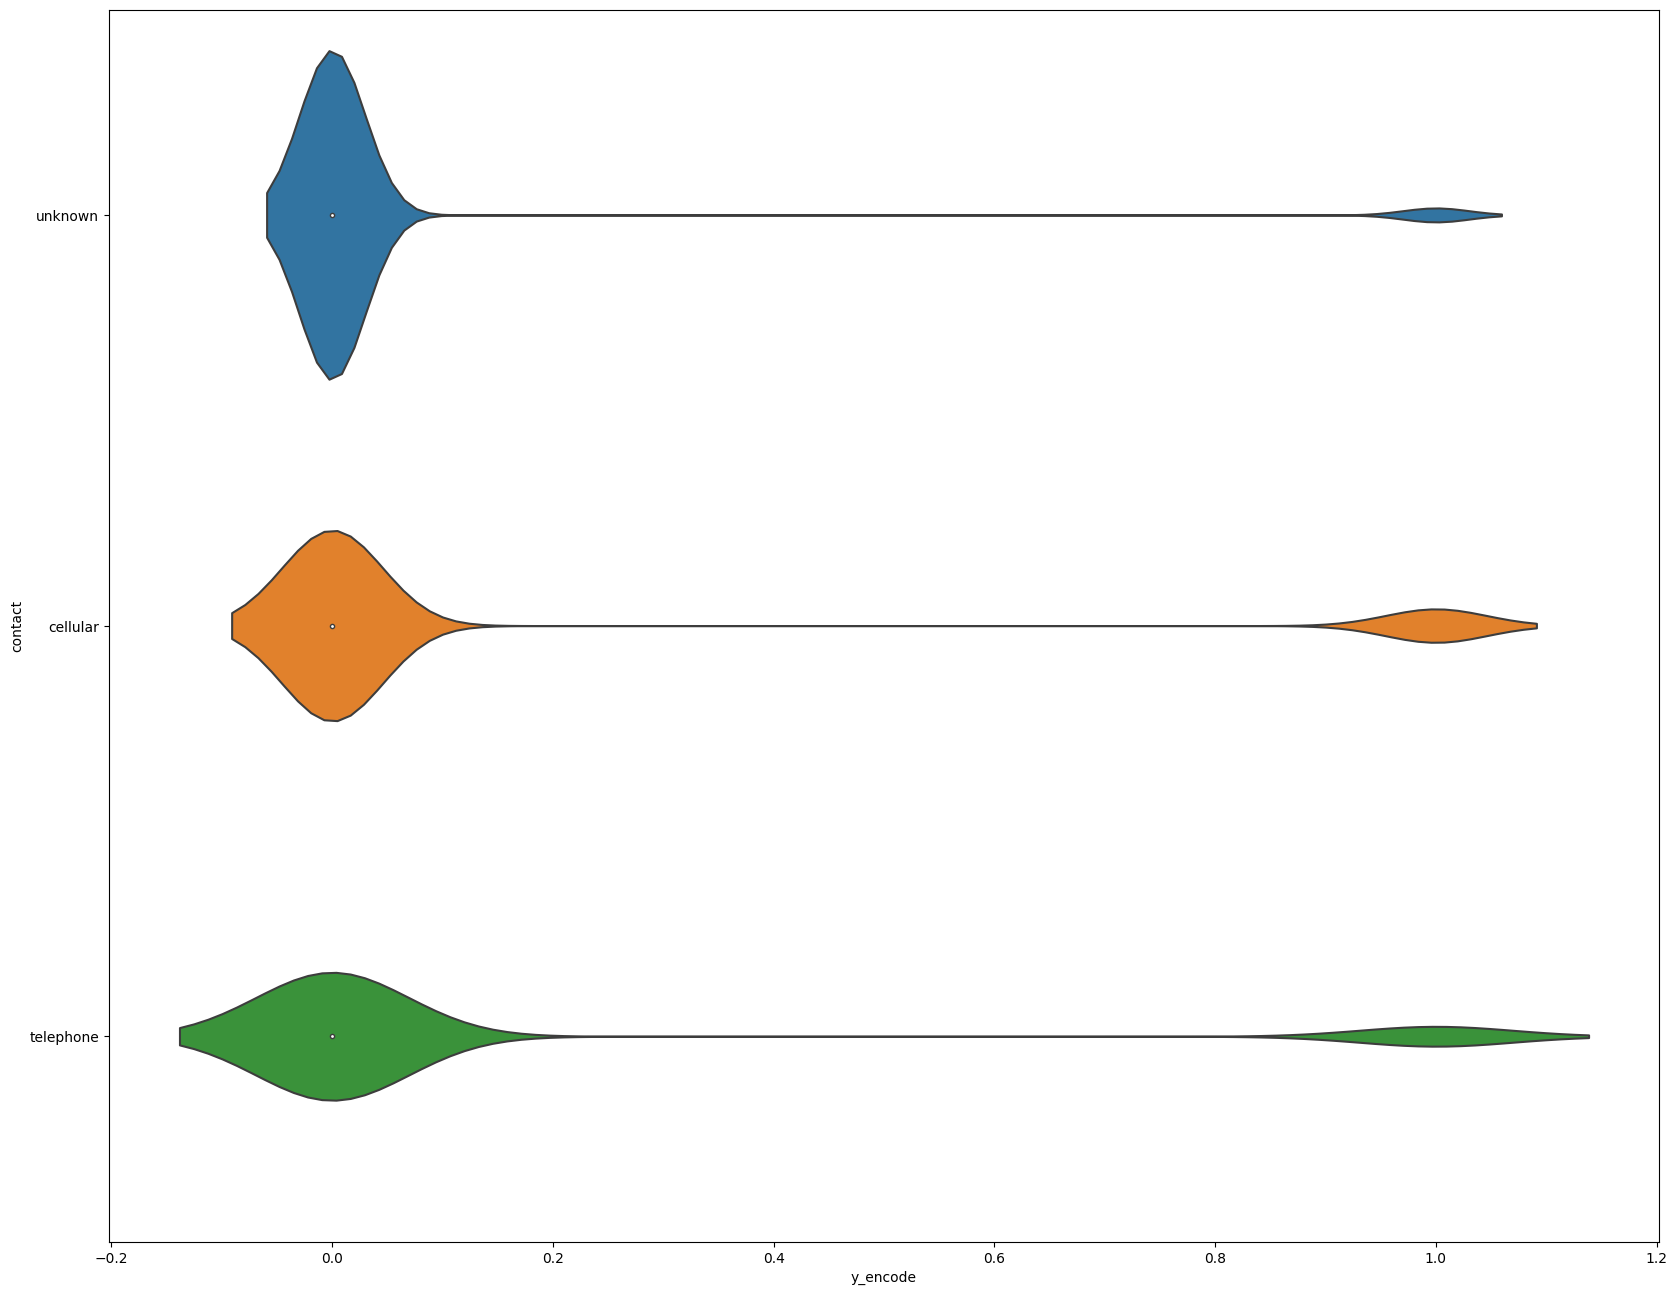

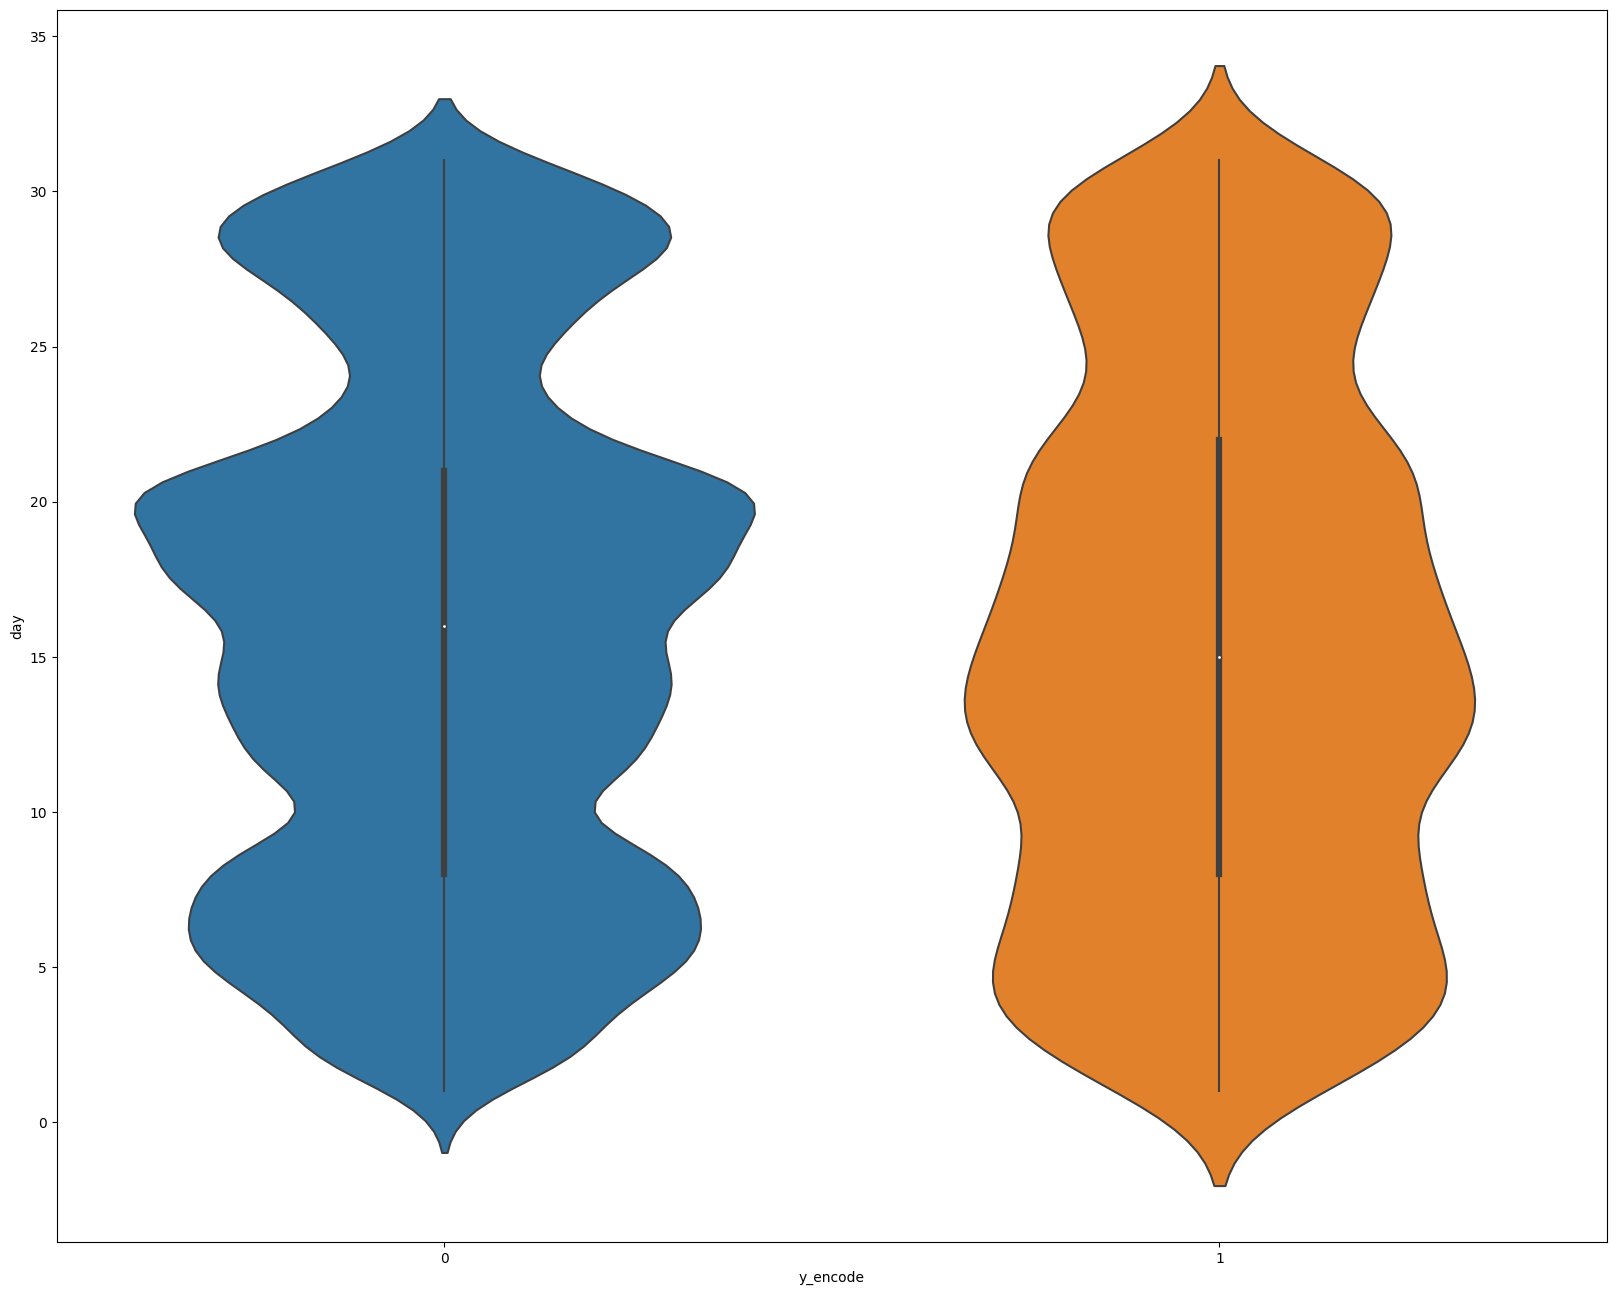

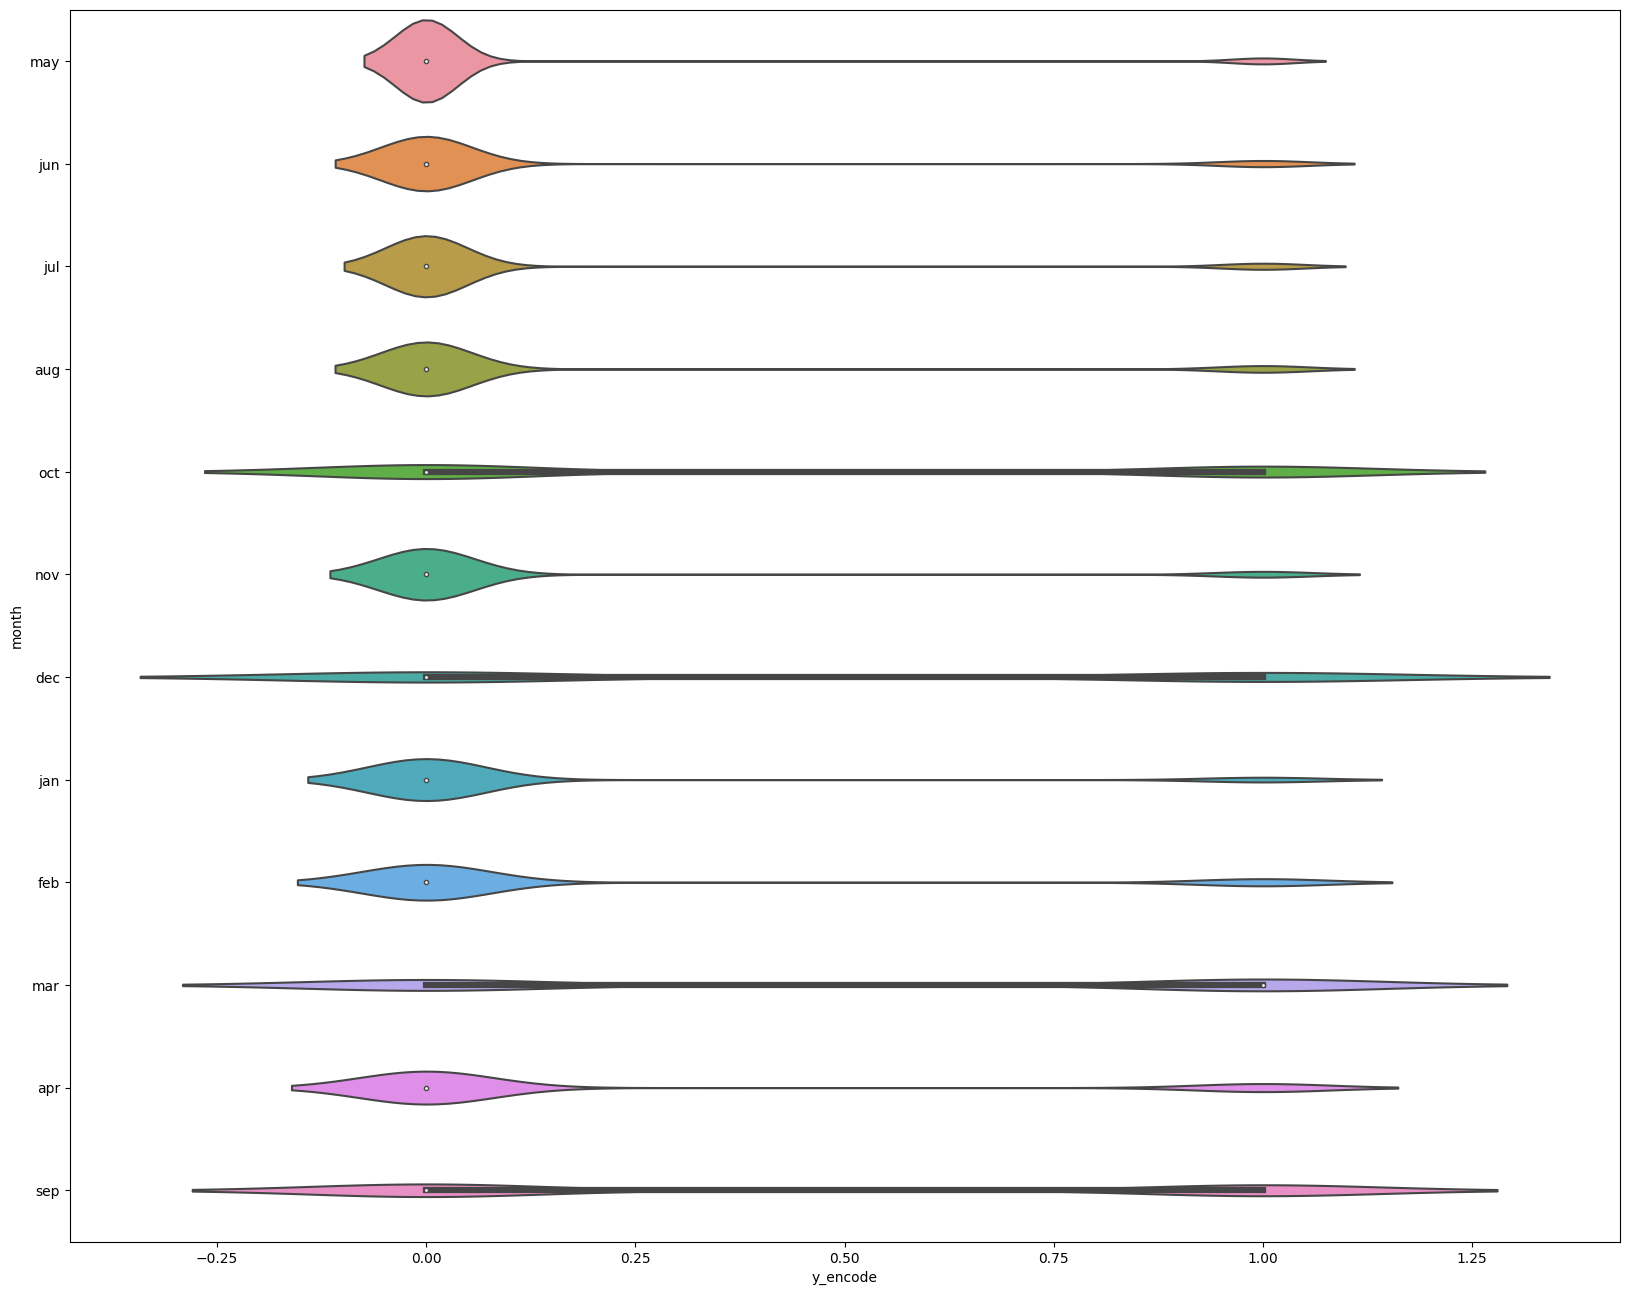

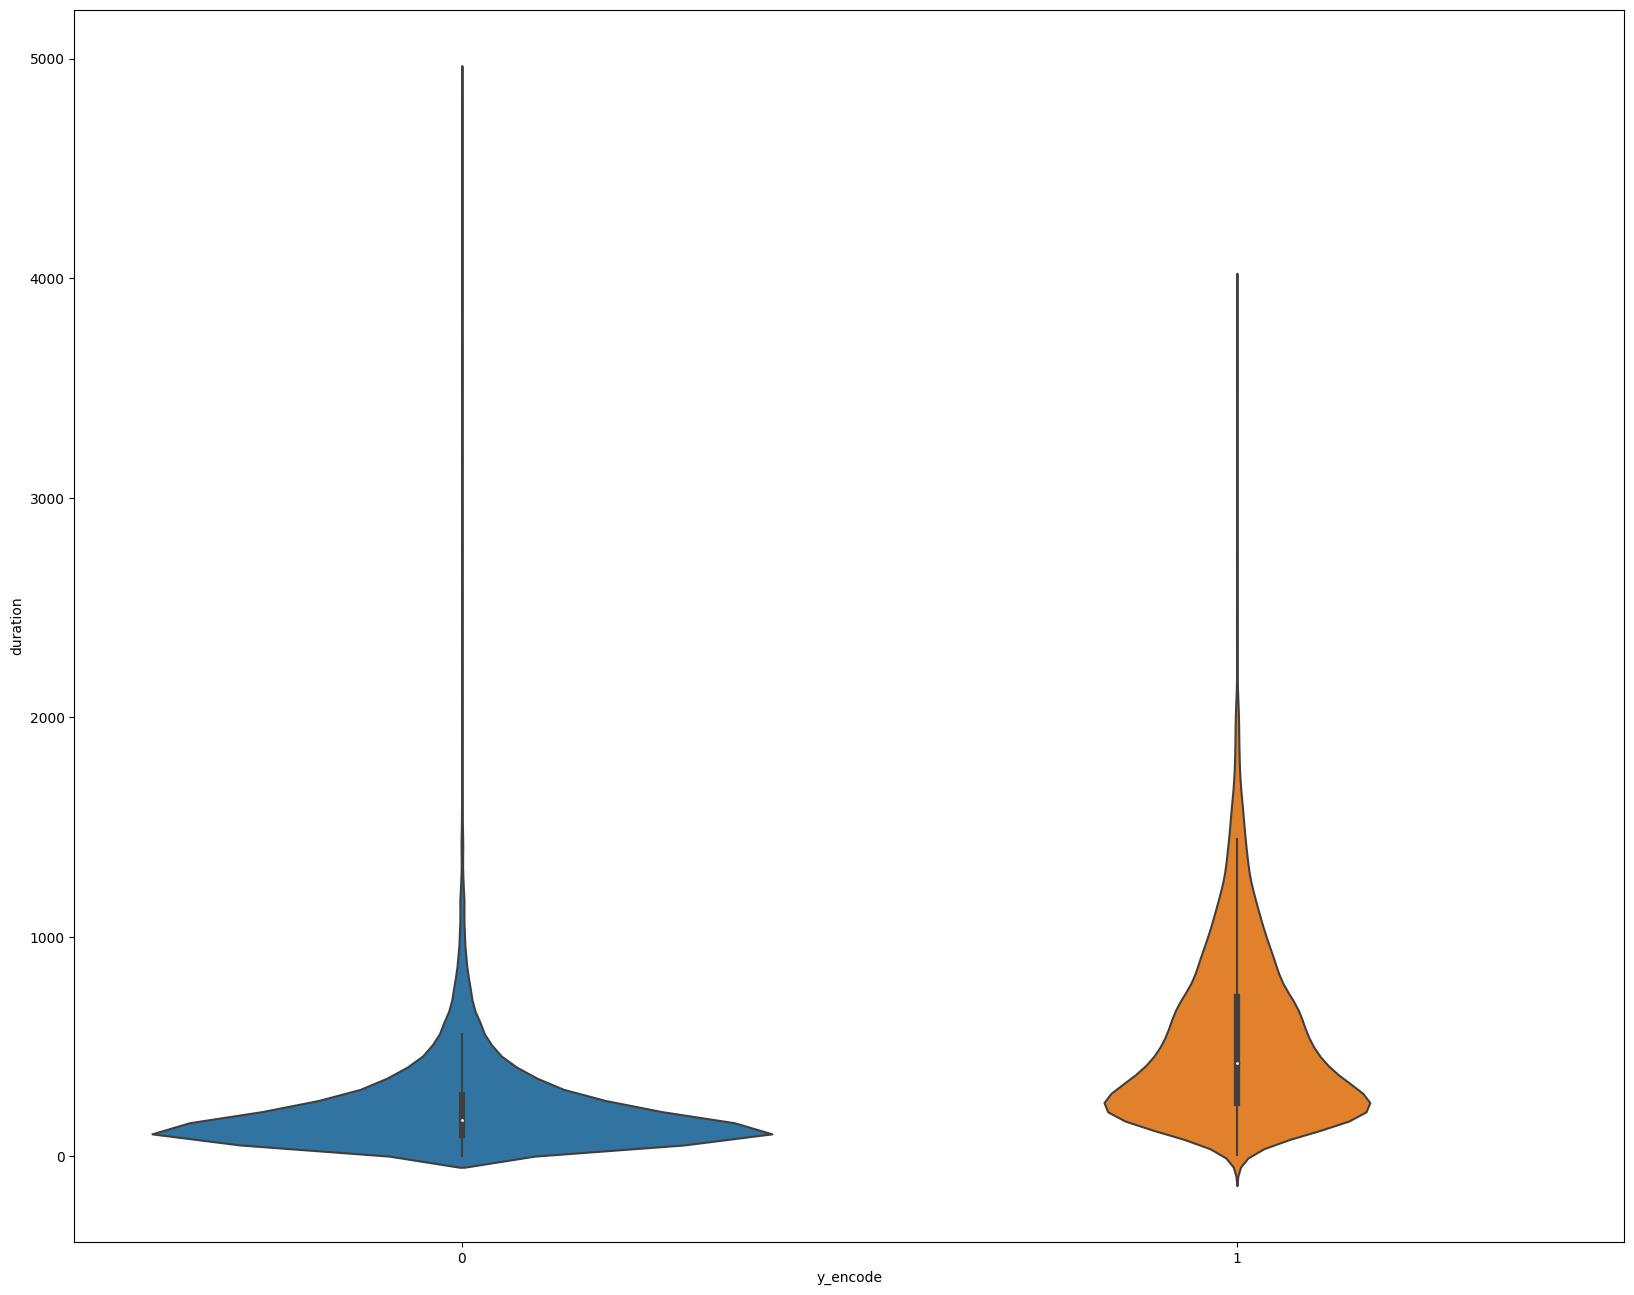

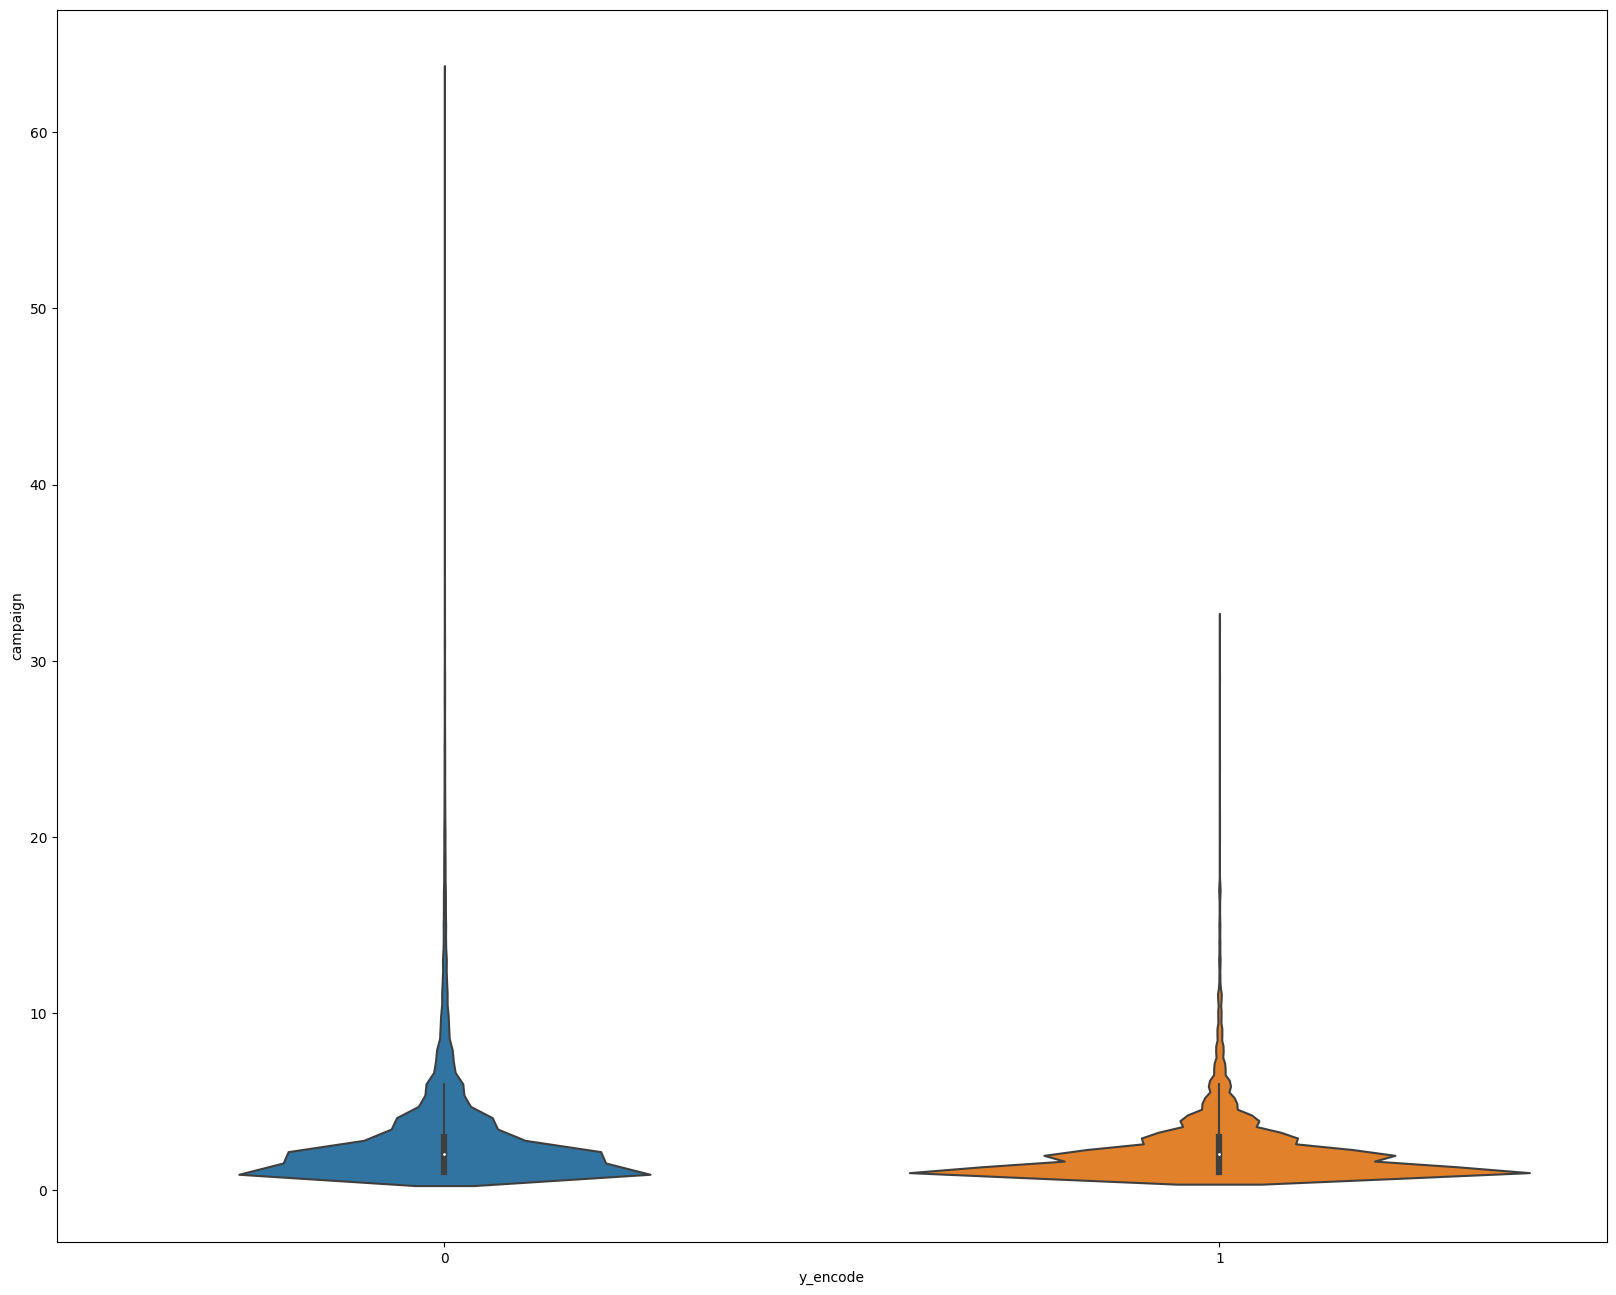

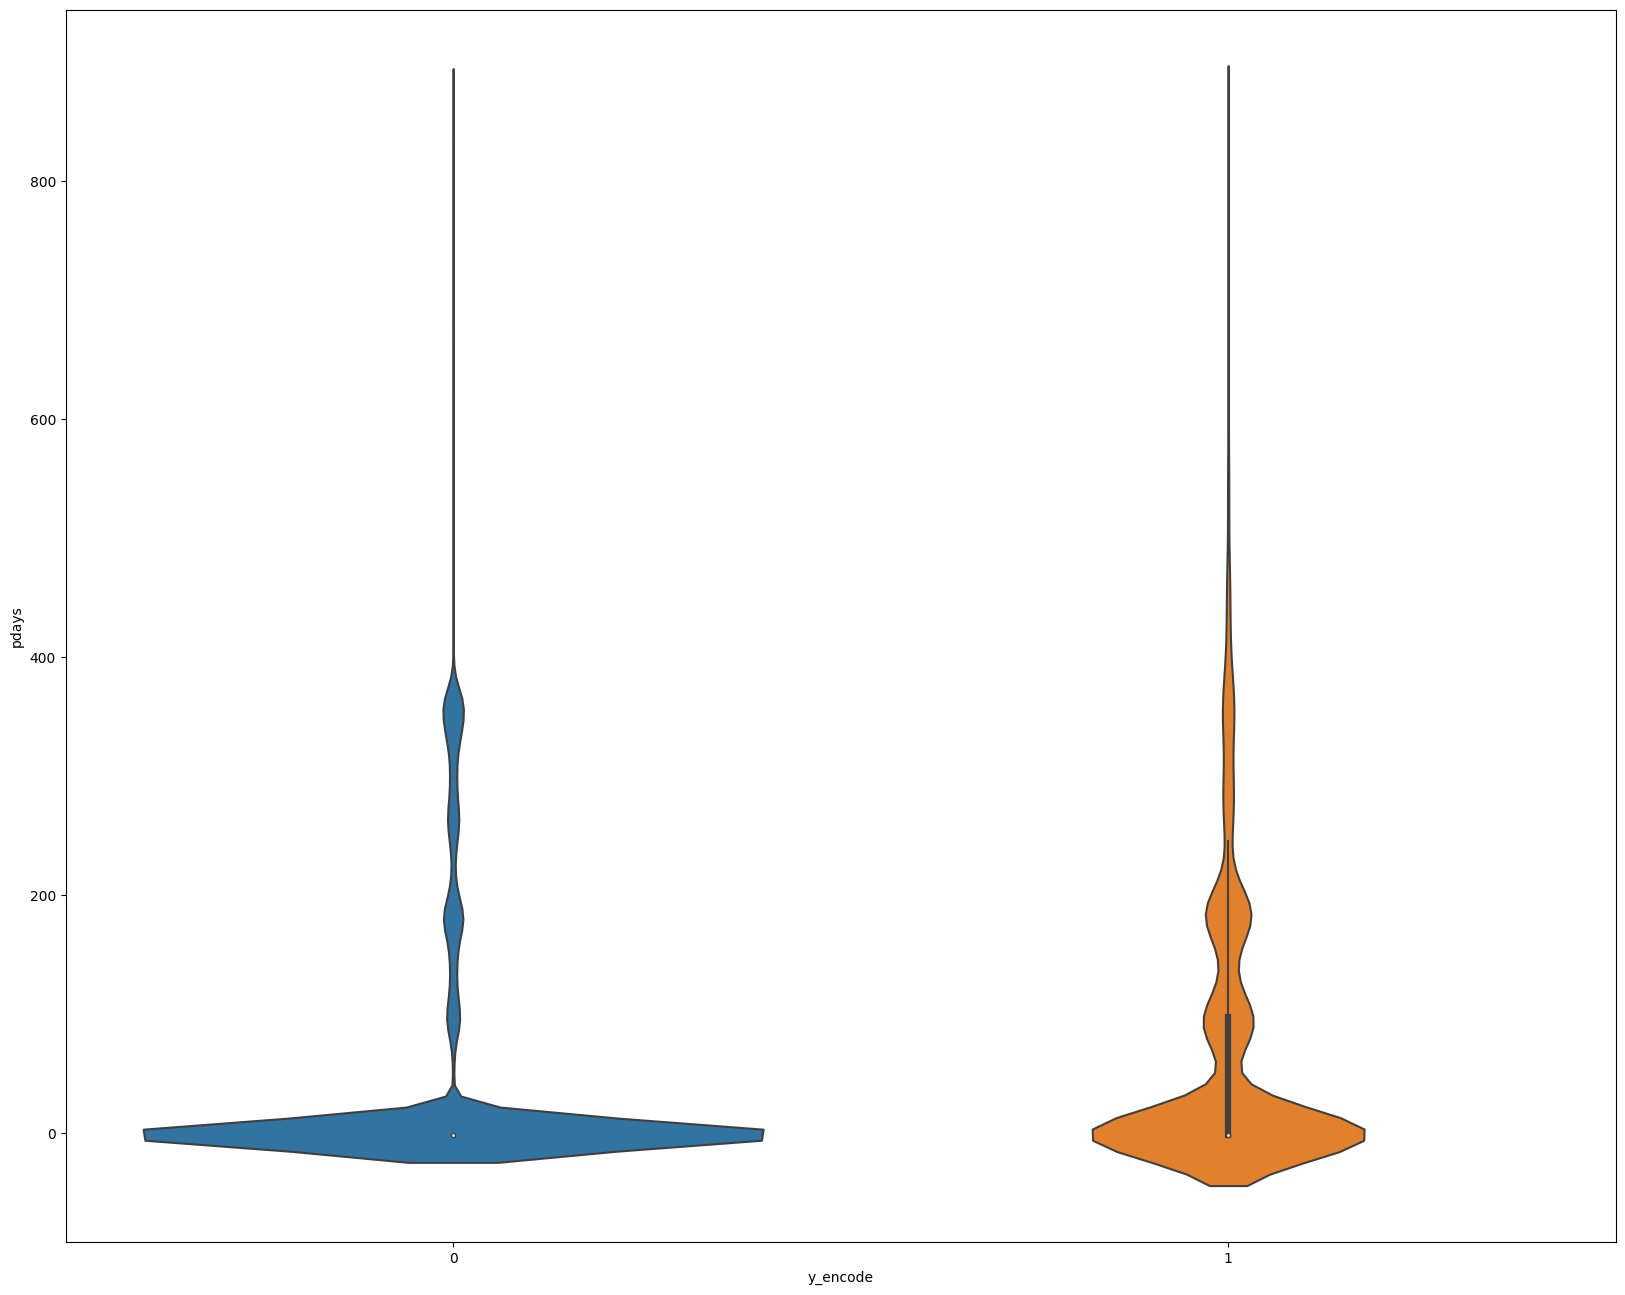

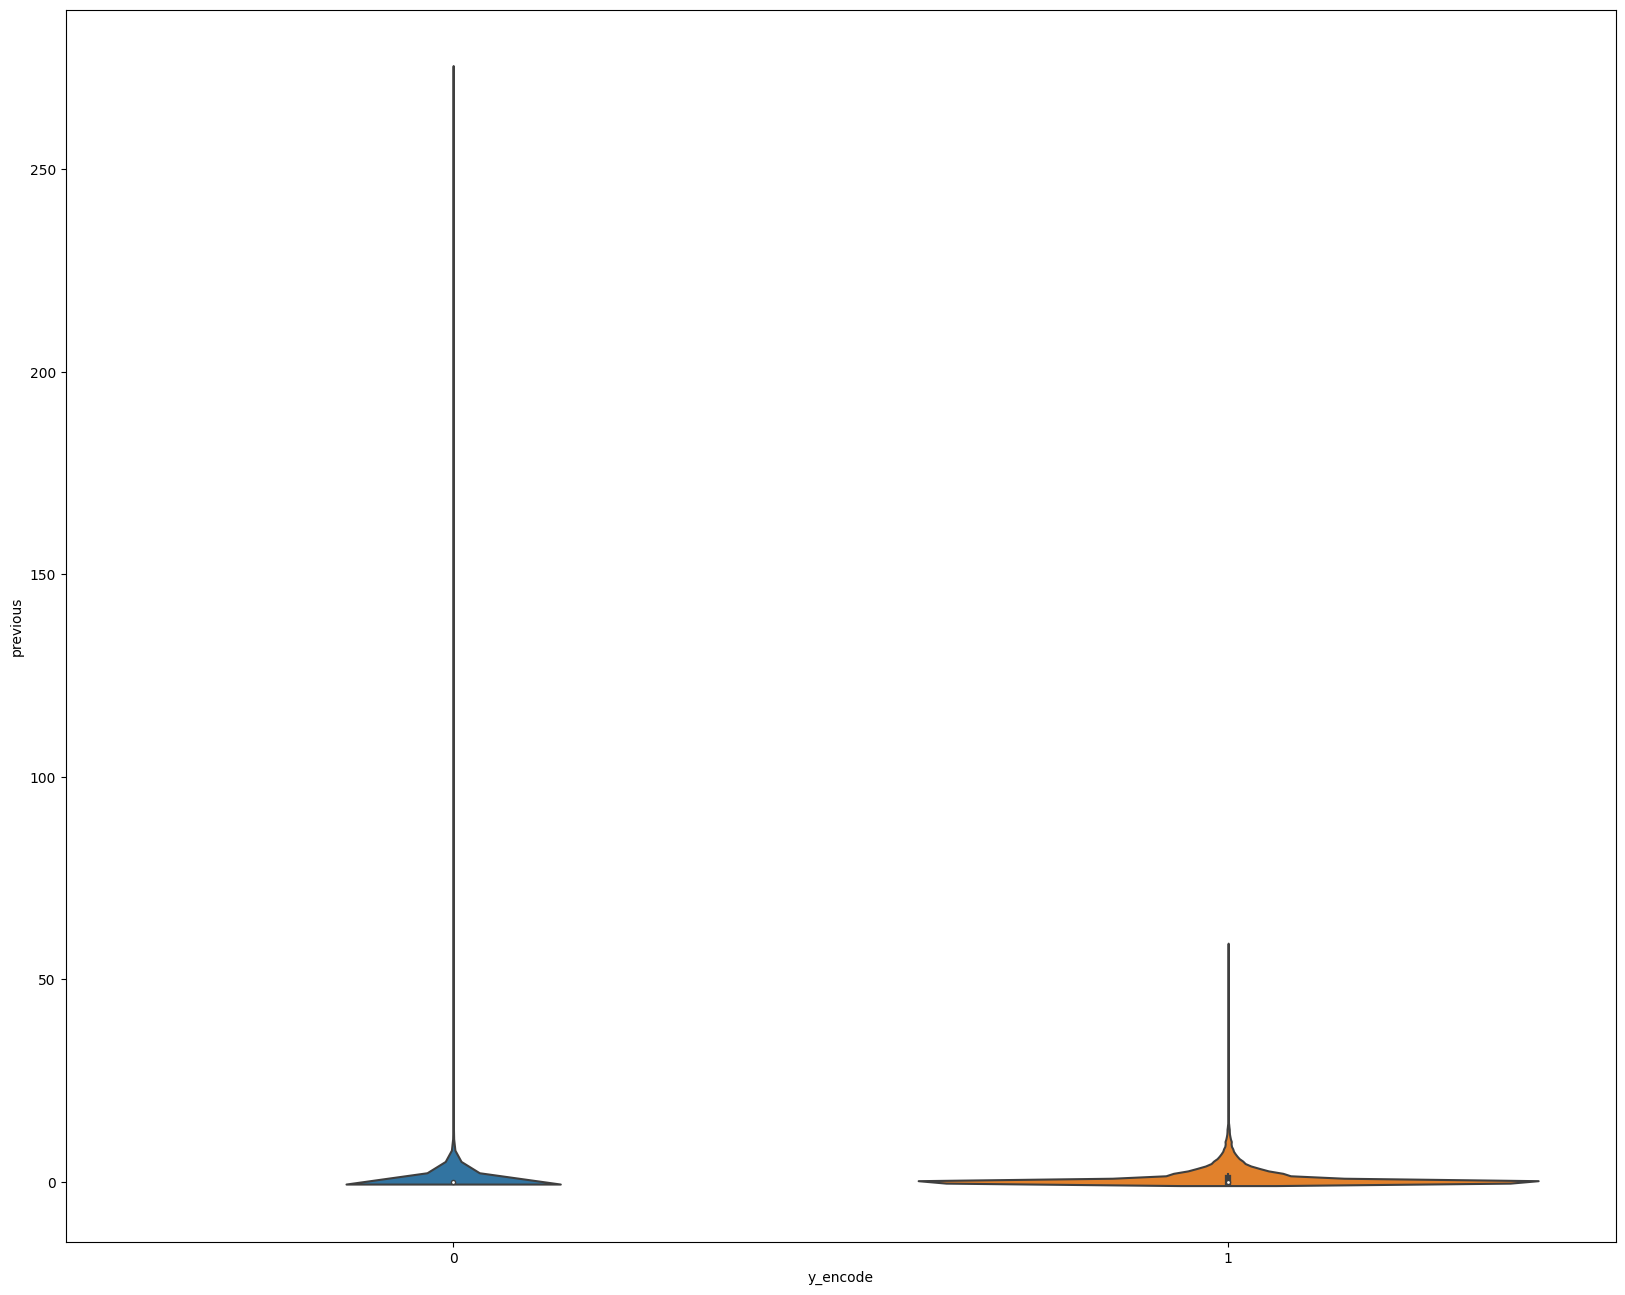

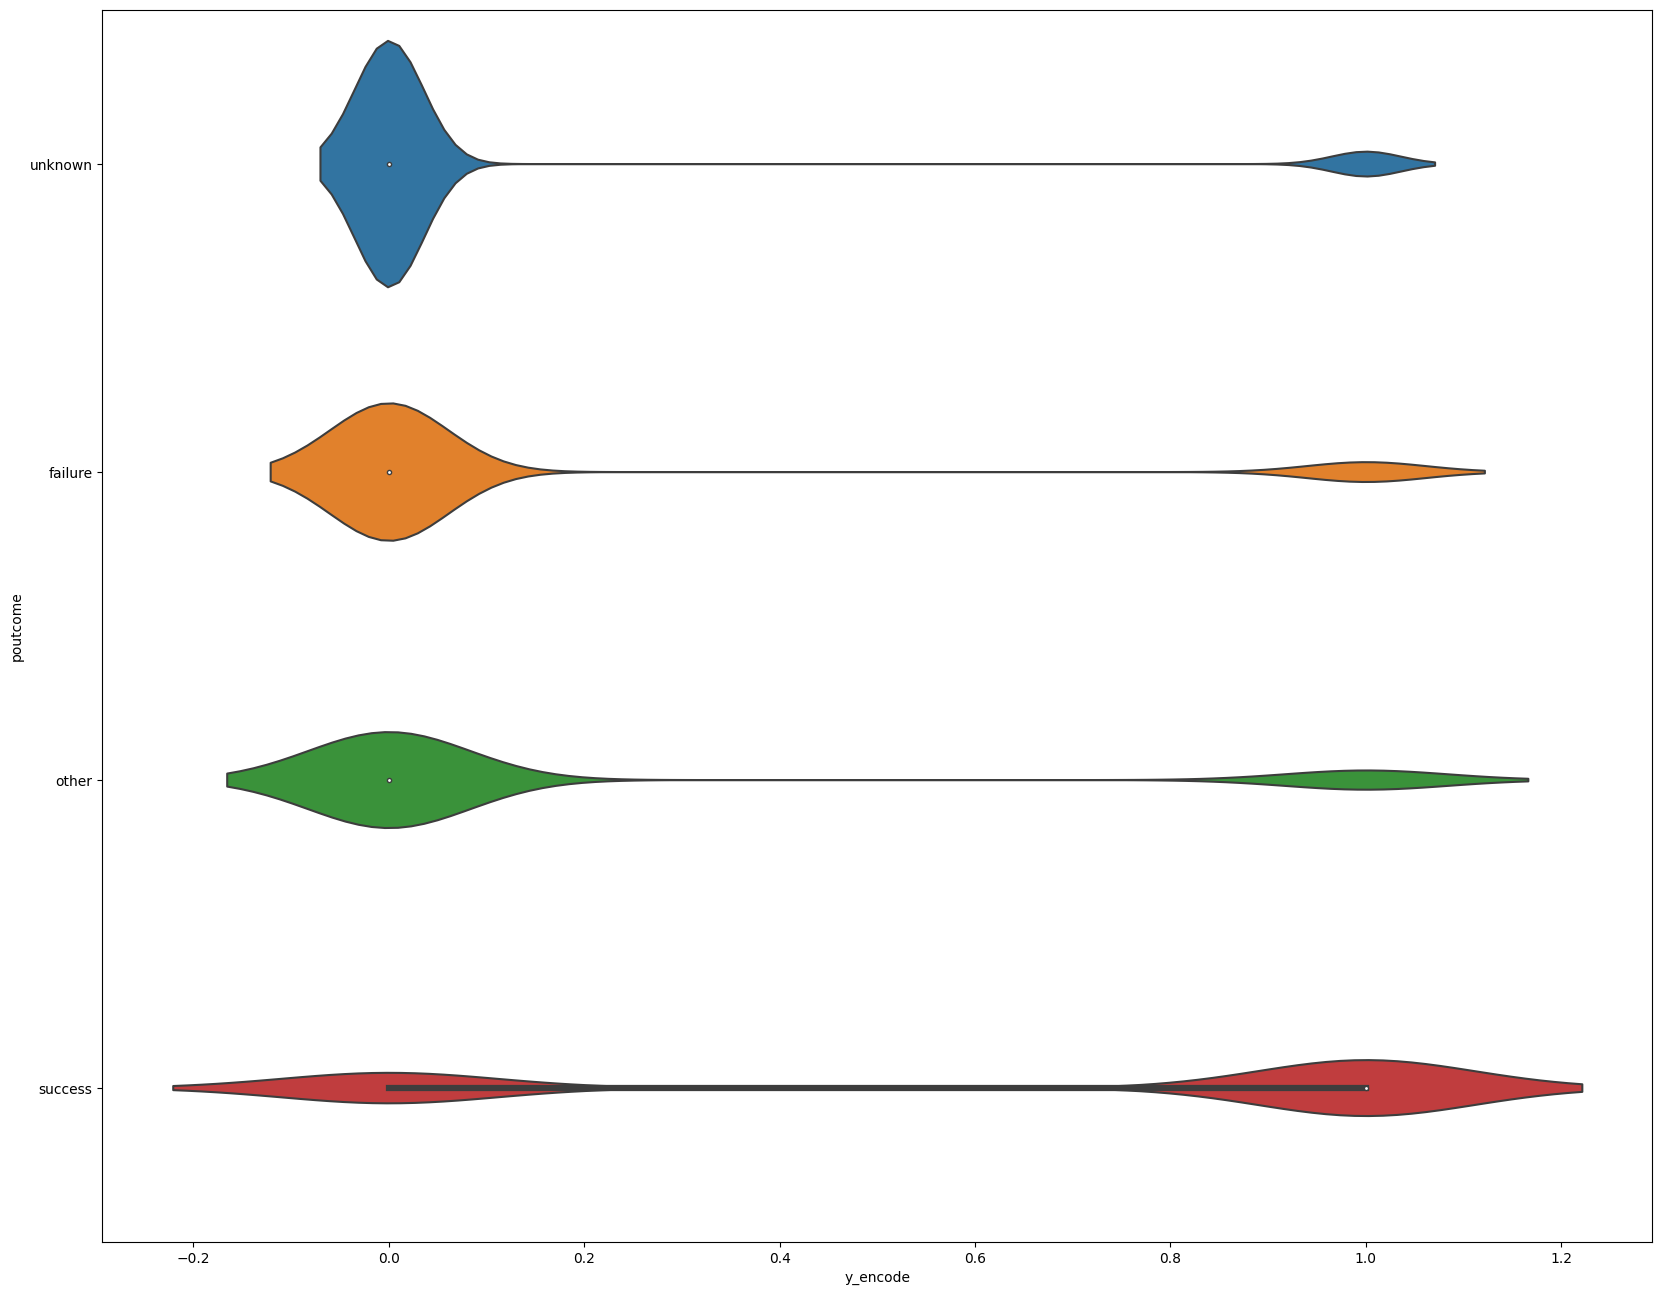

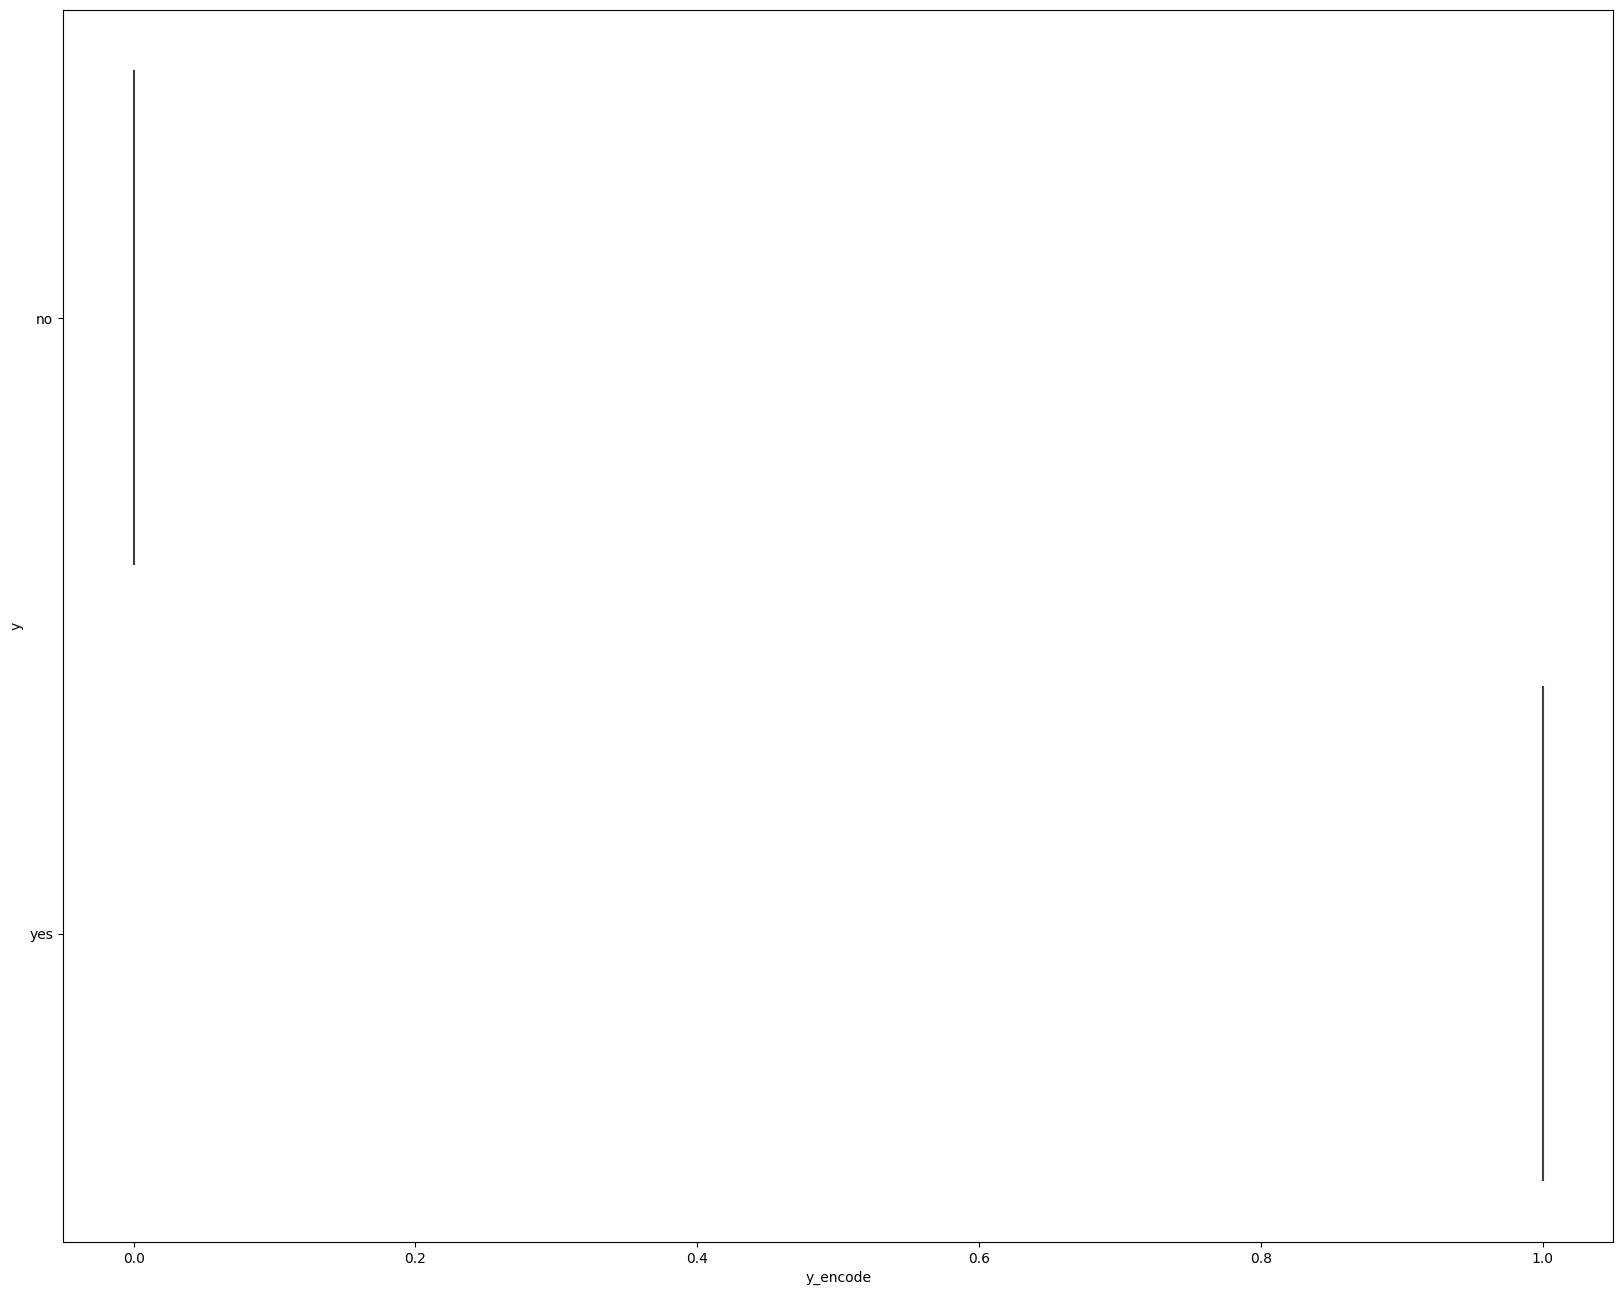

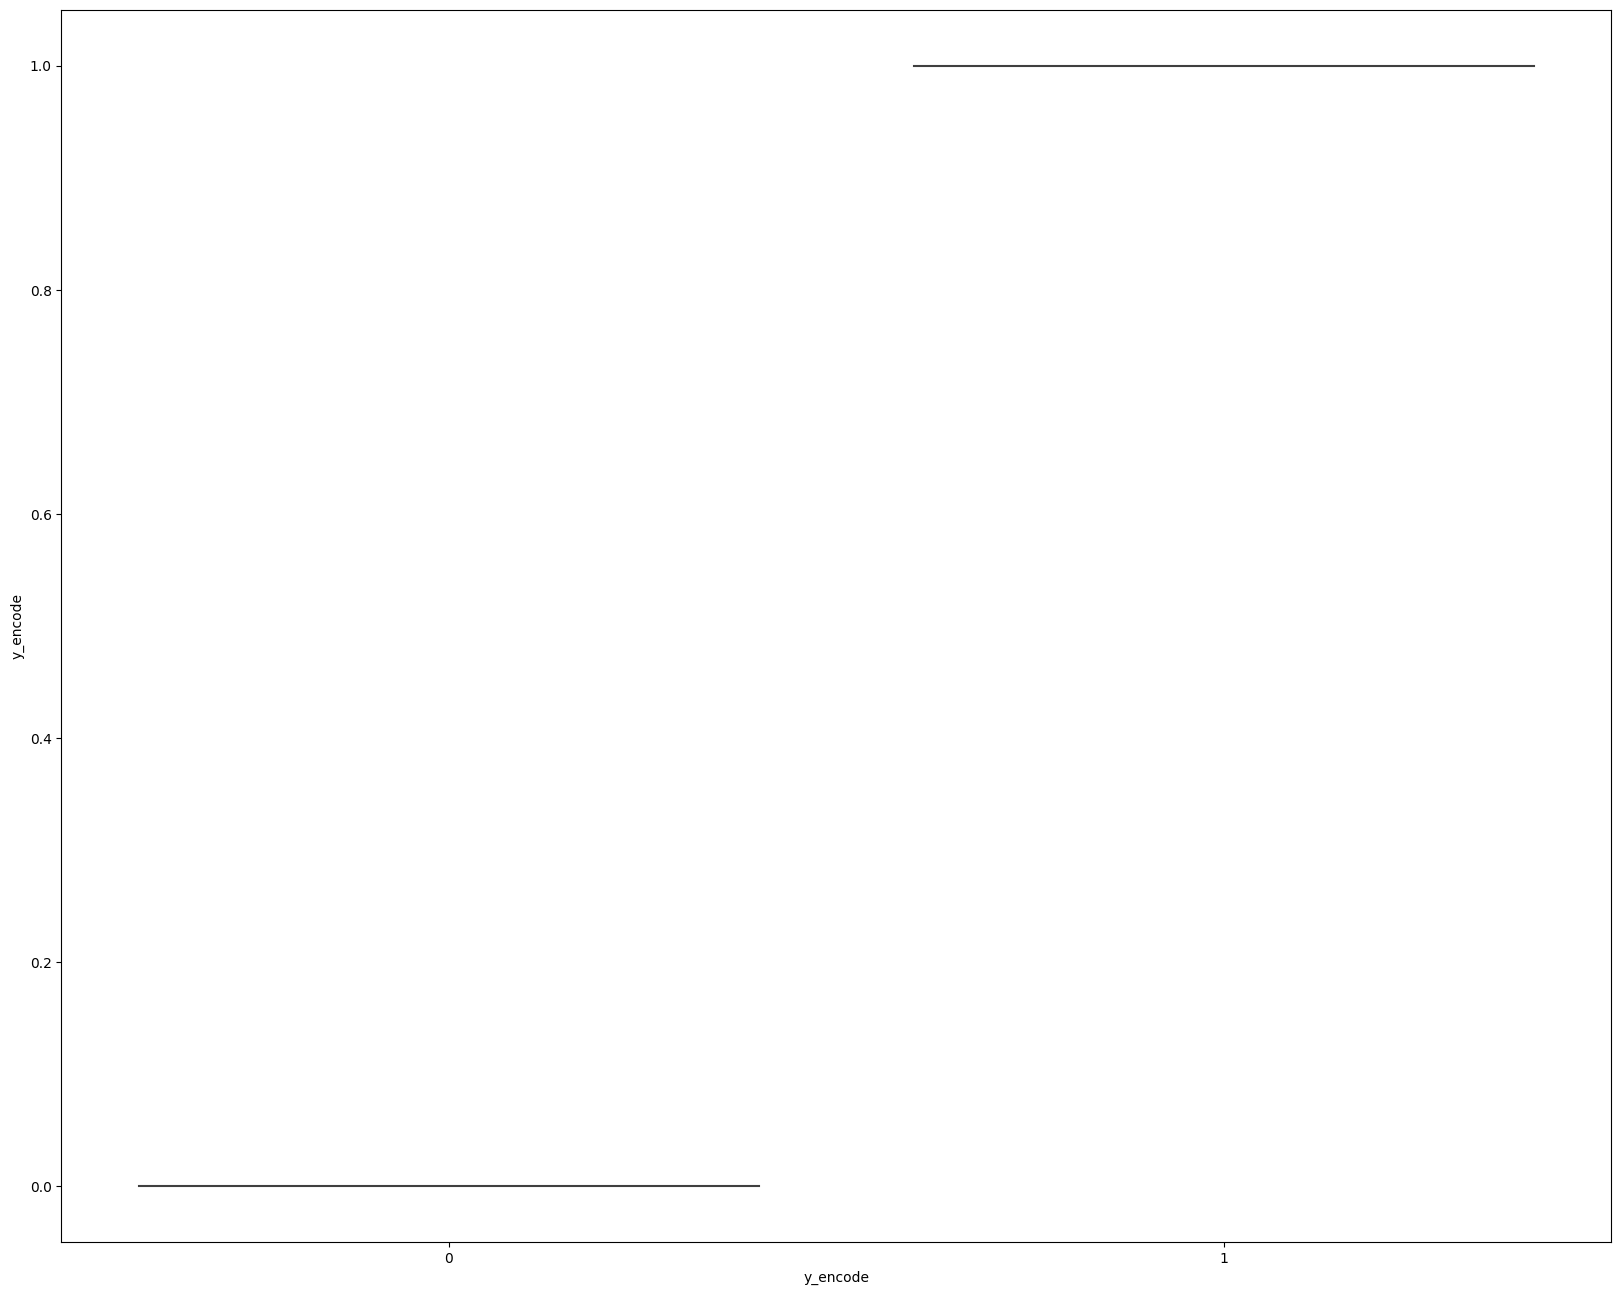

In [17]:
for i in df.columns:
    a = sns.violinplot(data=df, x='y_encode', y=i)
    plt.pyplot.show()

**Logistics Regression_KNeighbors_XGB**

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,cv
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [19]:
#identify the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_encode   45211 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [20]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
y_encode        2
dtype: int64

In [21]:
df.isnull().sum().sum()

0

In [22]:
# NULL value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_encode   45211 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


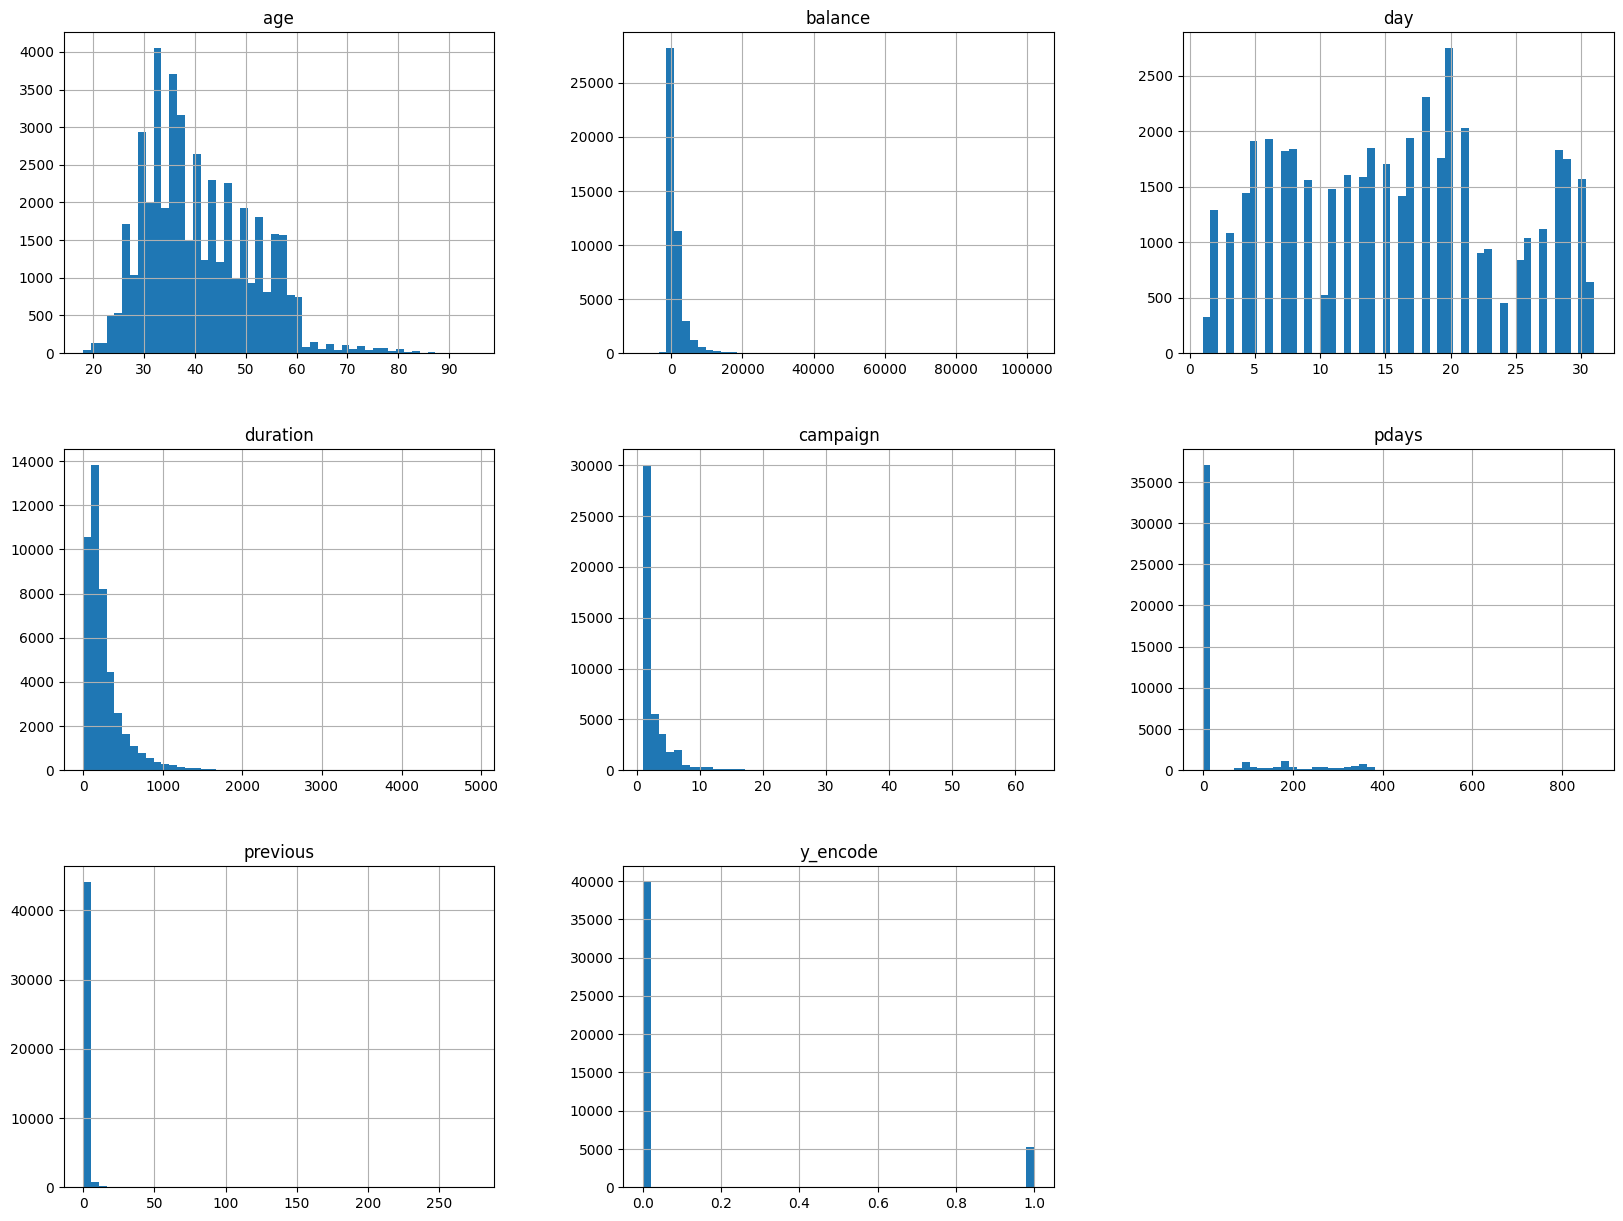

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.pyplot.show()

<AxesSubplot:>

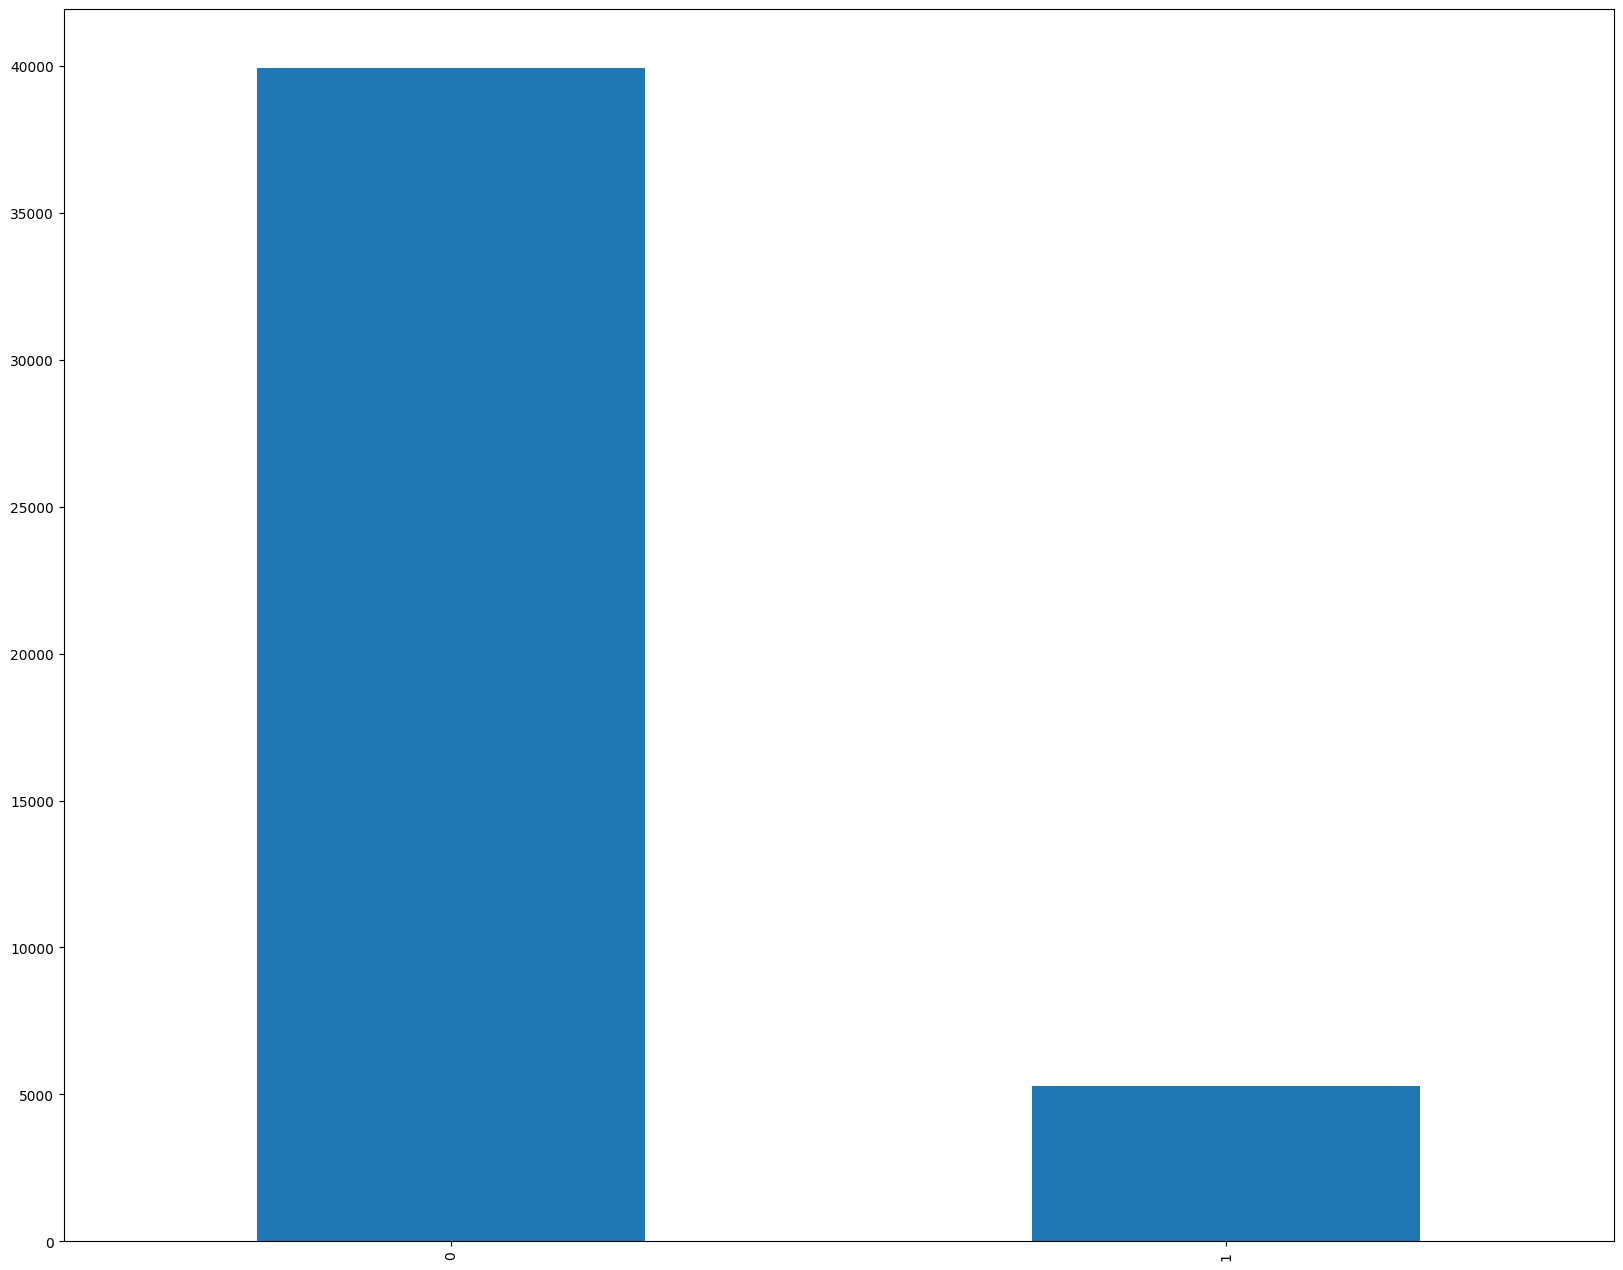

In [24]:
pd.value_counts(df['y_encode']).plot.bar()

<AxesSubplot:>

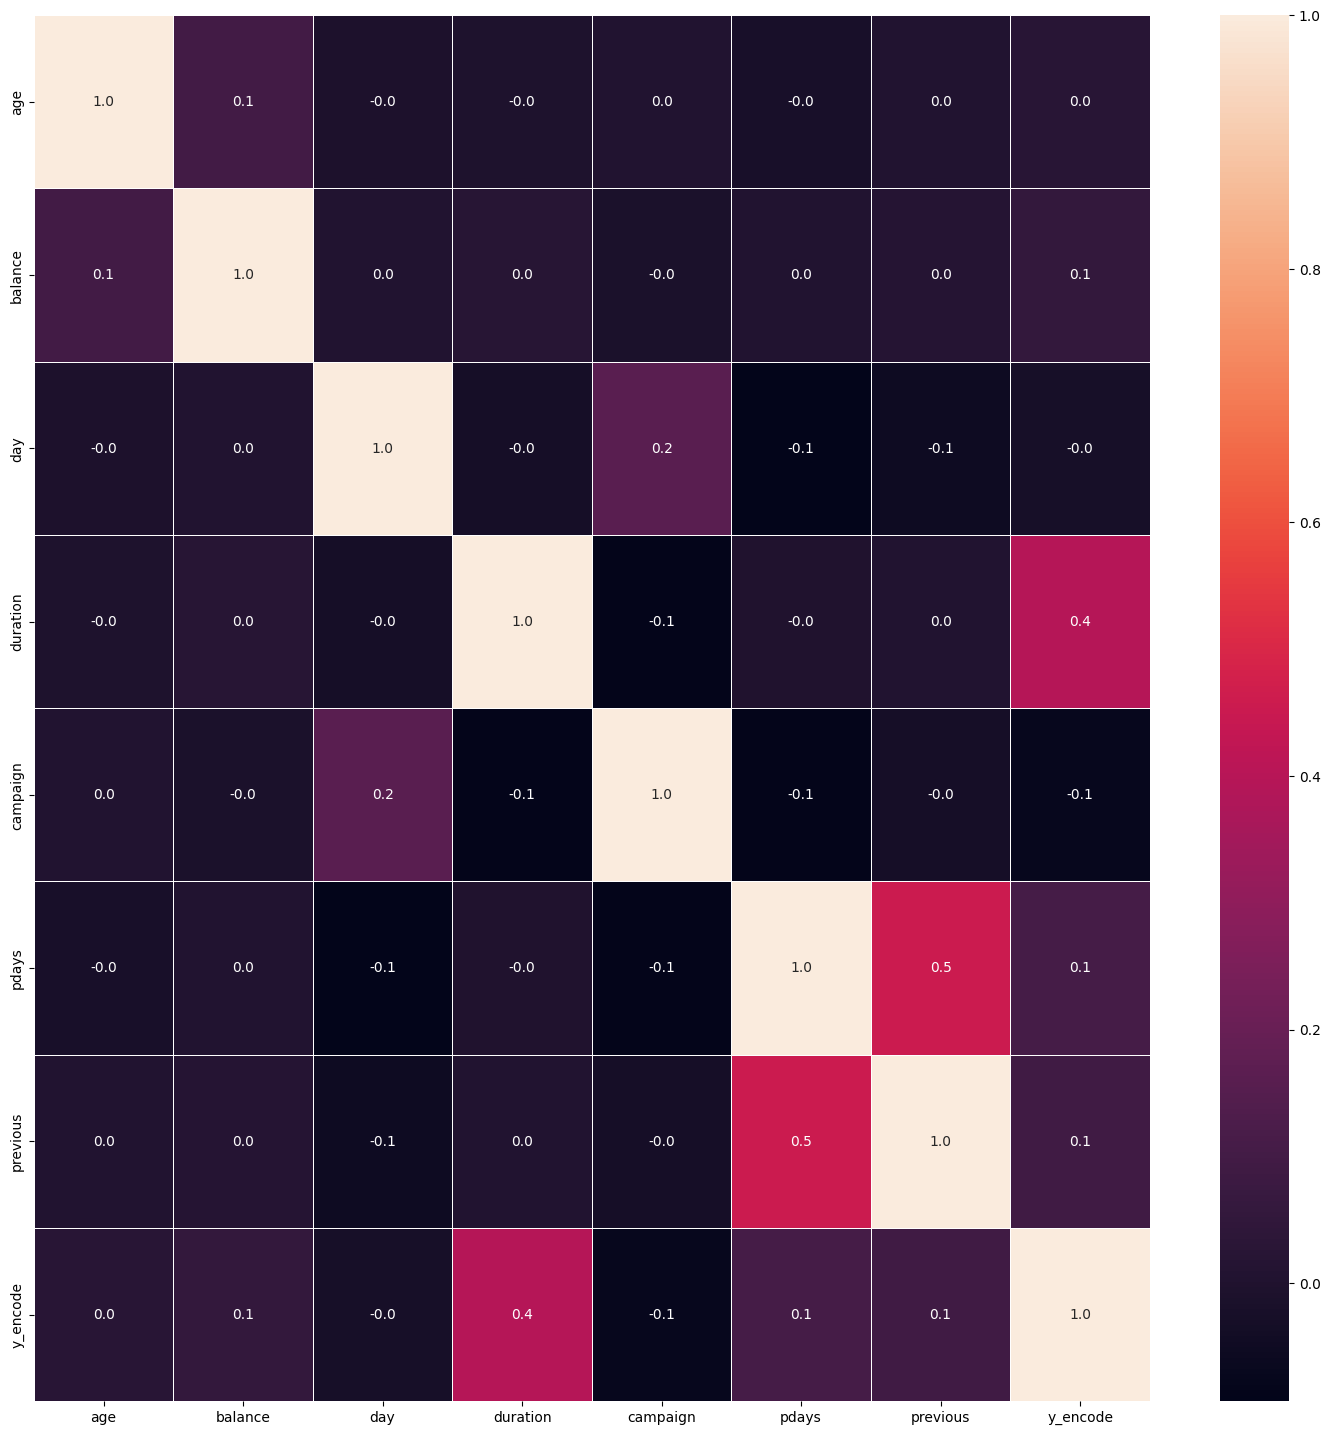

In [25]:
#correlation map
f,ax=plt.pyplot.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [5]:
from sklearn.feature_extraction import FeatureHasher
# n_features contains the number of bits you want in your hash value.
#h = FeatureHasher(n_features = 3, input_type ='string') 
# transforming the column after fitting
#hashed_Feature = h.fit_transform(df['nom_0'])
#hashed_Feature = hashed_Feature.toarray()
#df = pd.concat([df, pd.DataFrame(hashed_Feature)], axis = 1)
#df.head(10)

In [27]:
#myVars = vars()
#myVars

In [6]:
for i in df.dtypes[df.dtypes == 'object'].keys():
    #print(df[i].unique())
    if i!='y':
        h = FeatureHasher(n_features = len(df[i].unique()), input_type ='string')
        new_column = i+'_encode'
        #print(new_column)
        hashed_Feature = h.fit_transform(df[i])
        hashed_Feature = hashed_Feature.toarray()
        df1 = pd.DataFrame(hashed_Feature)
        column_list = list(df1.columns)
        print(column_list)
        column_dict={}
        for j in column_list:
            column_dict[j]=i+'_'+str(j)
        print(column_dict)
        df1=df1.rename(columns=column_dict,errors='raise')
        print(list(df1.columns))
        df = pd.concat([df, df1], axis = 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'job_0', 1: 'job_1', 2: 'job_2', 3: 'job_3', 4: 'job_4', 5: 'job_5', 6: 'job_6', 7: 'job_7', 8: 'job_8', 9: 'job_9', 10: 'job_10', 11: 'job_11'}
['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11']
[0, 1, 2]
{0: 'marital_0', 1: 'marital_1', 2: 'marital_2'}
['marital_0', 'marital_1', 'marital_2']
[0, 1, 2, 3]
{0: 'education_0', 1: 'education_1', 2: 'education_2', 3: 'education_3'}
['education_0', 'education_1', 'education_2', 'education_3']
[0, 1]
{0: 'default_0', 1: 'default_1'}
['default_0', 'default_1']
[0, 1]
{0: 'housing_0', 1: 'housing_1'}
['housing_0', 'housing_1']
[0, 1]
{0: 'loan_0', 1: 'loan_1'}
['loan_0', 'loan_1']
[0, 1, 2]
{0: 'contact_0', 1: 'contact_1', 2: 'contact_2'}
['contact_0', 'contact_1', 'contact_2']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'month_0', 1: 'month_1', 2: 'month_2', 3: 'month_3', 4: 'month_4', 5: 'month_5', 6: 'month_6', 7: 'month_7', 8: 'month_8', 9

In [75]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... month_6  month_7  month_8  month_9  month_10 month_11  \
0  unknown    5  ...     0.0      0.0      0.0      0.0       1.0      0.0   
1  unknown    5  ...     0.0      0.0      0.0      0.0       1.0      0.0   
2  unknown    5  ...     0.0      0.0      0.0      0.0       1.0      0.0   
3  unknown    5  ...     0.0      0.0      0.0      0.0       1.0      0.0   
4  unknown    5  ...     0.0      0.0      0.0      0.0       1.0      0.0   

  poutcome_0  poutcome_1  poutcome_2  poutcome_3  
0       -2.0        -1.0         0.0         0.0  
1       -2.0        -1.0         0.0         0.0  
2       -2.0        -1.0         0.0         0.0  
3       -2.0        -1.0         0.0         0.0  
4       -2.0        -1.0         0.0         0.0  

[5 rows x 62 columns]

In [76]:
len(df.columns)

62

In [7]:
Y=df['y_encode']
Y= pd.DataFrame(Y)
Y.head()

y_encode
0         0
1         0
2         0
3         0
4         0

In [8]:
drop_list=list(df.dtypes[df.dtypes == 'object'].keys())
#print(drop_list)
X=df.drop(columns=drop_list)
X.head()

age  balance  day  duration  campaign  pdays  previous  y_encode  job_0  \
0   58     2143    5       261         1     -1         0         0   -2.0   
1   44       29    5       151         1     -1         0         0   -2.0   
2   33        2    5        76         1     -1         0         0   -2.0   
3   47     1506    5        92         1     -1         0         0    0.0   
4   33        1    5       198         1     -1         0         0   -3.0   

   job_1  ...  month_6  month_7  month_8  month_9  month_10  month_11  \
0    0.0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
1    0.0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
2    3.0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
3    0.0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
4   -1.0  ...      0.0      0.0      0.0      0.0       1.0       0.0   

   poutcome_0  poutcome_1  poutcome_2  poutcome_3  
0        -2.0        -1.0         0.0         0.0  
1        -2.0        -1.0         0.0         0.0  
2        -2.0        -1.0         0.0         0.0  
3        -2.0        -1.0         0.0         0.0  
4        -2.0        -1.0         0.0         0.0  

[5 rows x 52 columns]

In [9]:
# split train - test to 70-30
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3, random_state=9)

In [10]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(31647, 52)
(31647, 1)
(13564, 52)
(13564, 1)


In [16]:
#model build for different binary classification and show confusion matrix

def build_model(model_name,train_X, train_Y, test_X, test_Y):
    if model_name == 'LogisticRegression':
        model=LogisticRegression()
    elif model_name =='KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc')
    else:
        print('not a valid model name')
    
    model=model.fit(train_X,train_Y)
    #print(dir(model))
    #print(model.coef_)
    #print(model.get_params)
    #print(model.decision_function)
    
    
    pred_prob=model.predict_proba(test_X)
    
    fpr, tpr, thresh = roc_curve(test_Y, pred_prob[:,1], pos_label=1)
    
    model_predict= model.predict(test_X)
    acc=accuracy_score(model_predict,test_Y)
    print("Accuracy: ",acc)
    
    # Classification report 
    print("Classification Report: ")
    print(classification_report(model_predict,test_Y))
    #print("Confusion Matrix for", model_name)
    con =  confusion_matrix(model_predict,test_Y)
    sns.heatmap(con,annot=True, fmt ='.2f')
    plt.pyplot.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=25)
    plt.pyplot.xlabel('Predict Values', fontsize =25)
    plt.pyplot.ylabel('Test Values', fontsize =25)
    plt.pyplot.show()
    return model, acc, fpr, tpr, thresh

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:  0.9239162488941315
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     12506
           1       0.51      0.77      0.61      1058

    accuracy                           0.92     13564
   macro avg       0.74      0.85      0.78     13564
weighted avg       0.94      0.92      0.93     13564



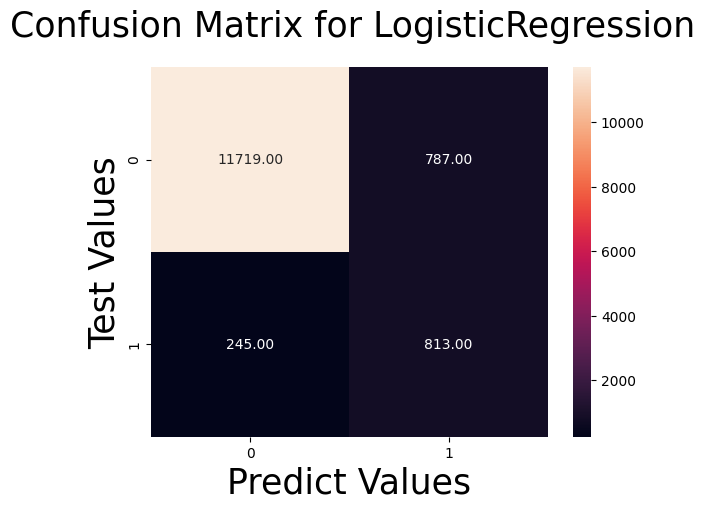

In [17]:
#Model 1 - LogisticRegression
lg_model,acc1, fpr1, tpr1, thresh1 = build_model('LogisticRegression',train_X, train_Y, test_X, test_Y.values.ravel())

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8813771748746683
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13017
           1       0.17      0.49      0.25       547

    accuracy                           0.88     13564
   macro avg       0.57      0.69      0.59     13564
weighted avg       0.94      0.88      0.91     13564



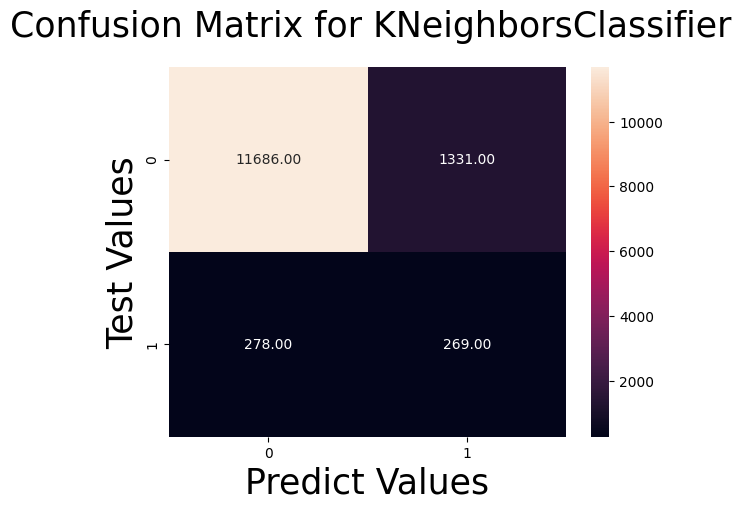

In [18]:
# Model 2 - KNeighborsClassifier
knn_model,acc2, fpr2, tpr2, thresh2 = build_model('KNeighborsClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

Accuracy:  1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11964
           1       1.00      1.00      1.00      1600

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



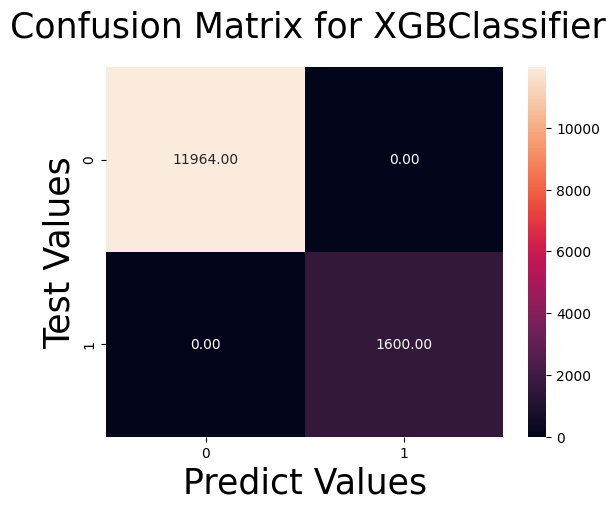

In [19]:
# Model 3 - XGBClassifier
xgb_model, acc3, fpr3, tpr3, thresh3 = build_model('XGBClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

In [20]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_Y))]
p_fpr, p_tpr, _ = roc_curve(test_Y, random_probs, pos_label=1)

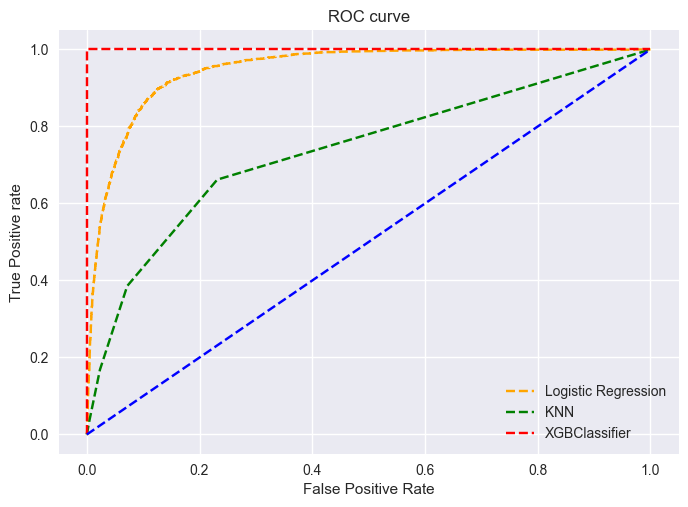

In [21]:
plt.pyplot.style.use('seaborn')

# plot roc curves
plt.pyplot.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.pyplot.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.pyplot.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBClassifier')
plt.pyplot.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.pyplot.title('ROC curve')
# x label
plt.pyplot.xlabel('False Positive Rate')
# y label
plt.pyplot.ylabel('True Positive rate')

plt.pyplot.legend(loc='best')
plt.pyplot.savefig('ROC',dpi=300)
plt.pyplot.show()

In [23]:
import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid based on the results of random search
param_grid = {
    'solver':['liblinear','newton-cg'],
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = LogisticRegression() , param_grid = param_grid,cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = 'accuracy' )

grid_search.fit(train_X,train_Y.values.ravel())

Fitting 4 folds for each of 20 candidates, totalling 80 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [88]:
print('Best Parameter:')
print('F1 Score:', grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)
print('Model object with best parameters:')
print(grid_search.best_estimator_)

Best Parameter:


AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
grid_params = {
    'n_neighbors':[3,4,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs= GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose=1,
cv=3,
n_jobs=-1
)
gs_results = gs.fit(train_X,train_Y.values.ravel())

In [ ]:
print('Best Parameter:')
print('F1 Score:', gs_results.best_score_)
print('Best Hyperparameters:', gs_results.best_params_)
print('Model object with best parameters:')
print(gs_results.best_estimator_)

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100,objective='binary:logistic',eval_metric='auc')
scores = cross_val_score(xgb_cv, train_X, train_Y.values.ravel(), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
results=pd.DataFrame({'Model':['LogisticRegression','KNN','XGBoost'],
                     'Accuracy Score':[acc1,acc2,acc3]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df